# Assignment nº1
## Lung Cancer Classification using Computerized Tomography (CT) Data
### Laboratory of Artificial Intelligence and Data Science (2024/25)

##### Work assembled by Alejandro Gonçalves (202205564), Francisca Mihalache (202206022), João Sousa (202205238) and Vítor Ferreira (201109428).

## Table of contents <a name="contents"></a>
1. [Introduction](#introduction)
2. [Business Understanding](#business)
3. [Data Understanding](#data_understanding)
    - 3.1. [Initial setup](#setup)
    - 3.2. [Tabular data](#tabular)
    - 3.3. [CT image data](#image)
4. [Data Preparation](#data_preparation)
    - 4.1. [Feature extraction](#extraction)
    - 4.2. [Initial data cleaning](#cleaning)
    - 4.3. [Malignancy analysis](#malignancy)
5. [Modeling](#modeling)
   - 5.1 [Random Forest](#rf)
       - 5.1.1 [Using the combined dataset without feature selection](#rf_combined)
       - 5.1.2 [Using the combined dataset with feature selection](#rf_combined_feature)
       - 5.1.3 [Using the radiomic dataset without feature selection](#rf_radiomic)
       - 5.1.4 [Using the radiomic dataset with feature selection](#rf_radiomic_feature)
       - 5.1.5 [Using the pylidc dataset without feature selection](#rf_pylidc)
    - 5.2 [Logistic Regression](#lr)
        - 5.2.1 [Using the combined dataset without feature selection](#lr_combined)
        - 5.2.2 [Using the combined dataset with feature selection](#lr_combined_feature)
        - 5.2.3 [Using the radiomic dataset without feature selection](#lr_radiomic)
        - 5.2.4 [Using the radiomic dataset with feature selection](#lr_radiomic_feature)
        - 5.2.5 [Using the pylidc dataset without feature selection](#lr_pylidc)
    - 5.3 [Support Vector Machines](#svm)
        - 5.3.1 [Using the combined dataset without feature selection](#svm_combined)
        - 5.3.2 [Using the radiomic dataset without feature selection](#svm_radiomic)
        - 5.3.3 [Using the pylidc dataset without feature selection](#svm_pylidc)
        - 5.3.4 [Using the combined dataset with feature selection (Random Forest)](#svm_combined_feature_rf)
        - 5.3.5 [Using the combined dataset with feature selection (Lasso)](#svm_combined_feature_lasso)
        - 5.3.6 [Using the radiomic dataset with feature selection (Random Forest)](#svm_radiomic_feature_rf)
        - 5.3.7 [Using the radiomic dataset with feature selection (Lasso)](#svm_radiomic_feature_lasso)
6. [Evaluation](#evaluation)
7. [Conclusion](#conclusion)
8. [References](#references)

## 1. Introduction <a name="introduction"></a>
[[go back to the top]](#contents)

The primary objective of this project is to develop a robust system for **predicting the malignancy** of lung nodules, which could aid in the early diagnosis of lung cancer and minimize variability in human interpretation. 

To ensure a systematic and efficient approach, we will follow the **CRISP-DM** (Cross-Industry Standard Process for Data Mining) framework. CRISP-DM is a widely adopted methodology that consists of six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. For the purposes of this academic project, our focus will be on the first five phases, covering all necessary aspects of model development, from problem definition to performance assessment, while excluding the deployment phase.

## 2. Business Understanding <a name="business"></a>
[[go back to the top]](#contents)

Lung cancer remains the leading cause of cancer-related deaths globally, with survival rates highly dependent on the stage at which the disease is detected. Despite advancements in medical imaging, only about **16% of lung cancer cases** are diagnosed at an early, localized stage, when treatment is more likely to be effective **[1]**. For example, it is estimated that in 2024, approximately **234,580 new cases of lung cancer** will be diagnosed in the United States, with **125,070 deaths** resulting from the disease **[2]**. These statistics underscore the critical need for early detection, which can significantly improve patient outcomes, increasing the five-year survival rate from around 5% in advanced stages to over 50% in early stages.

**Computed Tomography (CT)** imaging has become a valuable, non-invasive tool for identifying lung nodules, which are potential indicators of lung cancer. However, traditional radiological analysis of CT images poses challenges: interpretations can vary among radiologists due to the subjective nature of image analysis, and reviewing large volumes of imaging data is time-consuming. To mitigate these limitations, **Computer-Aided Diagnosis (CAD) systems** have been developed to support radiologists by automatically evaluating the malignancy risk of lung nodules, potentially increasing diagnostic accuracy and efficiency.

A promising approach within CAD systems is **radiomics** — the extraction and analysis of a large number of quantitative features from medical images to provide non-invasive diagnostic and prognostic insights. Radiomics enables the transformation of imaging data into mineable, high-dimensional information, allowing for a more objective and detailed understanding of lung nodules **[3]**. Moreover, the rise of machine learning (ML) and deep learning (DL) techniques, particularly Convolutional Neural Networks (CNNs), has demonstrated the potential to automatically learn and recognize patterns within medical images, facilitating improved classification and malignancy prediction **[4]**.

Previous studies have utilized these techniques in conjunction with feature extraction tools to enhance classification performance. Despite their potential, however, these approaches face challenges in data privacy, standardization, and clinical validation. Addressing these issues is crucial to ensure reliable and ethically deployment in clinical settings, enabling improved early detection of lung cancer.

## 3. Data Understanding <a name="data_understanding"></a>
[[go back to the top]](#contents)

The dataset used for this project is the **LIDC-IDRI** collection.The Lung Image Database Consortium image collection (LIDC-IDRI) is a publicly accessible resource consisting of thoracic CT scans with annotated lesions, designed for the development, training, and evaluation of computer-aided diagnostic (CAD) systems for lung cancer. 

The dataset was created through the collaboration of seven academic centers and eight medical imaging companies and includes **1,018 cases**. Each case contains clinical thoracic CT images and an XML file detailing the results of a two-phase annotation process conducted by four experienced thoracic radiologists. In the first phase, radiologists independently reviewed each CT scan and marked lesions into three categories: **“nodule ≥3 mm,” “nodule <3 mm,” and “non-nodule ≥3 mm.”** In the second phase, the radiologists reviewed their own annotations along with the anonymized annotations from the other three radiologists to make a final assessment. This approach aimed to identify lung nodules comprehensively without requiring a consensus among radiologists. **[5]** The LIDC-IDRI dataset can be accessed through The Cancer Imaging Archive at the following link: [LIDC-IDRI Collection](https://www.cancerimagingarchive.net/collection/lidc-idri/).

In this section, we will conduct a comprehensive analysis of the LIDC-IDRI data to better understand the structure, content, and any potential issues within the different dataset files. This exploration is crucial to identify key characteristics and features, as well as to guide preprocessing steps before any model development.

### 3.1. Initial Setup <a name="setup"></a>
[[go back to the top]](#contents)

To ensure a smooth development process, we have prepared a detailed guide outlining the steps to create a controlled virtual environment using conda. This guide addresses the compatibility issues we faced between various libraries and Python versions, providing precise instructions for setting up the environment. You can refer to the guide in the file **Environment_Setup_Guide.md**. 

Additionally, due to a minor compatibility requirement, we made a small adjustment to pylidc’s source code in the **Annotation.py** file. Thus, after installing pylidc, you must replace the default Annotation.py file with the modified version we have provided.

The code below imports all essential libraries for initial data exploration and preparation and displays their versions. Running this verification ensures you are using the correct library versions as outlined in the guide, which is crucial for maintaining compatibility and reproducibility across setups.

In [1]:
import os

import sys
print("Python version:", sys.version)

import numpy as np
print("NumPy version:", np.__version__)

import matplotlib.pyplot as plt
import matplotlib as mpl 
print("Matplotlib version:", mpl.__version__)

import pylidc as pl
print("pylidc version:", pl.__version__)

import pandas as pd
print("pandas:", pd.__version__)

import radiomics
print("pyradiomics version:", radiomics.__version__)

import pydicom
print("pydicom version:", pydicom.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)


Python version: 3.8.20 (default, Oct  3 2024, 15:24:27) 
[GCC 11.2.0]
NumPy version: 1.23.5
Matplotlib version: 3.7.2
pylidc version: 0.2.3
pandas: 2.0.3
pyradiomics version: v3.1.0
pydicom version: 2.4.4
scikit-learn version: 1.3.0


### 3.2. Tabular Data <a name="tabular"></a>
[[go back to the top]](#contents)

We started our process by analysing the **tabular data** contained in the The Lung Image Database Consortium image collection (LIDC-IDRI). 

Upon exploring the **LIDC-IDRI_MetaData.csv** file, we noticed that it provides comprehensive metadata about each CT scan in the LIDC-IDRI dataset.

In [2]:
df = pd.read_csv("Tabular/LIDC-IDRI_MetaData.csv")
df_sorted = df.sort_values(by='Subject ID')
df_sorted.head()

Subject ID                                          Study UID  \
348   LIDC-IDRI-0001  1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...   
186   LIDC-IDRI-0001  1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...   
1100  LIDC-IDRI-0002  1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...   
1141  LIDC-IDRI-0002  1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...   
189   LIDC-IDRI-0003  1.3.6.1.4.1.14519.5.2.1.6279.6001.202063331127...   

     Study Description             Study Date  \
348                NaN  2000-01-01 00:00:00.0   
186                NaN  2000-01-01 00:00:00.0   
1100               NaN  2000-01-01 00:00:00.0   
1141               NaN  2000-01-01 00:00:00.0   
189                NaN  2000-01-01 00:00:00.0   

                                              Series ID Series Description  \
348   1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...                NaN   
186   1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818...                NaN   
1100  1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900...                NaN   
1141  1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...                NaN   
189   1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390...                NaN   

      Number of images  File Size (Bytes) Collection Name Modality  \
348                133           70018838       LIDC-IDRI       CT   
186                  2           16357620       LIDC-IDRI       DX   
1100                 1            6909958       LIDC-IDRI       DX   
1141               261          137396696       LIDC-IDRI       CT   
189                  5           38580794       LIDC-IDRI       DX   

            Manufacturer  
348   GE MEDICAL SYSTEMS  
186   GE MEDICAL SYSTEMS  
1100  GE MEDICAL SYSTEMS  
1141  GE MEDICAL SYSTEMS  
189   GE MEDICAL SYSTEMS

This dataset contains multiple imaging modalities, but our primary focus is on the **CT (Computed Tomography)** scans, which are crucial for lung nodule analysis. After filtering the data based on the **Modality** column, we found that there are **1,018 CT scans** in the dataset, from **1010 patients**. While these represent all the CT scans available, the dataset also includes other imaging modalities like DX or CR, which are not of interest for our current analysis.

In [3]:
# Filter rows where Modality is CT
df_ct = df[df['Modality'] == 'CT']

num_ct_scans = df_ct.shape[0]
print(f"Number of CT scans: {num_ct_scans}")

# Count the number of unique patients (Subject IDs)
num_unique_patients = df_ct['Subject ID'].nunique()
print(f"Number of unique patients with CT scans: {num_unique_patients}")

Number of CT scans: 1018
Number of unique patients with CT scans: 1010


To understand how the CT scans in the LIDC-IDRI dataset were acquired, we analyzed the **Manufacturer** column. This column indicates the type of equipment used for each scan, which provides insight into the variety of machines and settings used for image acquisition. This variability can affect the consistency and quality of the images.

Manufacturer
GE MEDICAL SYSTEMS    670
SIEMENS               205
Philips                74
TOSHIBA                69
Name: count, dtype: int64


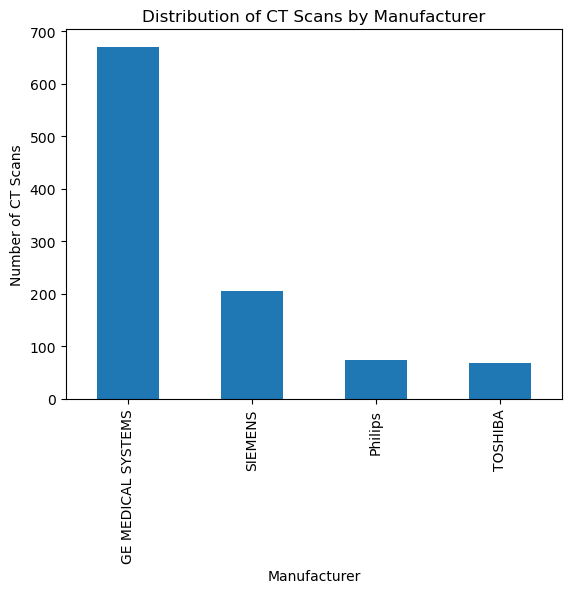

In [4]:
# Count the number of scans per manufacturer
manufacturer_counts = df_ct['Manufacturer'].value_counts()
print(manufacturer_counts)

manufacturer_counts.plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Number of CT Scans')
plt.title('Distribution of CT Scans by Manufacturer')
plt.show()

The file **tcia-diagnosis-data-2012-04-20.xls** contains several columns with diagnostic information at both the patient and nodule levels for the LIDC-IDRI dataset. Here is a summary of what each column represents:
- TCIA Patient ID: Unique identifier for each patient in the LIDC-IDRI dataset.
- Diagnosis at the Patient Level: A categorization of the overall diagnosis of the patient:
    - 0: Unknown diagnosis.
    - 1: Benign/non-malignant disease.
    - 2: Malignant primary lung cancer.
    - 3: Malignant metastatic disease.
- Diagnosis Method: The approach used to diagnose the patient's condition:
    - 0: Unknown.
    - 1: Radiological review.
    - 2: Biopsy.
    - 3: Cytology.
    - 4: Surgical resection.
- Primary Tumor Site for Metastatic Disease: If metastatic, specifies the primary site of the tumor.
- Nodule Diagnosis Columns (e.g., Nodule 1 to Nodule 5): Specific details for up to five nodules per patient, including diagnosis status and diagnosis method for each nodule.

In [7]:
#Ensure you have previously performed - pip install xlrd 
df1= pd.read_excel('Tabular/tcia-diagnosis-data-2012-04-20.xls')
df1_sorted= df1.sort_values(by= 'TCIA Patient ID')
df1_sorted.head()

TCIA Patient ID  \
0  LIDC-IDRI-0068   
1  LIDC-IDRI-0071   
2  LIDC-IDRI-0072   
3  LIDC-IDRI-0088   
4  LIDC-IDRI-0090   

   Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n  \
0                                                  3                                                                                             
1                                                  3                                                                                             
2                                                  2                                                                                             
3                                                  3                                                                                             
4                                                  2                                                                                             

   Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response  \
0                                                  4                                                                                                                    
1                                                  1                                                                                                                    
2                                                  4                                                                                                                    
3                                                  0                                                                                                                    
4                                                  3                                                                                                                    

  Primary tumor site for metastatic disease  \
0                        Head & Neck Cancer   
1                              Head & Neck    
2                               Lung Cancer   
3                            Uterine Cancer   
4                                     NSCLC   

   Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n  \
0                                                3.0                                                                                                        
1                                                1.0                                                                                                        
2                                                1.0                                                                                                        
3                                                0.0                                                                                                        
4                                                2.0                                                                                                        

   Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n  \
0                                                4.0                                                                                                                                                    
1                                                1.0                                                                                                                                                    
2                                                4.0                                                                                                      

**Types of Lung Cancer (Malignant Primary Lung Cancer)**:

For rows where the "Diagnosis at the Patient Level" is marked as 2 (Malignant primary lung cancer), the cancer is localized to the lungs and may be of different types:

- **Non-Small Cell Lung Cancer (NSCLC)**: The most common type, accounting for around 85% of lung cancers. It includes subtypes such as:
    - Adenocarcinoma: Originates in mucus-secreting glands and is common among both smokers and non-smokers.
    - Squamous Cell Carcinoma: Begins in the lining of the lung airways and is strongly associated with smoking.
    - Large Cell Carcinoma: A less common type that can appear anywhere in the lung and tends to grow quickly.
- **Small Cell Lung Cancer (SCLC)**: More aggressive and accounts for around 15% of lung cancers. It often spreads quickly and is usually found in smokers.

For patients marked as having **metastatic disease** (3 in "Diagnosis at the Patient Level"), the Primary Tumor Site for Metastatic Disease column provides information on where the primary tumor originated before spreading to the lungs.

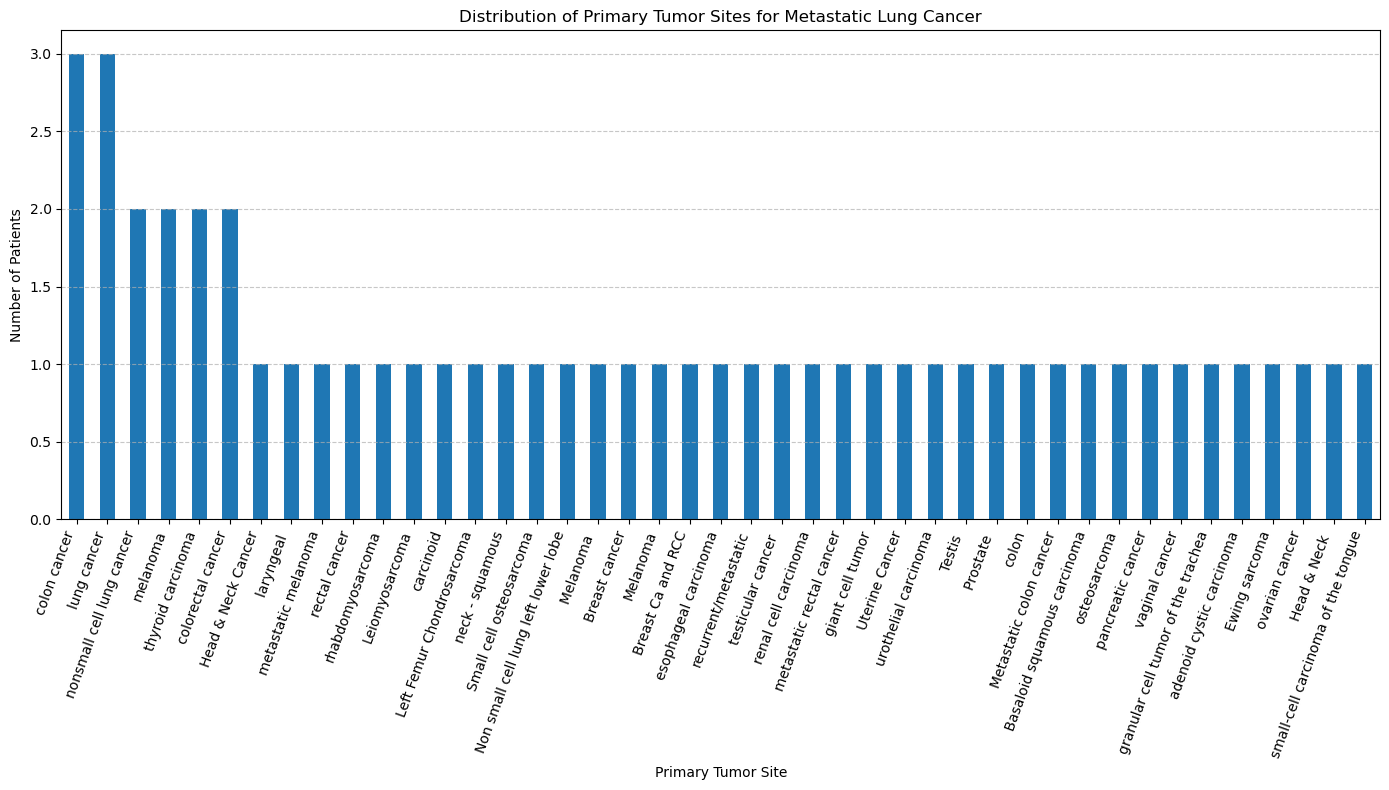

In [11]:
df = pd.read_excel('Tabular/tcia-diagnosis-data-2012-04-20.xls')

# Filter rows where the value of the second column is 3
df_metastatic = df[df.iloc[:, 1] == 3]

# Count the primary tumor sites from the 'Primary Tumor Site for Metastatic Disease' column
primary_tumor_counts = df_metastatic['Primary tumor site for metastatic disease'].value_counts()

# Plot the distribution
plt.figure(figsize=(14, 8))  
primary_tumor_counts.plot(kind='bar')
plt.xlabel('Primary Tumor Site')
plt.ylabel('Number of Patients')
plt.title('Distribution of Primary Tumor Sites for Metastatic Lung Cancer')
plt.xticks(rotation=70, ha='right', fontsize=10)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

The chart highlights that some rows are marked as "3" (metastatic disease) under the "Diagnosis at the Patient Level," but the "Primary Tumor Site for Metastatic Disease" is labeled as a type of lung cancer. This is **incoherent ** because these cases should be classified as "2" (primary lung cancer) rather than metastatic.

The file **lidc-idri-nodule-counts-6-23-2015.xlsx** provides a summary of the nodules identified within each patient in the LIDC-IDRI dataset.Here is an overview of the columns and the meaning of the notes (*, ** , *** ):
- TCIA Patient ID: Unique identifier for each patient whose scan was analyzed.
- Total Number of Nodules: The total count of nodules detected in a patient, regardless of size.
    - Note: This includes any lesion marked as either a "nodule < 3mm" or a "nodule >= 3mm" by at least one of the four LIDC radiologists.
- Number of Nodules >= 3mm: Count of nodules that are 3mm or larger.
    - Note: These nodules were marked as "nodule >= 3mm" by at least one of the four LIDC radiologists, irrespective of the markings by the other radiologists.
- Number of Nodules < 3mm: Count of nodules smaller than 3mm.
    - Note: These are nodules that were specifically marked as "nodule < 3mm" by at least one radiologist, without any other radiologist marking them as "nodule >= 3mm."

In [12]:
#Ensure you have already performed - pip install openpyxl
df2= pd.read_excel('Tabular/lidc-idri-nodule-counts-6-23-2015.xlsx')
df2_sorted= df2.sort_values(by= 'TCIA Patent ID')
df2_sorted.head()

TCIA Patent ID  Total Number of Nodules*   Number of Nodules >=3mm**  \
0  LIDC-IDRI-0001                          4                          1   
1  LIDC-IDRI-0002                         12                          1   
2  LIDC-IDRI-0003                          4                          4   
3  LIDC-IDRI-0004                          4                          1   
4  LIDC-IDRI-0005                          9                          3   

   Number of Nodules <3mm***  Unnamed: 4  \
0                          3         NaN   
1                         11         NaN   
2                          0         NaN   
3                          3         NaN   
4                          6         NaN   

                                          Unnamed: 5  
0                                                NaN  
1  *total number of lesions that received either ...  
2  **total number of lesions that received a "nod...  
3  ***total number of lesions that received a "no...  
4                                                NaN

The next bar plot displays the overall distribution of nodule sizes across all patients in the dataset. The data is divided into two categories. The plot shows that nodules < 3mm are more prevalent than those >= 3mm, suggesting that smaller nodules are more commonly identified across the dataset.

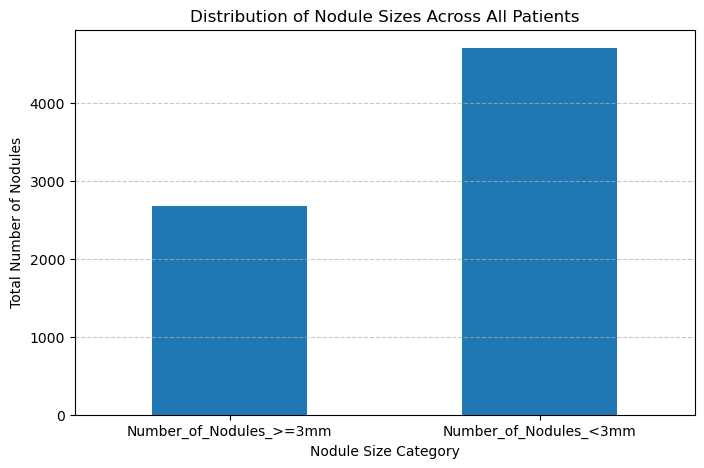

In [15]:
df2_filtered = df2_sorted[df2_sorted['TCIA Patent ID'].notna()]

df2_filtered.columns = df2_filtered.columns.str.strip().str.replace('*', '', regex=False).str.replace(' ', '_')

size_distribution = df2_filtered[['Number_of_Nodules_>=3mm', 'Number_of_Nodules_<3mm']].sum()

plt.figure(figsize=(8, 5))
size_distribution.plot(kind='bar')
plt.xlabel('Nodule Size Category')
plt.ylabel('Total Number of Nodules')
plt.title('Distribution of Nodule Sizes Across All Patients')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The next bar plot identifies the top 10 patients who have the highest total count of nodules in their scans. Each bar represents a patient, labeled by their unique "TCIA Patient ID". The plot reveals that a few patients have notably higher nodule counts (with some exceeding 50 nodules), which significantly deviates from the general distribution observed in the larger dataset. 

The average (mean) number of nodules per patient is: 7.24
The standard deviation is: 8.35


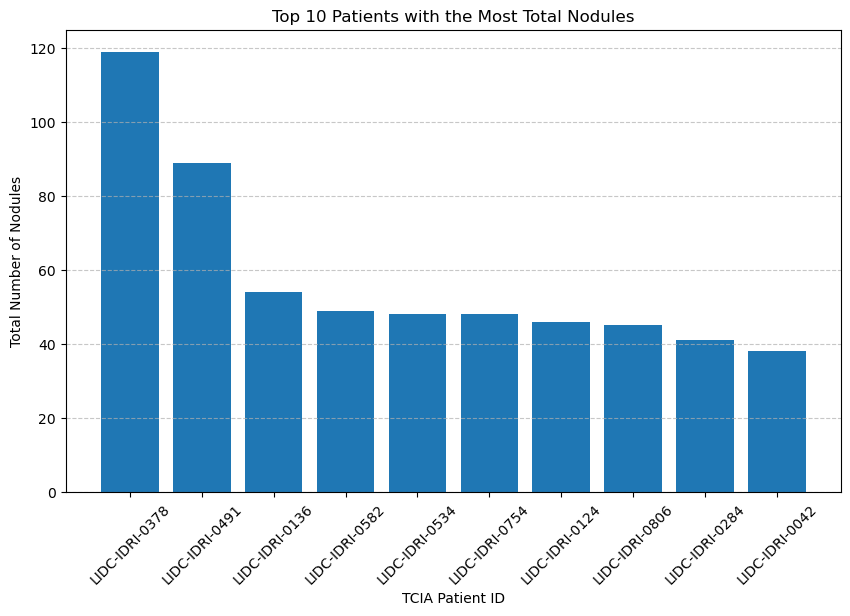

In [16]:
df2_filtered = df2_sorted[df2_sorted['TCIA Patent ID'].notna()].copy()  # Make a copy to avoid SettingWithCopyWarning

df2_filtered.columns = df2_filtered.columns.str.strip().str.replace('*', '', regex=False).str.replace(' ', '_')

df2_filtered.loc[:, 'Total_Number_of_Nodules'] = pd.to_numeric(df2_filtered['Total_Number_of_Nodules'], errors='coerce')

top_patients = df2_filtered.nlargest(10, 'Total_Number_of_Nodules')

mean_nodules = df2_filtered['Total_Number_of_Nodules'].mean()
std_nodules = df2_filtered['Total_Number_of_Nodules'].std()

print(f"The average (mean) number of nodules per patient is: {mean_nodules:.2f}")
print(f"The standard deviation is: {std_nodules:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(top_patients['TCIA_Patent_ID'], top_patients['Total_Number_of_Nodules'])
plt.xlabel('TCIA Patient ID')
plt.ylabel('Total Number of Nodules')
plt.title('Top 10 Patients with the Most Total Nodules')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.3. CT Image Data <a name="image"></a>
[[go back to the top]](#contents)

As suggested in **[5]**, we started by using pylidc (https://pylidc.github.io/) **[6]**, a Python library designed for analyzing lung nodules in CT scans from the Lung Image Database Consortium (LIDC). This library efficiently loads and manages images and annotations from the LIDC-IDRI dataset, extracts features for detailed analysis of lung nodules, and displays CT scans, segmentations, and annotations for better interpretation.

In this Python script, we extract important imaging details for a patient, including pixel spacing, slice thickness, and slice spacing.  

In [17]:
scans = pl.query(pl.Scan).all()

# Print the total number of scans in the dataset
print(f"Total number of scans retrieved: {len(scans)}")

# Print the first scan object information
print(f"First scan object: {scans[0]}")

# Select the first scan from the list of scans
first_scan = scans[0]

print(f"Patient ID: {first_scan.patient_id}")
print(f"Slice Thickness: {first_scan.slice_thickness}")  
print(f"Pixel Spacing: {first_scan.pixel_spacing}")  
print(f"Slice Spacing: {first_scan.slice_spacing}")  

# Print the number of annotations from the first scan
print(f"Number of annotations on the patient {first_scan.patient_id}: {len(first_scan.annotations)}")

Total number of scans retrieved: 1018
First scan object: Scan(id=1,patient_id=LIDC-IDRI-0078)
Patient ID: LIDC-IDRI-0078
Slice Thickness: 3.0
Pixel Spacing: 0.65
Slice Spacing: 3.0
Number of annotations on the patient LIDC-IDRI-0078: 13


The **slice thickness** indicates how much tissue is represented in a single image slice. While the current output shows a slice thickness of 3.0 mm, it's important to note that modern imaging techniques often achieve slice thicknesses as small as 1 mm or even 0.5 mm, offering significantly higher resolution and more detailed anatomical insights

**Pixel spacing**, which represents the physical distance between the centers of two adjacent pixels, is crucial for determining the spatial resolution of the images. Smaller pixel spacing values enhance the image's detail, allowing for clearer visualization of small structures. 

**Slice spacing**, the distance between consecutive slices, is also a critical factor. Ideally, slice spacing should be equal to or less than the slice thickness to avoid gaps in the data and ensure that the reconstructed volume accurately represents the patient's anatomy. 

In [18]:
# Print number of scans that have a slice thickness of ≤1 mm and where the pixel spacing ≤ slice thicknes
example = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1, pl.Scan.pixel_spacing <= pl.Scan.slice_thickness)
count = example.count()
print(f"Number of scans that meet the recommended criteria: {count}")

Number of scans that meet the recommended criteria: 92


However, as we can see by the code above, only 92 scans out of 1018 meet the desired criteria.

The next script retrieves all annotations for a specific CT scan. It then collects details like the centroid, diameter, volume, and surface area for each annotation and displays them in a table.

In [20]:
# Get the list of annotations for the first scan
annotations = scans[0].annotations

# Print the number of annotations
print(f"Number of annotations for scan {scans[0].patient_id}: {len(annotations)}")

# Create a list to store annotation details
annotation_data = []

# Loop through each annotation and collect its details
for i, annotation in enumerate(annotations, 1):
    annotation_data.append({
        "Annotation ID": i,
        "Center (x, y, z)": [round(coord, 2) for coord in annotation.centroid],  # Round centroid coordinates
        "Diameter (mm)": round(annotation.diameter, 2),
        "Volume (mm^3)": round(annotation.volume, 2),
        "Surface Area (mm^2)": round(annotation.surface_area, 2)
    })

df_annotations = pd.DataFrame(annotation_data)

print(df_annotations)

Number of annotations for scan LIDC-IDRI-0078: 13
    Annotation ID         Center (x, y, z)  Diameter (mm)  Volume (mm^3)  \
0               1    [169.2, 360.81, 46.2]          20.84        2439.30   
1               2  [312.31, 331.91, 25.65]          19.50        2621.82   
2               3  [245.08, 340.54, 67.55]          23.30        4332.31   
3               4  [244.65, 341.29, 67.47]          32.81        5230.34   
4               5  [169.21, 360.82, 46.22]          20.89        2443.74   
5               6  [309.92, 328.61, 25.41]          27.65        2703.58   
6               7  [244.03, 341.75, 67.82]          28.67        4554.13   
7               8  [348.83, 336.42, 47.42]           5.08          62.11   
8               9  [168.86, 361.05, 46.28]          23.54        1510.23   
9              10  [309.88, 327.92, 25.17]          27.98        2260.59   
10             11  [245.59, 341.53, 67.67]          26.00        5365.96   
11             12   [171.0, 361.26, 46

The following code snippet demonstrates how annotations from a CT scan can be clustered into nodules. In the LIDC-IDRI dataset, each nodule is characterized by one or more annotations, which represent different interpretations by the radiologists. However, a nodule is typically annotated by up to four radiologists, meaning that there can be one to four annotations per nodule. To identify **which annotations belong to the same nodule**, we use the pylidc library's cluster_annotations() method.

As described in the pylidc documentation:

"The scan has 13 annotations, but which refer to the same nodule? This can be determined using the pylidc.Scan.cluster_annotations() method, which uses a distance function to create an adjacency graph to determine which annotations refer to the same nodule in a scan" [6].

This clustering method groups annotations based on spatial proximity and other properties, aiming to represent each unique nodule. Below is an example of clustering annotations for the first patient in the dataset:

In [21]:
nods = scans[0].cluster_annotations()
print("%s has %d nodules." % (scans[0], len(nods)))

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


However, we observed that this method does not always perform as expected. In some cases, the clustering algorithm does not correctly group annotations, resulting in nodules with more than four annotations, which may require manual correction. For instance, consider the following case for a different patient:

In [22]:
nods = scans[65].cluster_annotations()
print("%s has %d nodules." % (scans[65], len(nods)))

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Scan(id=66,patient_id=LIDC-IDRI-0055) has 7 nodules.
Nodule 1 has 6 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 2 annotations.
Nodule 4 has 1 annotations.
Nodule 5 has 4 annotations.
Nodule 6 has 1 annotations.
Nodule 7 has 2 annotations.


The following snippet dives deeper into the clustered nodules. For each nodule, it loops through its annotations and prints details, allowing to understand the individual annotations that make up each nodule.

In [23]:
# Cluster the annotations into nodules for the first scan
nods = scans[0].cluster_annotations()

print(f"{scans[0]} has {len(nods)} nodules.")

# Create a list to store details about nodules and their annotations
nodule_data = []

# Loop through each nodule and its annotations
for i, nod in enumerate(nods):
    nodule_id = i + 1
    num_annotations = len(nod)
    
    for j, annotation in enumerate(nod):
        annotation_id = j + 1
        nodule_data.append({
            "Nodule ID": nodule_id,
            "Annotation ID": annotation_id,
            "Number of Annotations": num_annotations,
            "Center (x, y, z)": [round(coord, 2) for coord in annotation.centroid],
            "Diameter (mm)": round(annotation.diameter, 2),
            "Volume (mm^3)": round(annotation.volume, 2),
            "Surface Area (mm^2)": round(annotation.surface_area, 2)
        })

df_nodules = pd.DataFrame(nodule_data)

print(df_nodules)

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
    Nodule ID  Annotation ID  Number of Annotations         Center (x, y, z)  \
0           1              1                      4  [312.31, 331.91, 25.65]   
1           1              2                      4  [309.92, 328.61, 25.41]   
2           1              3                      4  [309.88, 327.92, 25.17]   
3           1              4                      4  [313.88, 332.56, 25.48]   
4           2              1                      4    [169.2, 360.81, 46.2]   
5           2              2                      4  [169.21, 360.82, 46.22]   
6           2              3                      4  [168.86, 361.05, 46.28]   
7           2              4                      4   [171.0, 361.26, 46.44]   
8           3              1                      1  [348.83, 336.42, 47.42]   
9           4              1                      4  [245.08, 340.54, 67.55]   
10          4              2                      4  [244.65, 341.29

Visualizing Annotation 1 of Nodule 1


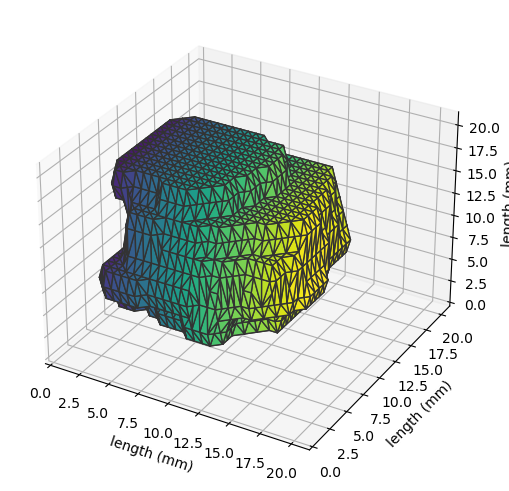

Visualizing Annotation 2 of Nodule 1


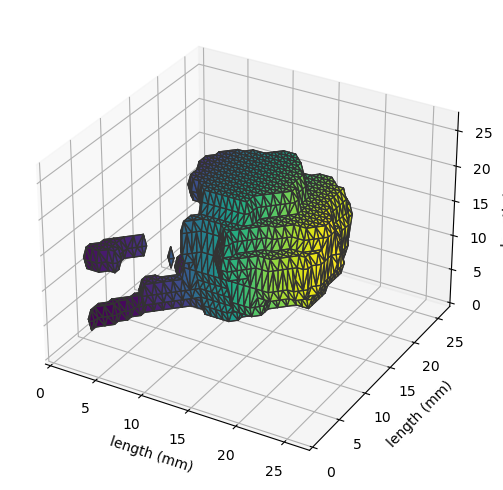

Visualizing Annotation 3 of Nodule 1


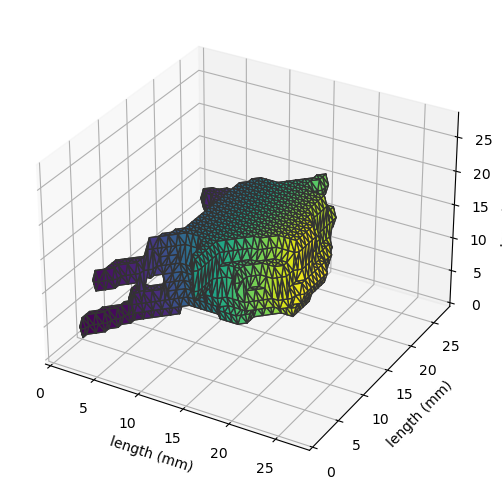

Visualizing Annotation 4 of Nodule 1


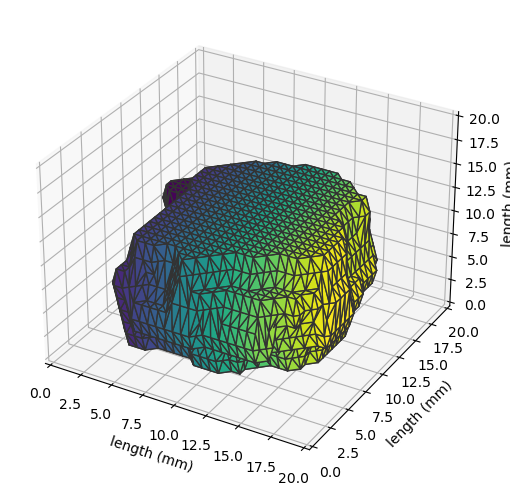

In [24]:
# Patient ID for the first patient
pid = 'LIDC-IDRI-0078'

# Query the scan for the patient
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()

# Cluster annotations into nodules
nodules = scan.cluster_annotations()

# Select the first nodule (index 0) and its annotations
first_nodule = nodules[0]
annotations = list(first_nodule)  # List of annotations for the first nodule

# Loop through each annotation and visualize it separately in 3D
for i, annotation in enumerate(annotations):
    print(f"Visualizing Annotation {i+1} of Nodule 1")
    annotation.visualize_in_3d()

The following table provides a summary of the annotation features available in the pylidc library for lung nodule characterization in the LIDC-IDRI dataset. Each nodule in a CT scan is annotated by radiologists, with several features describing its visual and morphological properties. These features are represented as integer values ranging from 1 to 5 (or 4, 6 in some cases), which are then mapped to descriptive categories.

This table lists each feature alongside its possible integer values and their corresponding descriptions. The descriptions help interpret the raw numeric data and provide meaningful insights into the nodule's characteristics.

| **Feature**           | **Int Values & Descriptions**                                            |
|-----------------------|--------------------------------------------------------------------------|
| **Subtlety**          | 1: Extremely Subtle, 2: Moderately Subtle, 3: Fairly Subtle, 4: Moderately Obvious, 5: Obvious |
| **Internal Structure**| 1: Soft Tissue, 2: Fluid, 3: Fat, 4: Air                                 |
| **Calcification**     | 1: Popcorn, 2: Laminated, 3: Solid, 4: Non-central, 5: Absent, 6: Central |
| **Sphericity**        | 1: Linear, 2: Ovoid/Linear, 3: Ovoid, 4: Ovoid/Round, 5: Round           |
| **Margin**            | 1: Poorly Defined, 2: Near Poorly Defined, 3: Medium Margin, 4: Near Sharp, 5: Sharp |
| **Lobulation**        | 1: No Lobulation, 2: Nearly No Lobulation, 3: Medium Lobulation, 4: Near Marked Lobulation, 5: Marked Lobulation |
| **Spiculation**       | 1: No Spiculation, 2: Nearly No Spiculation, 3: Medium Spiculation, 4: Near Marked Spiculation, 5: Marked Spiculation |
| **Texture**           | 1: Non-Solid/GGO, 2: Non-Solid/Mixed, 3: Part Solid/Mixed, 4: Solid/Mixed, 5: Solid |
| **Malignancy**        | 1: Highly Unlikely, 2: Moderately Unlikely, 3: Indeterminate, 4: Moderately Suspicious, 5: Highly Suspicious |

Certain attributes are categorized as **non-ordinal** due to the nature of their measurement. Non-ordinal attributes are qualitative characteristics that lack a meaningful order or ranking. Instead, they represent distinct categories describing the features of nodules identified in imaging studies. The non-ordinal features include **Internal Structure** and **Calcification**.

The LIDC-IDRI dataset also comes with metadata, which provides information about the CT scans, including file locations, patient IDs, and series UIDs. The metadata is loaded into a pandas DataFrame to facilitate access to this information.

In [2]:
meta = pd.read_csv('Tabular/metadata.csv')
meta.head(1)

Series UID  Collection  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  LIDC-IDRI         NaN   

                                                                               3rd Party Analysis  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX   

                                                   Data Description URI  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...       LIDC-IDRI-0011   

                                                                                           Subject ID  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  1.3.6.1.4.1.14519.5.2.1.6279.6001.129840843404...   

                                                   Study UID  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...       NaN   

                                                   Study Description  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...        01-01-2000   

                                                   Study Date  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...        NaN   

                                                    Series Description  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  GE MEDICAL SYSTEMS   

                                                   Manufacturer  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...           DX   

                                                                                          Modality  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  Digital X-Ray Image Storage - For Presentation   

                                                                 SOP Class Name  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  1.2.840.10008.5.1.4.1.1.1.1   

                                                    SOP Class UID  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...              2   

                                                    Number of Images  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...                15   

                                                   File Size  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...     20 MB   

                                                                                        File Location  \
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  ./LIDC-IDRI/LIDC-IDRI-0011/01-01-2000-NA-NA-55...   

                                                         Download Timestamp  
1.3.6.1.4.1.14519.5.2.1.6279.6001.1541453959812...  2024-09-26T19:16:51.099

In [5]:
dir = meta.iloc[3]['File Location']
dir

'./LIDC-IDRI/LIDC-IDRI-0069/01-01-2000-NA-NA-29787/3079.000000-NA-04249'

To visualize the CT images, we use pydicom to read the DICOM files. Each CT scan is composed of multiple slices, each saved as a DICOM file. Here, we load two slices (index 001 and 114) for visualization purposes.

The pixel array values are transformed into Hounsfield Units (HU), which is the standard unit for CT imaging. This is achieved using the RescaleSlope and RescaleIntercept values from the DICOM header, which adjust the pixel intensity values.

In [7]:
CT_folder = os.path.join(dir)
ct1 = pydicom.read_file(os.path.join(CT_folder, '1-001.dcm'))
ct2 = pydicom.read_file(os.path.join(CT_folder, '1-114.dcm'))
image1 = ct1.pixel_array
image2 = ct2.pixel_array
image1 = ct1.RescaleSlope * image1 + ct1.RescaleIntercept
image2 = ct2.RescaleSlope * image2 + ct2.RescaleIntercept

The transformed slices are visualized using Matplotlib, with a grayscale colormap (Greys_r). Each visualization includes a colorbar indicating the range of Hounsfield Units.

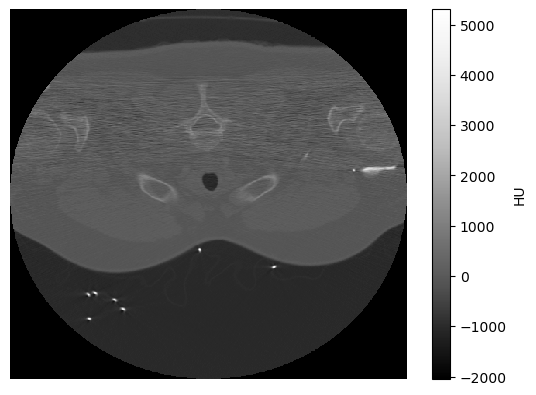

In [8]:
plt.pcolormesh(image1, cmap='Greys_r')
plt.colorbar(label='HU')
plt.axis('off')
plt.show()

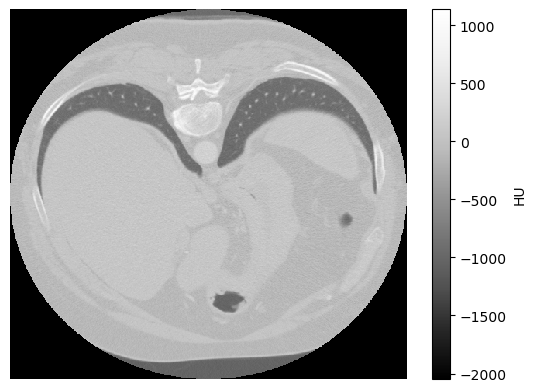

In [9]:
plt.pcolormesh(image2, cmap='Greys_r')
plt.colorbar(label='HU')
plt.axis('off')
plt.show()

Pylidc also offers the possibility to load the dicom images and provide information regarding the number of annotations for each nodule. However, as stated before this approach does not always work.

Number of nodules for LIDC-IDRI-0078: 4
Loading dicom files ... This may take a moment.
Number of images loaded for LIDC-IDRI-0078: 87
Loading dicom files ... This may take a moment.


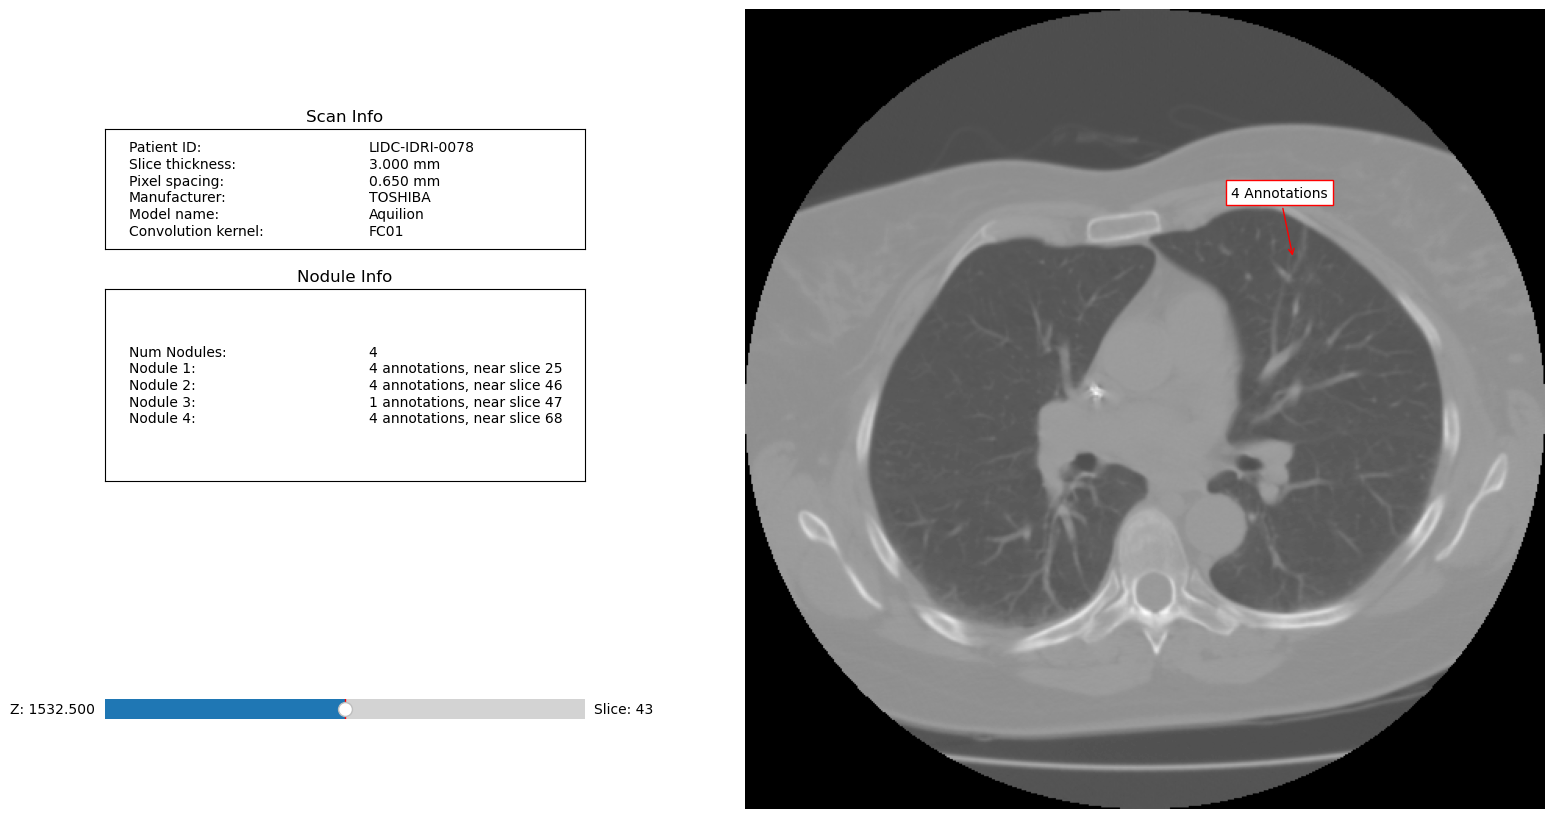

In [10]:
patient_id = 'LIDC-IDRI-0078'

# Query the scan for the given patient
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == patient_id).first()

# Cluster annotations into nodules
nodules = scan.cluster_annotations()  

# Print the number of nodules
print(f"Number of nodules for {patient_id}: {len(nodules)}")

# Load all DICOM images for the scan
images = scan.load_all_dicom_images()
print(f"Number of images loaded for {patient_id}: {len(images)}")

# Visualize the scan with the nodules
scan.visualize(annotation_groups=nodules)

## 4. Data Preparation <a name="data_preparation"></a>
[[go back to the top]](#contents)

### 4.1. Feature extraction <a name="extraction"></a>
[[go back to the top]](#contents)

A significant obstacle in analyzing the LIDC dataset is the absence of unique identifiers for the nodules. Multiple radiologists may annotate the same nodule, but there are **no clear markers** indicating when different annotations refer to the same physical nodule, complicating the determination of whether they describe the same nodule. 

Using clustering, as mentioned previously, can lead to issues such as having nodule annotations that exceed 4 separate entries, which is impossible and indicates that the clustering function is not working correctly. Clustering based on coordinates introduces arbitrary decisions, such as setting thresholds for overlap, which can lead to errors and inaccuracies, as stated by M. Hancock:

"Algorithmically, it is possible to roughly determine which annotations refer to identical nodules by comparing the coordinates and overlap of annotations. However, this process requires somewhat arbitrary choices to be made to determine when multiple annotations may actually refer to the same nodule. For example, one would need to decide at what percentage of overlap, or at what average distance among annotation coordinates, multiple annotations would be declared to refer to the same physical nodule. For these reasons, we treat each annotation as a unique sample for our dataset" **[7]**.

By treating each annotation as an independent sample, we can capture the variability in feature quantification and malignancy ratings due to differences in radiologists' experience, training, and potential mislabeling. This approach enhances objectivity in the analysis by avoiding subjective clustering decisions. Furthermore, it simplifies modeling and reflects the natural variability in radiologists' interpretations, ultimately improving model robustness and eliminating the need to choose between mean, mode, or median for certain features.

Given the information provided above, we implemented a Python script titled `features_extraction.py` that addresses the issues surrounding the LIDC-IDRI dataset's structure. Specifically, this script tackles the absence of unique identifiers for nodules and ensures that each annotation is treated independently to capture variability in radiologist assessments. The script extracts **radiomic features** using PyRadiomics, **frequency-domain features** using a 3D Fourier Transform, and **semantic features** based on the radiologists' annotations from the LIDC dataset.

Key components of the script include:

1. **Radiomic Feature Extraction:**
   - We used the `PyRadiomics` library to compute detailed radiomic features for each annotated nodule, including **texture**, **shape**, and **intensity** characteristics. These features are crucial for understanding the structure and properties of the nodules.

2. **3D Fourier Transform:**
   - A 3D Fourier Transform is applied to the nodule images to derive features from the frequency domain. The Fourier Transform decomposes an image into frequency components, creating a high-dimensional array where low frequencies capture broad structures and high frequencies detect fine details like edges. We added Fourier-based features to our radiomics analysis, based on insights from **[8]**, to enhance texture pattern detection in lung nodules. To simplify the high-dimensional output and reduce file size, we divided the frequencies into 9 bins, where bin 1 represents low frequencies and higher bins capture finer details. This captures the most relevant information without using the full high-dimensional vector, which would exceed 1 GB. By normalizing the magnitude histograms of each bin, we can compare frequency characteristics between nodules and identify which frequency ranges are more or less prominent.

3. **Semantic Feature Extraction:**
   - The script extracts **semantic features** that were annotated by radiologists in the LIDC-IDRI dataset. These include attributes such as **subtlety**, **internal structure**, **calcification**, **sphericity**, **margin**, **lobulation**, **spiculation**, **texture**, **malignancy**, **diameter**, **surface area**, and **volume**. These features capture the subjective assessments made by radiologists regarding each nodule’s characteristics.

4. **Nodule Handling and Annotations:**
   - For each scan, we extract the nodule’s region using its bounding box. Both radiomic and semantic features (as described above) are included in the final feature set.
   - The absence of unique identifiers in the LIDC-IDRI dataset is addressed by assigning a unique Nodule_ID to each annotation, ensuring that each nodule is treated as an independent entity.

5. **Multithreaded Processing:**
   - To improve performance, we employ multithreading using Python’s ThreadPoolExecutor, enabling concurrent processing of multiple scans and nodules. 

6. **Final Output:**
   - The extracted features are saved to a pandas DataFrame and then exported as a CSV file (`radiomic_features_pylidc_and_fourier_per_annotation.csv`), which contains both radiomic, semantic, and 3D Fourier features for each nodule annotation.

**Note**:
Due to the heavy computational and memory demands of processing medical imaging data, we **recommend running this script locally** rather than directly in a Jupyter Notebook. Running the script locally allows for more efficient processing of large datasets and multi-threaded operations, ensuring better performance and stability.

In [ ]:
import pylidc as pl
import SimpleITK as sitk
import pandas as pd
from radiomics import featureextractor
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from scipy.fftpack import fftn  # Import FFT 3D function
import threading  # For thread-safe operations

# Initialize the feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Query the LIDC-IDRI dataset for scans with annotations
scans_with_annotations = pl.query(pl.Scan).filter(pl.Scan.annotations.any()).all()

# Lists to store the extracted features
features_list = []
nodule_id_counter = 1
nodule_id_lock = threading.Lock()  # Lock for thread-safe incrementing

# Function to compute 3D Fourier Transform and return relevant metrics
def calculate_fourier_3d(nodule_image):
    # Apply 3D Fourier Transform (FFT)
    fourier_transformed = fftn(nodule_image)

    # Extract magnitude spectrum (absolute values)
    magnitude_spectrum = np.abs(fourier_transformed)

    # Compute histogram with 10 bins
    hist, _ = np.histogram(magnitude_spectrum, bins=10)

    # Normalize histogram
    hist_normalized = hist / np.sum(hist)

    # Return the normalized histogram as features
    return {f'fourier_hist_bin_{i}': hist_normalized[i] for i in range(10)}

# Function to process a single scan and extract features
def process_scan(scan):
    global nodule_id_counter  # Keep track of nodule IDs across threads
    feature_data = []

    # Get the patient ID
    patient_id = scan.patient_id

    # Load the full scan volume
    scan_array = scan.to_volume()

    # Handle pixel spacing depending on its type
    if isinstance(scan.pixel_spacing, (list, tuple)):
        spacing = (scan.pixel_spacing[0], scan.pixel_spacing[1], scan.slice_thickness)
    else:
        # Assuming the spacing is isotropic, if pixel_spacing is a single float
        spacing = (scan.pixel_spacing, scan.pixel_spacing, scan.slice_thickness)

    # Convert the NumPy array to a SimpleITK image for radiomics processing
    scan_image = sitk.GetImageFromArray(scan_array)
    scan_image.SetSpacing(spacing)

    # Iterating through all annotations of the patient
    for ann in scan.annotations:
        # Get the bounding box for the annotation to reduce processing area
        bbox = ann.bbox()

        # Extract the nodule region from the scan array
        nodule_array = scan_array[bbox]

        # Get the mask for the annotation
        mask = ann.boolean_mask(pad=[(0, 0), (0, 0), (0, 0)])

        # Ensure the mask and nodule_array have the same shape
        if nodule_array.shape != mask.shape:
            # Resize mask to match nodule_array shape if necessary
            mask = mask[:nodule_array.shape[0], :nodule_array.shape[1], :nodule_array.shape[2]]

        # Convert the nodule array and mask to SimpleITK images
        nodule_image_sitk = sitk.GetImageFromArray(nodule_array)
        nodule_image_sitk.SetSpacing(spacing)

        mask_image = sitk.GetImageFromArray(mask.astype(np.uint8))
        mask_image.SetSpacing(spacing)

        # Extract radiomic features using PyRadiomics
        features = extractor.execute(nodule_image_sitk, mask_image, label=1)

        # Add the patient ID and a unique ID for the nodule
        features['Patient_ID'] = patient_id

        # Thread-safe increment of nodule_id_counter
        with nodule_id_lock:
            features['Nodule_ID'] = f'Nodule_{nodule_id_counter}'
            nodule_id_counter += 1

        # Include the annotation's semantic features directly
        features.update({
            'subtlety': ann.subtlety,
            'internalStructure': ann.internalStructure,
            'calcification': ann.calcification,
            'sphericity': ann.sphericity,
            'margin': ann.margin,
            'lobulation': ann.lobulation,
            'spiculation': ann.spiculation,
            'texture': ann.texture,
            'malignancy': ann.malignancy,
            'diameter': ann.diameter,
            'surface_area': ann.surface_area,
            'volume': ann.volume
        })

        # Calculate Fourier Transform 3D features
        fourier_features = calculate_fourier_3d(nodule_array)
        features.update(fourier_features)

        # Add the features to the feature data
        feature_data.append(features)

    return feature_data

# Multithreaded execution
with ThreadPoolExecutor(max_workers=8) as executor:
    results = executor.map(process_scan, scans_with_annotations)

# Collect results from all workers
for result in results:
    features_list.extend(result)

# Create a DataFrame to store the features
features_df = pd.DataFrame(features_list)

# Save the features to a CSV file
features_df.to_csv('radiomic_features_pylidc_and_fourier_per_annotation.csv', index=False)

### 4.2. Initial Data Cleaning <a name="cleaning"></a>
[[go back to the top]](#contents)

Before proceeding with feature selection, we applied several data cleaning steps to the dataset to prioritize the most relevant features for modeling. The cleaning process includes:

- **Removing Diagnostic Columns**: We removed columns that contain basic diagnostic information about the images and masks, such as the mean pixel intensity and voxel counts. These columns serve as quality control indicators for the image processing pipeline but are often redundant and do not directly contribute to the prediction of malignancy. The following columns were removed: `diagnostics_Image-original_Mean`, `diagnostics_Image-original_Minimum`, `diagnostics_Image-original_Maximum`, `diagnostics_Mask-original_VoxelNum`, and `diagnostics_Mask-original_VolumeNum`.

- **Dropping Non-Numerical Columns**: All non-numeric columns were removed. Non-numeric data is unlikely to contribute meaningfully to the malignancy prediction task and can complicate the modeling process, so these columns were excluded.

- **Filtering Based on Malignancy**: Rows with a `malignancy` rating of 3, which represents ambiguous cases, were removed, following the strategy stated in **[7]**. This step ensures the data focuses on clear cases of benign and malignant nodules, reducing noise and making the classification task more straightforward.

- **One-Hot Encoding**: We performed one-hot encoding for the calcification and internalStructure columns, which contain non-ordinal values. This step converts each possible category into a new binary feature, making the categorical data suitable for modeling. After one-hot encoding, any boolean values (True/False) in the DataFrame were converted to 1 and 0, respectively.

- **Saving the Cleaned Dataset**: After applying the above steps, the cleaned dataset containing only numeric columns was saved as `all_features_cleaned.csv` for further analysis and feature selection.

The following code implements these data cleaning steps:

In [ ]:
df = pd.read_csv('radiomic_features_pylidc_and_fourier_per_annotation.csv')

# Define the diagnostic columns to remove
columns_to_remove = [
    'diagnostics_Image-original_Mean',
    'diagnostics_Image-original_Minimum',
    'diagnostics_Image-original_Maximum',
    'diagnostics_Mask-original_VoxelNum',
    'diagnostics_Mask-original_VolumeNum'
]

# Drop the diagnostic columns
df = df.drop(columns=columns_to_remove)

# Identify non-numeric columns (object, category, etc.), excluding 'patient ID'
non_numeric_cols = df.select_dtypes(exclude=[float, int]).columns.tolist()
non_numeric_cols = [col for col in non_numeric_cols if col != 'Patient_ID']

# Drop the identified non-numeric columns
df = df.drop(columns=non_numeric_cols)

# Perform one-hot encoding for 'calcification' and 'internalStructure' columns
df = pd.get_dummies(df, columns=['calcification', 'internalStructure'])

# Remove rows where 'malignancy' == 3
df = df[df['malignancy'] != 3]

# Convert boolean columns (if any) to 0/1 before saving
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Save the cleaned DataFrame with one-hot encoding applied to a new CSV file
df.to_csv('all_features_cleaned.csv', index=False)

In [13]:
df = pd.read_csv('all_features_cleaned.csv')

num_cols = len(df.columns)
print(f'The cleaned CSV file has {num_cols} columns.')

print("\nColumn names:")
print(df.columns.tolist())

The cleaned CSV file has 139 columns.

Column names:
['original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_Ro

After performing the initial cleaning steps, the cleaned CSV file still contains 139 columns. While we have removed non-numerical and diagnostic columns, as well as filtered out ambiguous malignancy ratings, the dataset still includes a large number of features. 

Given the high dimensionality of the data, we will also try to proceed with **feature selection** to reduce the number of features and focus on the most relevant variables for malignancy prediction. Hopefully, this step will help enhance model performance by minimizing noise and improving interpretability.

In [ ]:
df_combined = pd.read_csv('all_features_cleaned.csv')

# List of pylidc features
pylidc_features = [
    'subtlety', 'internalStructure_1', 'internalStructure_2', 'internalStructure_3', 'internalStructure_4', 
    'calcification_1', 'calcification_2', 'calcification_3', 'calcification_4', 'calcification_5', 
    'calcification_6', 'sphericity', 'margin', 'lobulation', 'spiculation', 'texture', 'diameter', 'surface_area', 'volume'
]

# Ensure 'malignancy' and 'Patient_ID' are retained in all datasets
target_columns = ['malignancy', 'Patient_ID']

# Separate pylidc features (including 'malignancy' and 'Patient_ID')
df_pylidc = df_combined[pylidc_features + target_columns]

# Separate Radiomic and Fourier features (including 'malignancy' and 'Patient_ID')
df_radiomic = df_combined.drop(columns=pylidc_features).copy()

# Save the datasets
df_pylidc.to_csv('pylidc_features.csv', index=False)
df_radiomic.to_csv('radiomic_features.csv', index=False)

Before the modeling step, we also decided to create the following datasets: 
- `pylidc_features.csv`: This dataset contains semantic features extracted from the LIDC annotations.
- `radiomic_features.csv`: This dataset includes radiomic features extracted using PyRadiomics and 3D Fourier features.
- `all_features_cleaned.csv`: This dataset merges the semantic features from PyLidc with the radiomic features.

### 4.3. Malignancy Analysis <a name="malignancy"></a>
[[go back to the top]](#contents)

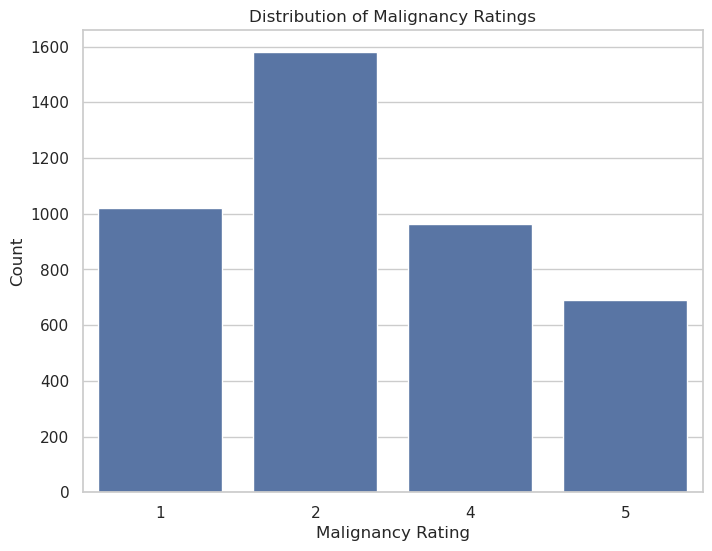

In [14]:
df = pd.read_csv('all_features_cleaned.csv')

sns.set(style='whitegrid')

# Create a bar plot for malignancy ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='malignancy', data=df, order=[1, 2, 4, 5])
plt.title('Distribution of Malignancy Ratings')
plt.xlabel('Malignancy Rating')
plt.ylabel('Count')
plt.show()


Diagnosis Category Counts:
diagnosis
benign       2600
malignant    1653
Name: count, dtype: int64


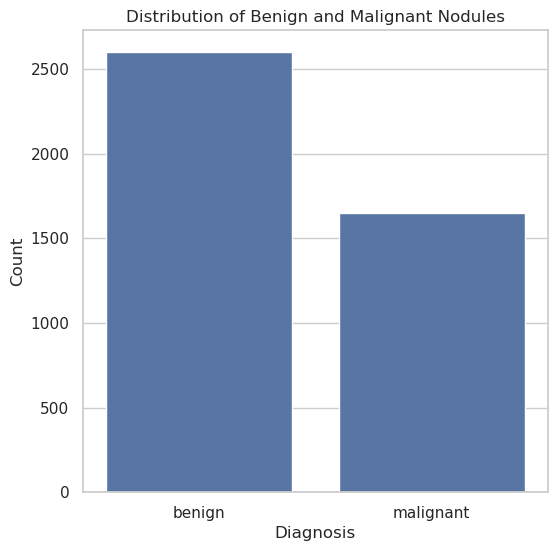

Percentage of Benign Cases: 61.13%
Percentage of Malignant Cases: 38.87%


In [15]:
# Define a mapping from malignancy ratings to diagnosis categories
diagnosis_mapping = {1: 'benign', 2: 'benign', 4: 'malignant', 5: 'malignant'}

# Create a new column 'diagnosis' based on the mapping
df['diagnosis'] = df['malignancy'].map(diagnosis_mapping)

# Get the counts of each diagnosis category
diagnosis_counts = df['diagnosis'].value_counts()
print("\nDiagnosis Category Counts:")
print(diagnosis_counts)

plt.figure(figsize=(6, 6))
sns.countplot(x='diagnosis', data=df, order=['benign', 'malignant'])
plt.title('Distribution of Benign and Malignant Nodules')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Calculate percentages
total_cases = len(df)
benign_count = diagnosis_counts['benign']
malignant_count = diagnosis_counts['malignant']

benign_percentage = (benign_count / total_cases) * 100
malignant_percentage = (malignant_count / total_cases) * 100

print(f"Percentage of Benign Cases: {benign_percentage:.2f}%")
print(f"Percentage of Malignant Cases: {malignant_percentage:.2f}%")

Concerning the malignancy distribution, the bar plots show that:

- Approximately **61%** of the samples have been rated as **benign** (ratings 1 and 2).
- Around **39%** of the samples are classified as **malignant** (ratings 4 and 5).

Given this distribution, while there is a slight imbalance between malignant and benign cases, the ratio is not extreme. In this case, it may not be necessary to apply advanced imbalance-handling techniques, such as oversampling (e.g., SMOTE or ADASYN) or undersampling. The imbalance is relatively modest and can often be managed without the need for specific resampling strategies.

## 5. Modeling <a name="modeling"></a>

### 5.1. Random Forest Classifier <a name="rf"></a>
[[go back to the top]](#contents)

We defined the function **run_random_forest_pipeline**, which performs a classification task using a Random Forest model to predict malignancy based on a given dataset. It begins by encoding the target variable and splitting the data into training and testing sets, ensuring there's no overlap in patient IDs to prevent data leakage. Features are scaled using **MinMaxScaler**, and **optional feature selection** is performed based on feature importances from a temporary Random Forest model. The selected important features are saved and visualized. The model is then trained using **Group K-Fold cross-validation** to maintain group integrity. Performance metrics such as **accuracy, F1 score, precision, recall, and ROC-AUC** are calculated for both cross-validation and test sets, with results saved to CSV files. Finally, the function generates and displays a **confusion matrix** and **ROC curve** for the test set to visualize the model's performance.

In [17]:
def run_random_forest_pipeline(df, dataset_name, use_feature_selection=False, feature_importance_threshold=0.01): 
    # Classify the malignancy (benign = 0, malignant = 1)
    df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

    # Separate features and target variable
    X = df.drop(['malignancy', 'Patient_ID'], axis=1)
    y = df['malignancy']
    groups = df['Patient_ID']
    
    # Keep track of original feature names
    feature_names = X.columns

    # Split the dataset using GroupShuffleSplit to ensure patients are not in both train and test sets
    gss = GroupShuffleSplit(test_size=0.2, random_state=42)
    train_idx, test_idx = next(gss.split(X, y, groups))

    # Create train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    train_groups = groups.iloc[train_idx]
    test_groups = groups.iloc[test_idx]

    # Verify that there is no overlap in Patient_IDs
    overlap = set(train_groups).intersection(set(test_groups))
    if overlap:
        print(f"Overlap in groups: {overlap}")
        raise ValueError("Overlap detected in train and test groups!")

    # Scale the features using MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # If feature selection is enabled, perform it based on Random Forest feature importances
    if use_feature_selection:
        rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_temp.fit(X_train_scaled, y_train)
        importances = rf_temp.feature_importances_

        # Select the important features based on the threshold
        selected_features = feature_names[importances > feature_importance_threshold]
        selected_importances = importances[importances > feature_importance_threshold]
        
        # Plot the selected important features with their importance scores
        plt.figure(figsize=(10, 8))
        plt.barh(selected_features, selected_importances, color='skyblue')
        plt.xlabel('Importance Score')
        plt.title(f'Selected Feature Importances ({dataset_name})')
        plt.tight_layout()
        plt.show()

        # Save the selected features and their importance scores to a CSV file
        selected_features_df = pd.DataFrame({
            'Feature': selected_features,
            'Importance': selected_importances
        })

        selected_features_filename = f'rf_selected_features_{dataset_name}.csv'
        selected_features_df.to_csv(selected_features_filename, index=False)
        print(f"Selected features saved to '{selected_features_filename}'")

        # Now filter the scaled train/test sets using selected features
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)[selected_features]
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)[selected_features]
    
    else:
        # If no feature selection, convert scaled arrays back to DataFrames with original feature names
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
    
    # Initialize Random Forest model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    scoring = {
        'accuracy': 'accuracy',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'  
    }

    # Use GroupKFold to ensure no patient is in both the training and validation sets
    group_kfold = GroupKFold(n_splits=10)
    cv_results = cross_validate(rf, X_train_scaled, y_train, groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False)

    # Create DataFrame from cross-validation results
    cv_results_df = pd.DataFrame({
        'fold': range(1, len(cv_results['test_accuracy']) + 1),
        'accuracy': cv_results['test_accuracy'],
        'f1': cv_results['test_f1'],
        'precision': cv_results['test_precision'],
        'recall': cv_results['test_recall'],
        'roc_auc': cv_results['test_roc_auc']
    })

    # Compute mean and std
    mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
    mean_row['fold'] = 'mean'

    std_row = cv_results_df.std(numeric_only=True).to_frame().T
    std_row['fold'] = 'std'

    # Rearrange columns to place 'fold' at the front
    mean_row = mean_row[cv_results_df.columns]
    std_row = std_row[cv_results_df.columns]

    # Append mean and std to the DataFrame
    cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

    # Now, evaluate the model on the test set
    rf.fit(X_train_scaled, y_train)  
    y_pred_test = rf.predict(X_test_scaled)
    y_proba_test = rf.predict_proba(X_test_scaled)[:, 1]

    # Test set evaluation
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_roc_auc = roc_auc_score(y_test, y_proba_test)

    # Create DataFrame for test set results
    test_results_df = pd.DataFrame({
        'fold': ['test_set'],
        'accuracy': [test_accuracy],
        'f1': [test_f1],
        'precision': [test_precision],
        'recall': [test_recall],
        'roc_auc': [test_roc_auc]
    })

    # Append test set results to results_df
    cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

    # Save the results to CSV
    cv_results_df.to_csv(f'{dataset_name}_random_forest_results.csv', index=False)
    print(f"Cross-validation and test results saved to '{dataset_name}_random_forest_results.csv'")

    # Extract mean and std values for printing
    mean_accuracy = mean_row['accuracy'].values[0]
    std_accuracy = std_row['accuracy'].values[0]
    mean_f1 = mean_row['f1'].values[0]
    std_f1 = std_row['f1'].values[0]
    mean_precision = mean_row['precision'].values[0]
    std_precision = std_row['precision'].values[0]
    mean_recall = mean_row['recall'].values[0]
    std_recall = std_row['recall'].values[0]
    mean_roc_auc = mean_row['roc_auc'].values[0]
    std_roc_auc = std_row['roc_auc'].values[0]

    # Print cross-validation mean and std results
    print(f"\n{dataset_name} (Cross-Validation Results)")
    print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
    print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

    # Print test set results
    print(f"\n{dataset_name} (Test Set Results)")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")

    # Plot confusion matrix for test set
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({dataset_name} - Test Set)')
    plt.show()

    # Plot ROC curve for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.figure()
    plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name} - Test Set)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

#### 5.1.1. Using the combined dataset without feature selection <a name="rf_combined"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Combined Dataset (Without Feature Selection)_random_forest_results.csv'

Combined Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8543 ± 0.0239
F1 Score (10-fold CV): 0.8104 ± 0.0416
Precision (10-fold CV): 0.8373 ± 0.0470
Recall (10-fold CV): 0.7866 ± 0.0519
ROC-AUC (10-fold CV): 0.9240 ± 0.0219

Combined Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8798
Test F1 Score: 0.8164
Test Precision: 0.8218
Test Recall: 0.8111
Test ROC-AUC: 0.9457


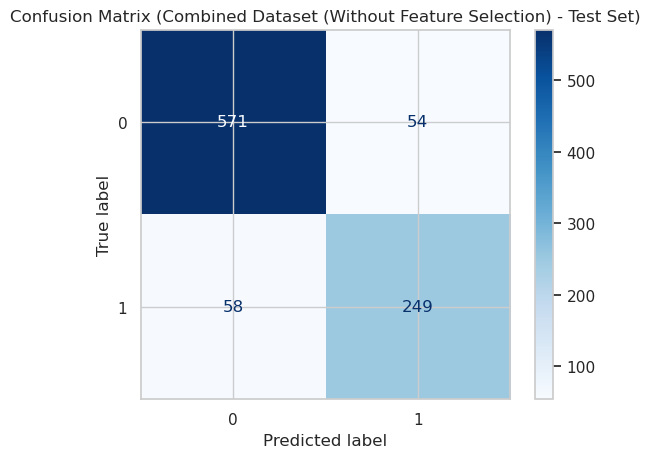

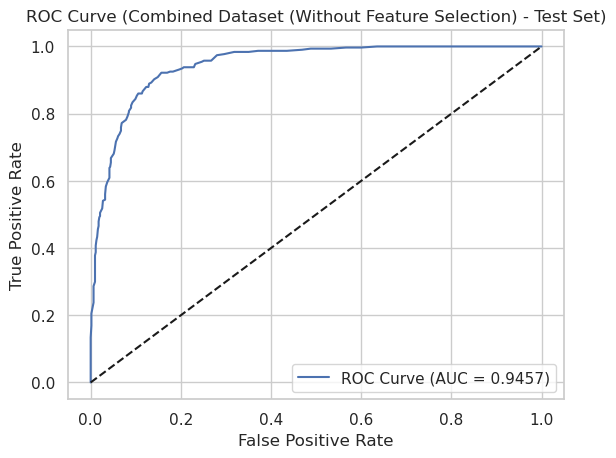

In [18]:
df_combined = pd.read_csv('all_features_cleaned.csv')
run_random_forest_pipeline(df_combined, dataset_name="Combined Dataset (Without Feature Selection)")

#### 5.1.2. Using the combined dataset with feature selection <a name="rf_combined_feature"></a>
[[go back to the top]](#contents)

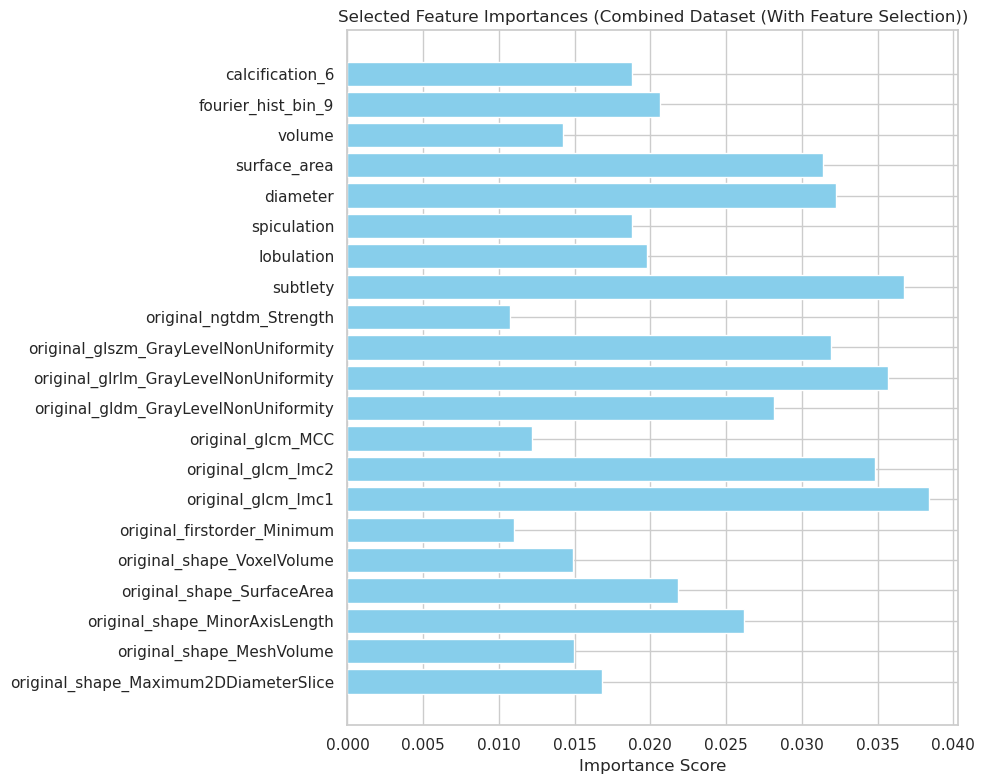

Selected features saved to 'rf_selected_features_Combined Dataset (With Feature Selection).csv'
Cross-validation and test results saved to 'Combined Dataset (With Feature Selection)_random_forest_results.csv'

Combined Dataset (With Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8684 ± 0.0230
F1 Score (10-fold CV): 0.8282 ± 0.0458
Precision (10-fold CV): 0.8505 ± 0.0540
Recall (10-fold CV): 0.8077 ± 0.0469
ROC-AUC (10-fold CV): 0.9345 ± 0.0246

Combined Dataset (With Feature Selection) (Test Set Results)
Test Accuracy: 0.8970
Test F1 Score: 0.8462
Test Precision: 0.8328
Test Recall: 0.8599
Test ROC-AUC: 0.9561


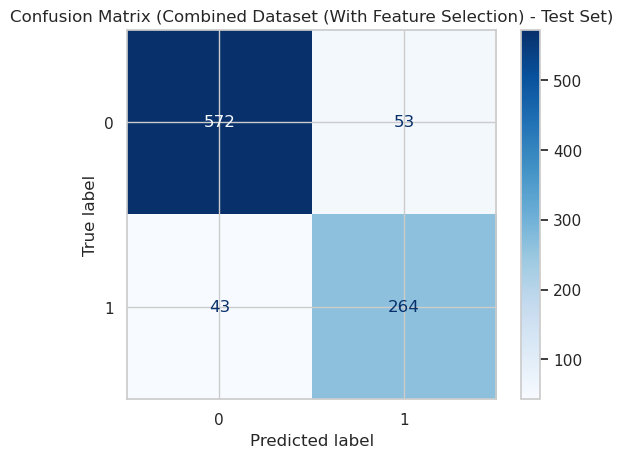

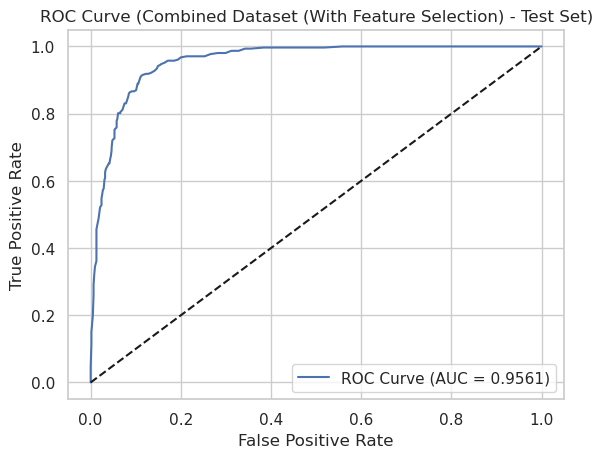

In [19]:
df_combined = pd.read_csv('all_features_cleaned.csv')
run_random_forest_pipeline(df_combined, dataset_name="Combined Dataset (With Feature Selection)", use_feature_selection=True)

#### 5.1.3. Using the radiomic dataset without feature selection <a name="rf_radiomic"></a>
[go back to the top](#contents)

Cross-validation and test results saved to 'Radiomic Dataset (Without Feature Selection)_random_forest_results.csv'

Radiomic Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8169 ± 0.0201
F1 Score (10-fold CV): 0.7641 ± 0.0478
Precision (10-fold CV): 0.7775 ± 0.0541
Recall (10-fold CV): 0.7520 ± 0.0499
ROC-AUC (10-fold CV): 0.8843 ± 0.0219

Radiomic Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8294
Test F1 Score: 0.7415
Test Precision: 0.7403
Test Recall: 0.7427
Test ROC-AUC: 0.9078


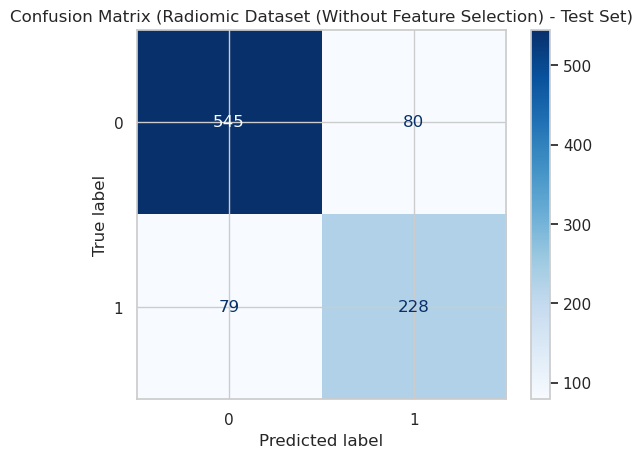

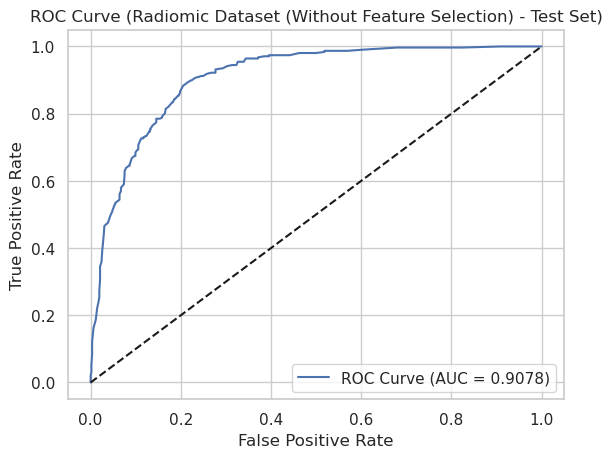

In [20]:
df_combined = pd.read_csv('radiomic_features.csv')
run_random_forest_pipeline(df_combined, dataset_name="Radiomic Dataset (Without Feature Selection)")

#### 5.1.4. Using the radiomic dataset with feature selection <a name="rf_radiomic_feature"></a>
[[go back to the top]](#contents)

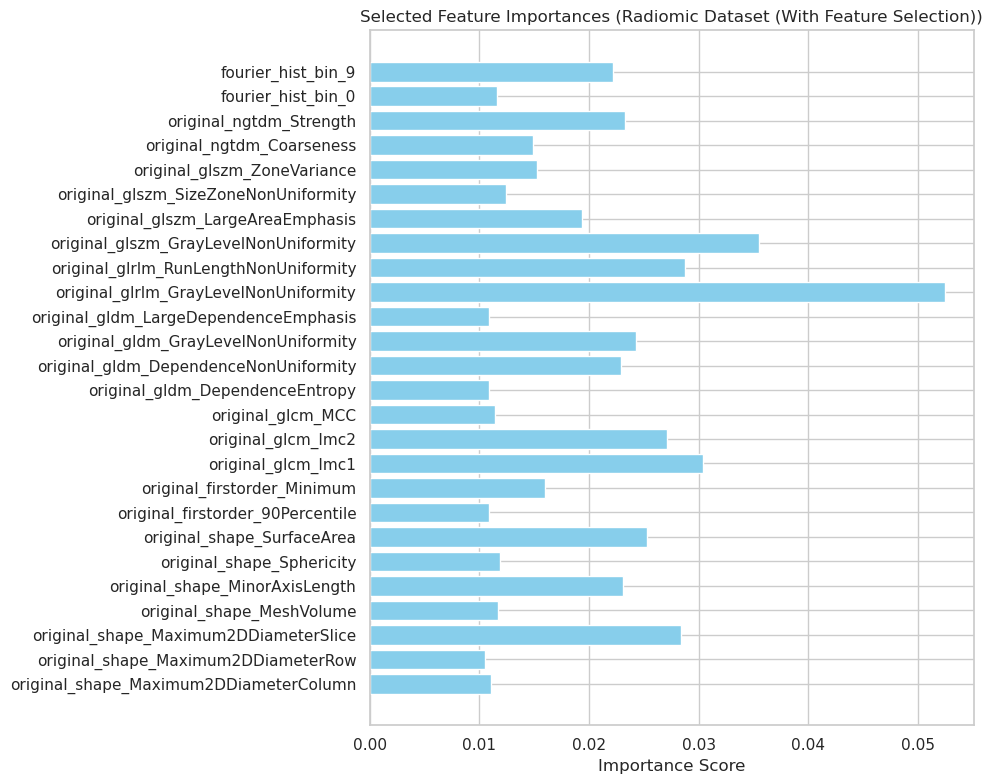

Selected features saved to 'rf_selected_features_Radiomic Dataset (With Feature Selection).csv'
Cross-validation and test results saved to 'Radiomic Dataset (With Feature Selection)_random_forest_results.csv'

Radiomic Dataset (With Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8133 ± 0.0249
F1 Score (10-fold CV): 0.7621 ± 0.0406
Precision (10-fold CV): 0.7742 ± 0.0517
Recall (10-fold CV): 0.7521 ± 0.0472
ROC-AUC (10-fold CV): 0.8859 ± 0.0181

Radiomic Dataset (With Feature Selection) (Test Set Results)
Test Accuracy: 0.8273
Test F1 Score: 0.7432
Test Precision: 0.7281
Test Recall: 0.7590
Test ROC-AUC: 0.9106


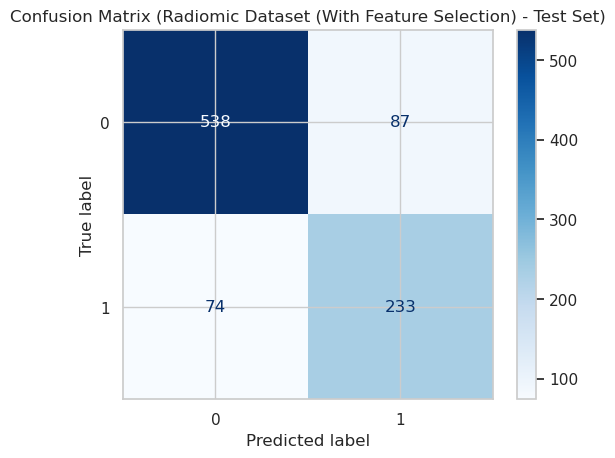

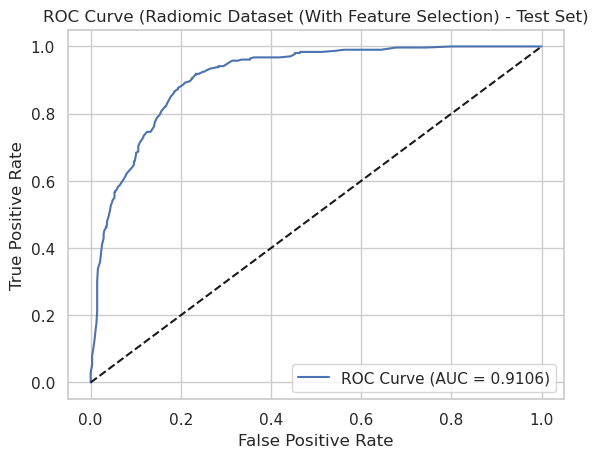

In [21]:
df_combined = pd.read_csv('radiomic_features.csv')
run_random_forest_pipeline(df_combined, dataset_name="Radiomic Dataset (With Feature Selection)", use_feature_selection=True)

#### 5.1.5. Using the pylidc dataset without feature selection <a id="rf_pylidc"></a>
[go back to the top](#contents)

Cross-validation and test results saved to 'Pylidc Dataset (Without Feature Selection)_random_forest_results.csv'

Pylidc Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8708 ± 0.0265
F1 Score (10-fold CV): 0.8341 ± 0.0504
Precision (10-fold CV): 0.8404 ± 0.0488
Recall (10-fold CV): 0.8290 ± 0.0605
ROC-AUC (10-fold CV): 0.9381 ± 0.0202

Pylidc Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8916
Test F1 Score: 0.8424
Test Precision: 0.8084
Test Recall: 0.8795
Test ROC-AUC: 0.9553


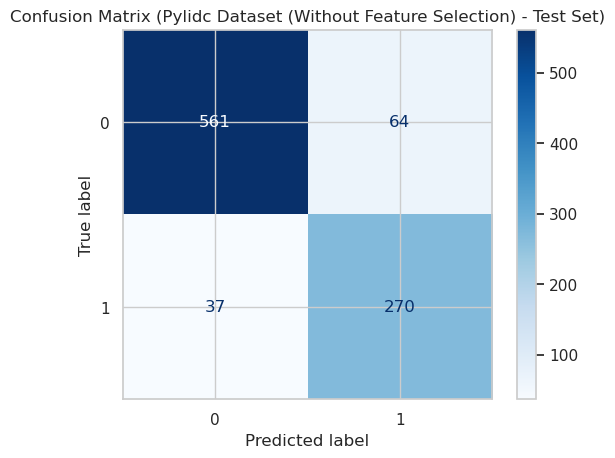

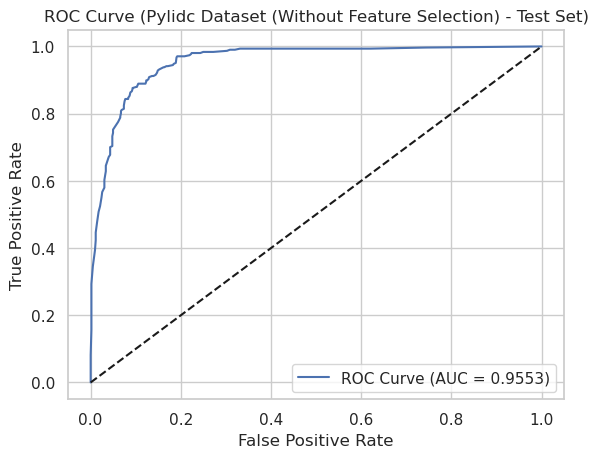

In [22]:
df_combined = pd.read_csv('pylidc_features.csv')
run_random_forest_pipeline(df_combined, dataset_name="Pylidc Dataset (Without Feature Selection)")

### 5.2. Logistic Regression <a name="lr"></a>
[[go back to the top]](#contents)

We then defined a similar function,  **run_logistic_regression_pipeline**. which conducts a **logistic regression** analysis to predict malignancy based on input data. It begins by encoding the target variable and splitting the dataset into training and testing sets, ensuring no overlap in patient IDs to prevent data leakage. Features are normalized using StandardScaler. Optional **feature selection** is performed using **LASSO (L1 regularization)** to identify significant features, which are then saved and visualized. The model is trained using **Group K-Fold cross-validation** to respect group boundaries, and performance metrics like **accuracy, F1 score, precision, recall, and ROC-AUC** are calculated for both cross-validation and test sets. Results are saved to CSV files, and the function generates a **confusion matrix** and **ROC curve** for the test set to visualize model performance.

In [24]:
def run_logistic_regression_pipeline(df, dataset_name, use_feature_selection=False, feature_importance_threshold=0.01): 
    # Classify the malignancy (benign = 0, malignant = 1)
    df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

    # Separate features and target variable
    X = df.drop(['malignancy', 'Patient_ID'], axis=1)
    y = df['malignancy']
    groups = df['Patient_ID']

    # Identify binary columns (these shouldn't be scaled)
    binary_columns = [col for col in X.columns if len(X[col].unique()) == 2]
    non_binary_columns = [col for col in X.columns if col not in binary_columns]

    # Split the dataset using GroupShuffleSplit to ensure patients are not in both train and test sets
    gss = GroupShuffleSplit(test_size=0.2, random_state=42)
    train_idx, test_idx = next(gss.split(X, y, groups))

    # Create train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    train_groups = groups.iloc[train_idx]
    test_groups = groups.iloc[test_idx]

    # Verify that there is no overlap in Patient_IDs
    overlap = set(train_groups).intersection(set(test_groups))
    if overlap:
        print(f"Overlap in groups: {overlap}")
        raise ValueError("Overlap detected in train and test groups!")

    # Scale the continuous features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Apply StandardScaler only to non-binary columns
    X_train_scaled[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])
    X_test_scaled[non_binary_columns] = scaler.transform(X_test[non_binary_columns])

    # If feature selection is enabled, perform it using Logistic Regression (Lasso)
    if use_feature_selection:
        # Train a Logistic Regression model with L1 (Lasso) regularization to perform feature selection
        lasso = LogisticRegression(penalty='l1', solver='liblinear', C=0.2, max_iter=1000)
        lasso.fit(X_train_scaled, y_train)
        
        # Get the coefficients of the Lasso model
        coefficients = lasso.coef_

        # Find the indices of the non-zero coefficients (these are the selected features)
        non_zero_indices = np.where(coefficients != 0)[1]

        # Get the names of the selected features
        selected_feature_names = X_train.columns[non_zero_indices]
        selected_coefficients = coefficients[0, non_zero_indices]

        # Save the selected features and their coefficients to a CSV file
        selected_features_df = pd.DataFrame({
            'Feature': selected_feature_names,
            'Importance': selected_coefficients
        })
        selected_features_filename = f'lasso_selected_features_{dataset_name}.csv'
        selected_features_df.to_csv(selected_features_filename, index=False)
        print(f"Selected features saved to '{selected_features_filename}'")

        # Plot the selected feature coefficients
        plt.figure(figsize=(10, 6))
        plt.barh(selected_feature_names, selected_coefficients, color='lightcoral')
        plt.xlabel('Coefficient Value (Importance)')
        plt.title(f'Selected Features by LASSO ({dataset_name})')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
        plt.tight_layout()
        plt.show()

        # Now filter the scaled train/test sets using selected features
        X_train_scaled = X_train_scaled[selected_feature_names]
        X_test_scaled = X_test_scaled[selected_feature_names]
    else:
        # If no feature selection, ensure all features are used
        selected_feature_names = X_train_scaled.columns

    # Initialize Logistic Regression model
    model = LogisticRegression(solver='liblinear', max_iter=1000)

    # Define the scoring metrics
    scoring = {
        'accuracy': 'accuracy',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'
    }

    # Use GroupKFold to ensure no patient is in both the training and validation sets
    group_kfold = GroupKFold(n_splits=10)
    cv_results = cross_validate(model, X_train_scaled, y_train, groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False)

    # Create DataFrame from cross-validation results
    cv_results_df = pd.DataFrame({
        'fold': range(1, len(cv_results['test_accuracy']) + 1),
        'accuracy': cv_results['test_accuracy'],
        'f1': cv_results['test_f1'],
        'precision': cv_results['test_precision'],
        'recall': cv_results['test_recall'],
        'roc_auc': cv_results['test_roc_auc']
    })

    # Compute mean and std
    mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
    mean_row['fold'] = 'mean'

    std_row = cv_results_df.std(numeric_only=True).to_frame().T
    std_row['fold'] = 'std'

    # Rearrange columns to place 'fold' at the front
    mean_row = mean_row[cv_results_df.columns]
    std_row = std_row[cv_results_df.columns]

    # Append mean and std to the DataFrame
    cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

    # Now, evaluate the model on the test set
    model.fit(X_train_scaled, y_train)  # Train on the full training set
    y_pred_test = model.predict(X_test_scaled)
    y_proba_test = model.predict_proba(X_test_scaled)[:, 1]

    # Test set evaluation
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_roc_auc = roc_auc_score(y_test, y_proba_test)

    # Create DataFrame for test set results
    test_results_df = pd.DataFrame({
        'fold': ['test_set'],
        'accuracy': [test_accuracy],
        'f1': [test_f1],
        'precision': [test_precision],
        'recall': [test_recall],
        'roc_auc': [test_roc_auc]
    })

    # Append test set results to cv_results_df
    cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

    # Save the results to CSV
    cv_results_df.to_csv(f'{dataset_name}_logistic_regression_results.csv', index=False)
    print(f"Cross-validation and test results saved to '{dataset_name}_logistic_regression_results.csv'")

    # Extract mean and std values for printing
    mean_accuracy = mean_row['accuracy'].values[0]
    std_accuracy = std_row['accuracy'].values[0]
    mean_f1 = mean_row['f1'].values[0]
    std_f1 = std_row['f1'].values[0]
    mean_precision = mean_row['precision'].values[0]
    std_precision = std_row['precision'].values[0]
    mean_recall = mean_row['recall'].values[0]
    std_recall = std_row['recall'].values[0]
    mean_roc_auc = mean_row['roc_auc'].values[0]
    std_roc_auc = std_row['roc_auc'].values[0]

    # Print cross-validation mean and std results
    print(f"\n{dataset_name} (Cross-Validation Results)")
    print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
    print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

    # Print test set results
    print(f"\n{dataset_name} (Test Set Results)")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")

    # Plot confusion matrix for test set
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({dataset_name} - Test Set)')
    plt.show()

    # Plot ROC curve for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.figure()
    plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name} - Test Set)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

#### 5.2.1. Using the combined dataset without feature selection <a name="lr_combined"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Combined Dataset (Without Feature Selection)_logistic_regression_results.csv'

Combined Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8624 ± 0.0255
F1 Score (10-fold CV): 0.8249 ± 0.0432
Precision (10-fold CV): 0.8300 ± 0.0483
Recall (10-fold CV): 0.8207 ± 0.0477
ROC-AUC (10-fold CV): 0.9332 ± 0.0212

Combined Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8648
Test F1 Score: 0.8019
Test Precision: 0.7751
Test Recall: 0.8306
Test ROC-AUC: 0.9403


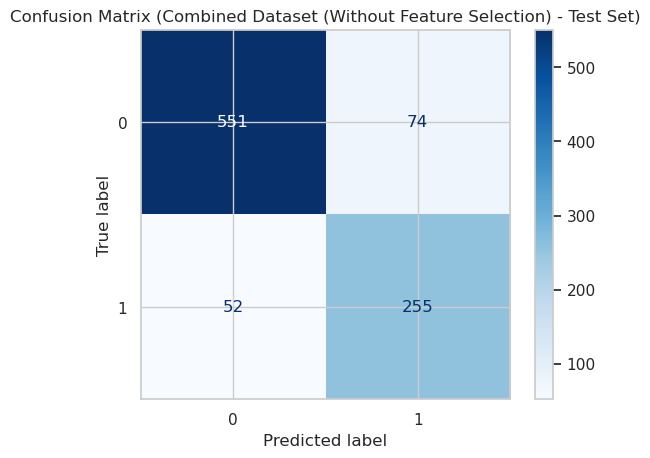

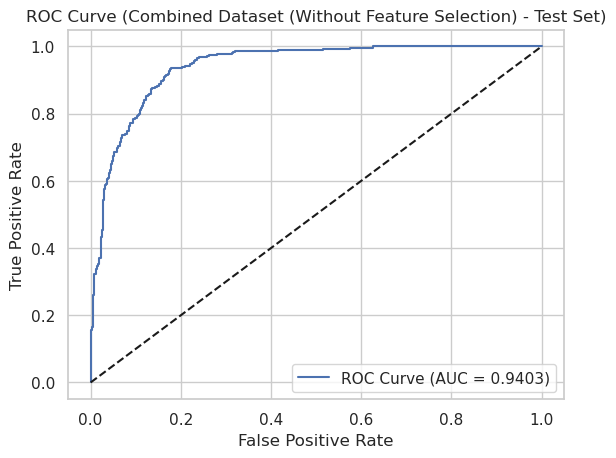

In [25]:
df_combined = pd.read_csv('all_features_cleaned.csv')
run_logistic_regression_pipeline(df_combined, dataset_name="Combined Dataset (Without Feature Selection)")

#### 5.2.2. Using the combined dataset with feature selection <a name="lr_combined_feature"></a>
[[go back to the top]](#contents)

Selected features saved to 'lasso_selected_features_Combined Dataset (With Feature Selection).csv'


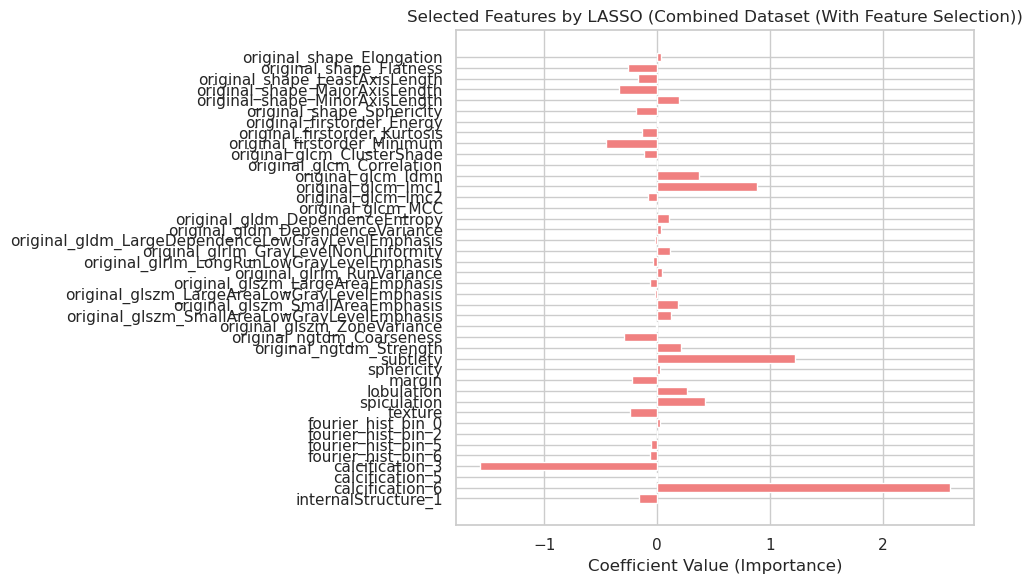

Cross-validation and test results saved to 'Combined Dataset (With Feature Selection)_logistic_regression_results.csv'

Combined Dataset (With Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8678 ± 0.0273
F1 Score (10-fold CV): 0.8326 ± 0.0416
Precision (10-fold CV): 0.8357 ± 0.0491
Recall (10-fold CV): 0.8304 ± 0.0434
ROC-AUC (10-fold CV): 0.9372 ± 0.0218

Combined Dataset (With Feature Selection) (Test Set Results)
Test Accuracy: 0.8659
Test F1 Score: 0.8044
Test Precision: 0.7741
Test Recall: 0.8371
Test ROC-AUC: 0.9411


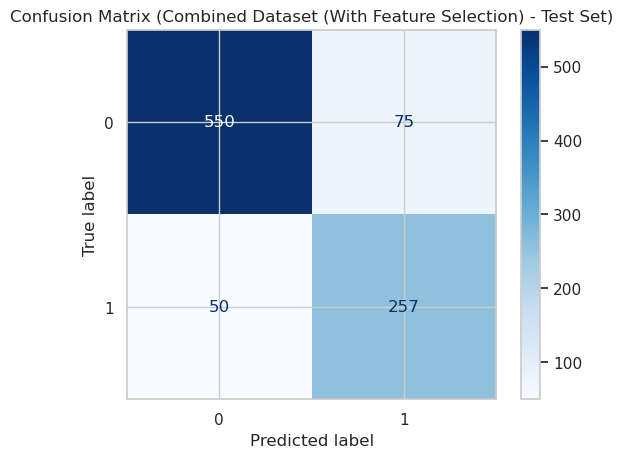

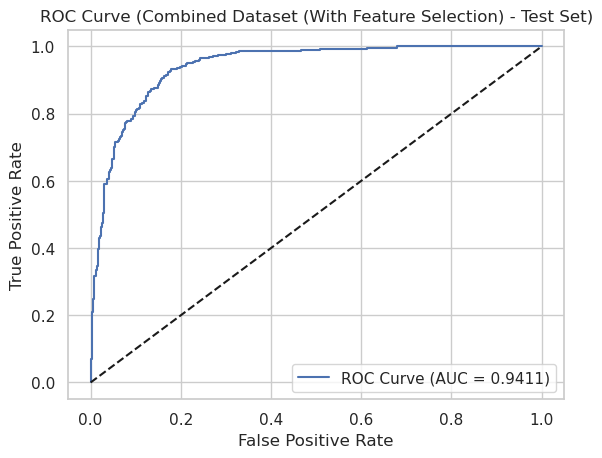

In [26]:
df_combined = pd.read_csv('all_features_cleaned.csv')
run_logistic_regression_pipeline(df_combined, dataset_name="Combined Dataset (With Feature Selection)", use_feature_selection=True)

#### 5.1.3. Using the radiomic dataset without feature selection <a name="lr_radiomic"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Radiomic Dataset (Without Feature Selection)_logistic_regression_results.csv'

Radiomic Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8118 ± 0.0253
F1 Score (10-fold CV): 0.7601 ± 0.0458
Precision (10-fold CV): 0.7699 ± 0.0556
Recall (10-fold CV): 0.7513 ± 0.0446
ROC-AUC (10-fold CV): 0.8867 ± 0.0214

Radiomic Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8176
Test F1 Score: 0.7240
Test Precision: 0.7217
Test Recall: 0.7264
Test ROC-AUC: 0.9030


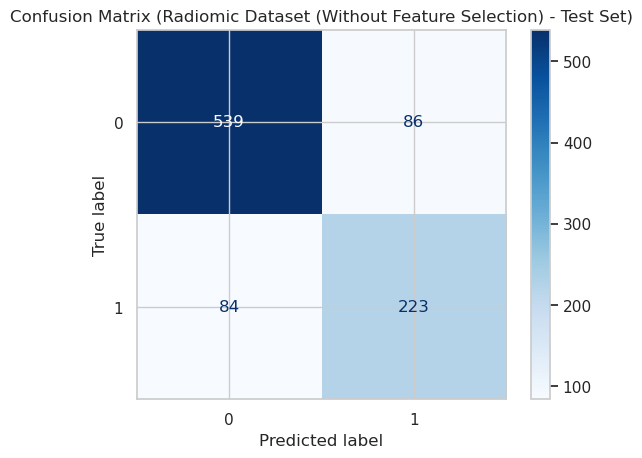

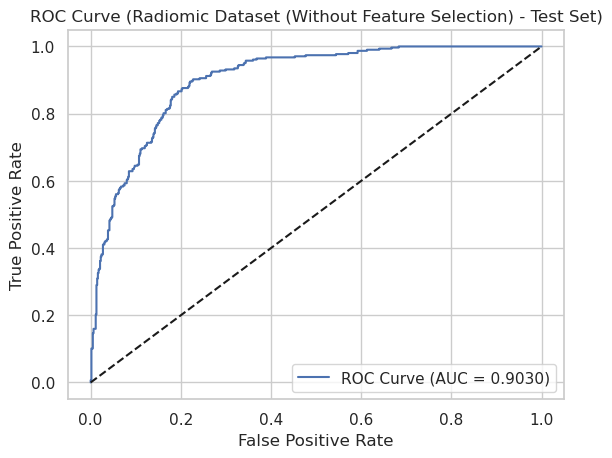

In [27]:
df_combined = pd.read_csv('radiomic_features.csv')
run_logistic_regression_pipeline(df_combined, dataset_name="Radiomic Dataset (Without Feature Selection)")

#### 5.1.4. Using the radiomic dataset with feature selection <a id="lr_radiomic_feature"></a>
[go back to the top](#contents)

Selected features saved to 'lasso_selected_features_Radiomic Dataset (With Feature Selection).csv'


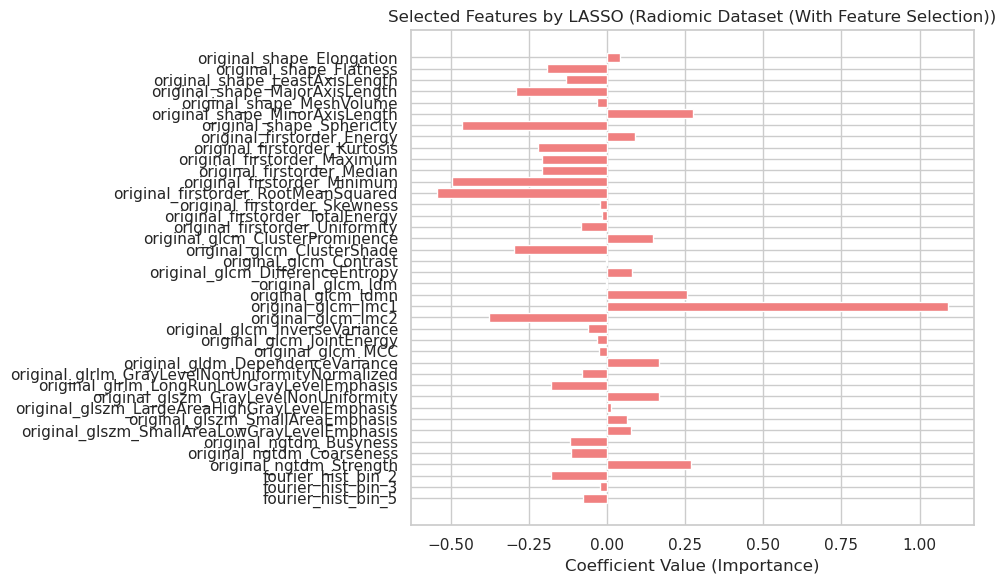

Cross-validation and test results saved to 'Radiomic Dataset (With Feature Selection)_logistic_regression_results.csv'

Radiomic Dataset (With Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8148 ± 0.0180
F1 Score (10-fold CV): 0.7624 ± 0.0370
Precision (10-fold CV): 0.7773 ± 0.0470
Recall (10-fold CV): 0.7491 ± 0.0396
ROC-AUC (10-fold CV): 0.8904 ± 0.0218

Radiomic Dataset (With Feature Selection) (Test Set Results)
Test Accuracy: 0.8197
Test F1 Score: 0.7325
Test Precision: 0.7165
Test Recall: 0.7492
Test ROC-AUC: 0.9011


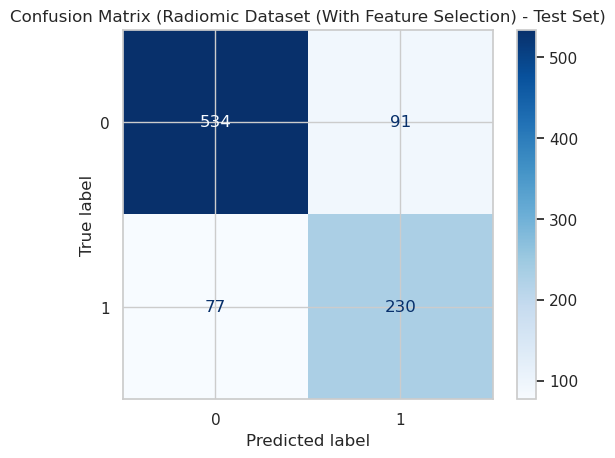

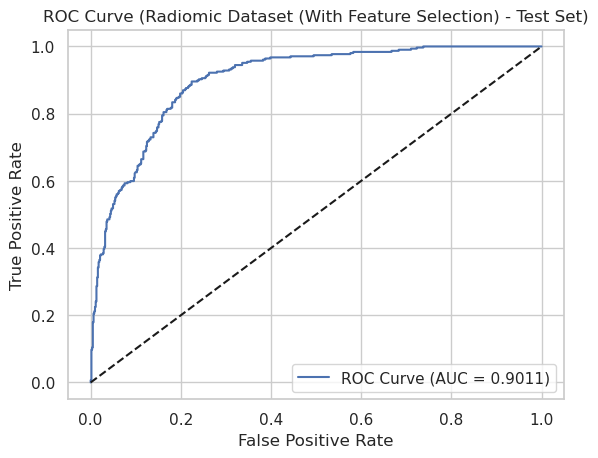

In [28]:
df_combined = pd.read_csv('radiomic_features.csv')
run_logistic_regression_pipeline(df_combined, dataset_name="Radiomic Dataset (With Feature Selection)", use_feature_selection=True)

#### 5.1.5. Using the pylidc dataset without feature selection <a name="lr_pylidc"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Pylidc Dataset (Without Feature Selection)_logistic_regression_results.csv'

Pylidc Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8416 ± 0.0305
F1 Score (10-fold CV): 0.7959 ± 0.0495
Precision (10-fold CV): 0.8133 ± 0.0508
Recall (10-fold CV): 0.7804 ± 0.0583
ROC-AUC (10-fold CV): 0.9257 ± 0.0234

Pylidc Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8594
Test F1 Score: 0.7943
Test Precision: 0.7667
Test Recall: 0.8241
Test ROC-AUC: 0.9347


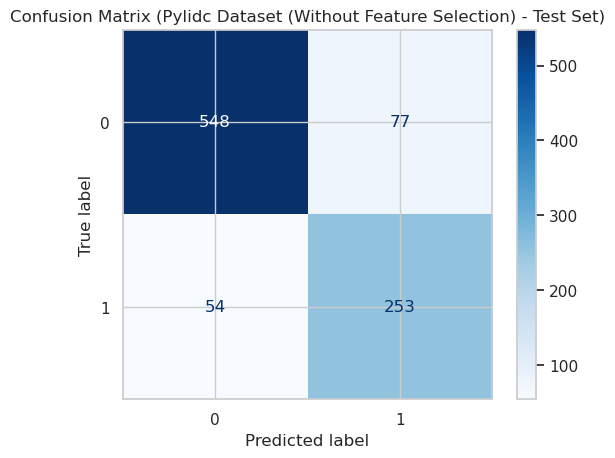

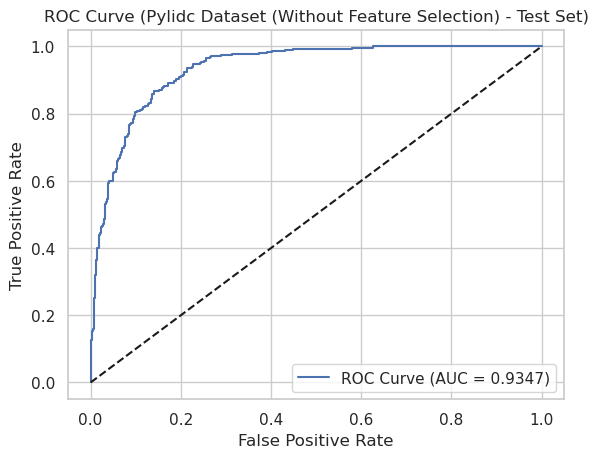

In [29]:
df_combined = pd.read_csv('pylidc_features.csv')
run_logistic_regression_pipeline(df_combined, dataset_name="Pylidc Dataset (Without Feature Selection)")

### 5.3. Support Vector Machines <a name="svm"></a>
[[go back to the top]](#contents)

Then we defined a function **run_svm_pipeline**, which performs classification using a **Support Vector Machine (SVM)** to predict malignancy based on the provided dataset. It begins by encoding the target variable and splitting the data into training and testing sets, ensuring no patient ID overlaps to prevent data leakage. Features are normalized using **StandardScaler**. The SVM model with a linear kernel is trained using **Group K-Fold cross-validation** to respect group boundaries, and performance metrics like **accuracy, F1 score, precision, recall, and ROC-AUC** are calculated. The model is then evaluated on the test set, with results saved to CSV files. Finally, the function generates and displays a **confusion matrix** and **ROC curve** for the test set to visualize model performance.

In [30]:
def run_svm_pipeline(df, dataset_name): 
    # Classify the malignancy (benign = 0, malignant = 1)
    df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

    # Separate features and target variable
    X = df.drop(['malignancy', 'Patient_ID'], axis=1)
    y = df['malignancy']
    groups = df['Patient_ID']

    # Identify binary columns (these shouldn't be scaled)
    binary_columns = [col for col in X.columns if len(X[col].unique()) == 2]
    non_binary_columns = [col for col in X.columns if col not in binary_columns]

    # Split the dataset using GroupShuffleSplit to ensure patients are not in both train and test sets
    gss = GroupShuffleSplit(test_size=0.2, random_state=42)
    train_idx, test_idx = next(gss.split(X, y, groups))

    # Create train and test sets
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    train_groups = groups.iloc[train_idx]
    test_groups = groups.iloc[test_idx]

    # Verify that there is no overlap in Patient_IDs
    overlap = set(train_groups).intersection(set(test_groups))
    if overlap:
        print(f"Overlap in groups: {overlap}")
        raise ValueError("Overlap detected in train and test groups!")

    # Scale the continuous features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Apply StandardScaler only to non-binary columns
    X_train_scaled[non_binary_columns] = scaler.fit_transform(X_train[non_binary_columns])
    X_test_scaled[non_binary_columns] = scaler.transform(X_test[non_binary_columns])

    # Initialize SVM model
    svm_model = SVC(kernel='linear', probability=True, random_state=42)

    # Define the scoring metrics, including ROC-AUC
    scoring = {
        'accuracy': 'accuracy',
        'f1': 'f1',
        'precision': 'precision',
        'recall': 'recall',
        'roc_auc': 'roc_auc'
    }

    # Use GroupKFold to ensure no patient is in both the training and validation sets
    group_kfold = GroupKFold(n_splits=10)
    cv_results = cross_validate(svm_model, X_train_scaled, y_train, groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False)

    # Create DataFrame from cross-validation results
    cv_results_df = pd.DataFrame({
        'fold': range(1, len(cv_results['test_accuracy']) + 1),
        'accuracy': cv_results['test_accuracy'],
        'f1': cv_results['test_f1'],
        'precision': cv_results['test_precision'],
        'recall': cv_results['test_recall'],
        'roc_auc': cv_results['test_roc_auc']
    })

    # Compute mean and std
    mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
    mean_row['fold'] = 'mean'

    std_row = cv_results_df.std(numeric_only=True).to_frame().T
    std_row['fold'] = 'std'

    # Rearrange columns to place 'fold' at the front
    mean_row = mean_row[cv_results_df.columns]
    std_row = std_row[cv_results_df.columns]

    # Append mean and std to the DataFrame
    cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

    # Now, evaluate the model on the test set
    svm_model.fit(X_train_scaled, y_train)
    y_pred_test = svm_model.predict(X_test_scaled)
    y_proba_test = svm_model.predict_proba(X_test_scaled)[:, 1]

    # Test set evaluation
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_roc_auc = roc_auc_score(y_test, y_proba_test)

    # Create DataFrame for test set results
    test_results_df = pd.DataFrame({
        'fold': ['test_set'],
        'accuracy': [test_accuracy],
        'f1': [test_f1],
        'precision': [test_precision],
        'recall': [test_recall],
        'roc_auc': [test_roc_auc]
    })

    # Append test set results to cv_results_df
    cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

    # Save the results to CSV
    cv_results_df.to_csv(f'{dataset_name}_svm_results.csv', index=False)
    print(f"Cross-validation and test results saved to '{dataset_name}_svm_results.csv'")

    # Extract mean and std values for printing
    mean_accuracy = mean_row['accuracy'].values[0]
    std_accuracy = std_row['accuracy'].values[0]
    mean_f1 = mean_row['f1'].values[0]
    std_f1 = std_row['f1'].values[0]
    mean_precision = mean_row['precision'].values[0]
    std_precision = std_row['precision'].values[0]
    mean_recall = mean_row['recall'].values[0]
    std_recall = std_row['recall'].values[0]
    mean_roc_auc = mean_row['roc_auc'].values[0]
    std_roc_auc = std_row['roc_auc'].values[0]

    # Print cross-validation mean and std results
    print(f"\n{dataset_name} (Cross-Validation Results)")
    print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
    print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
    print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
    print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
    print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

    # Print test set results
    print(f"\n{dataset_name} (Test Set Results)")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test Recall: {test_recall:.4f}")
    print(f"Test ROC-AUC: {test_roc_auc:.4f}")

    # Plot confusion matrix for test set
    cm_test = confusion_matrix(y_test, y_pred_test)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Blues')
    plt.title(f'Confusion Matrix ({dataset_name} - Test Set)')
    plt.show()

    # Plot ROC curve for test set
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    roc_auc_test = auc(fpr_test, tpr_test)
    plt.figure()
    plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({dataset_name} - Test Set)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

#### 5.3.1. Using the combined dataset without feature selection <a name="svm_combined"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Combined Dataset (Without Feature Selection)_svm_results.csv'

Combined Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8642 ± 0.0262
F1 Score (10-fold CV): 0.8296 ± 0.0398
Precision (10-fold CV): 0.8256 ± 0.0475
Recall (10-fold CV): 0.8345 ± 0.0413
ROC-AUC (10-fold CV): 0.9329 ± 0.0208

Combined Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8659
Test F1 Score: 0.8050
Test Precision: 0.7725
Test Recall: 0.8404
Test ROC-AUC: 0.9394


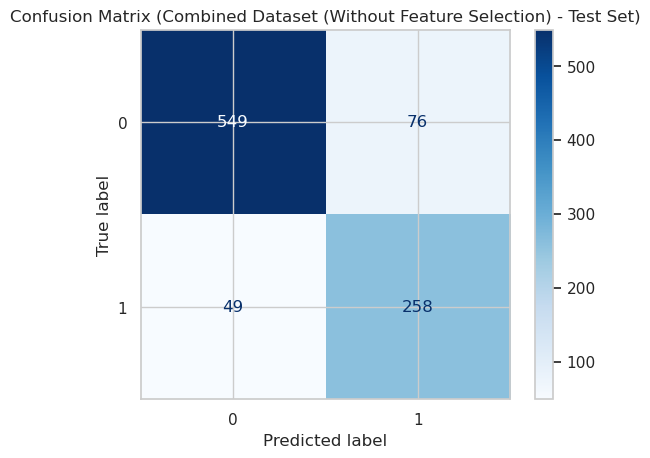

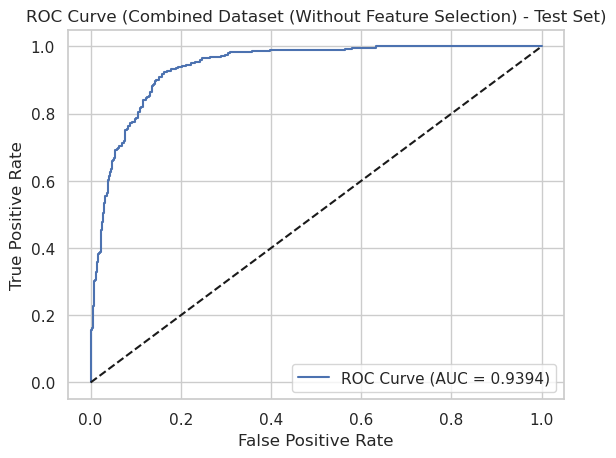

In [31]:
df_combined = pd.read_csv('all_features_cleaned.csv')
run_svm_pipeline(df_combined, dataset_name="Combined Dataset (Without Feature Selection)")

#### 5.3.2. Using the radiomic dataset without feature selection <a id="svm_radiomic"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Radiomic Dataset (Without Feature Selection)_svm_results.csv'

Radiomic Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8070 ± 0.0278
F1 Score (10-fold CV): 0.7542 ± 0.0506
Precision (10-fold CV): 0.7619 ± 0.0564
Recall (10-fold CV): 0.7481 ± 0.0560
ROC-AUC (10-fold CV): 0.8812 ± 0.0209

Radiomic Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8165
Test F1 Score: 0.7237
Test Precision: 0.7179
Test Recall: 0.7296
Test ROC-AUC: 0.9029


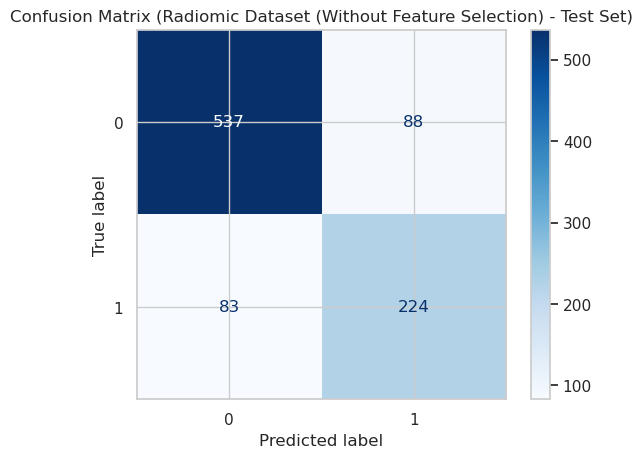

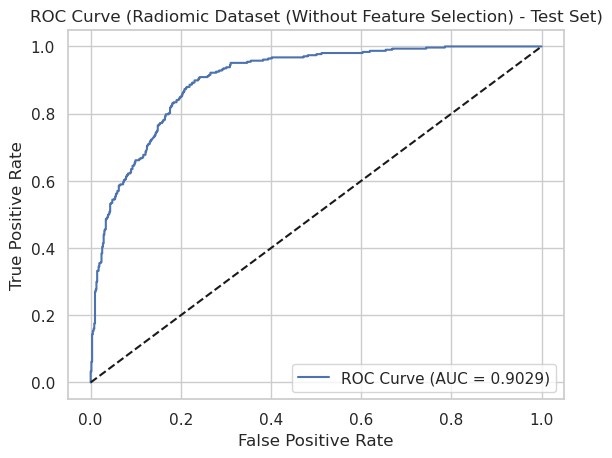

In [32]:
df_combined = pd.read_csv('radiomic_features.csv')
run_svm_pipeline(df_combined, dataset_name="Radiomic Dataset (Without Feature Selection)")

#### 5.3.3. Using the pylidc dataset without feature selection <a name="svm_pylidc"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Pylidc Dataset (Without Feature Selection)_svm_results.csv'

Pylidc Dataset (Without Feature Selection) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8467 ± 0.0315
F1 Score (10-fold CV): 0.8057 ± 0.0489
Precision (10-fold CV): 0.8111 ± 0.0455
Recall (10-fold CV): 0.8011 ± 0.0584
ROC-AUC (10-fold CV): 0.9255 ± 0.0232

Pylidc Dataset (Without Feature Selection) (Test Set Results)
Test Accuracy: 0.8584
Test F1 Score: 0.7944
Test Precision: 0.7612
Test Recall: 0.8306
Test ROC-AUC: 0.9349


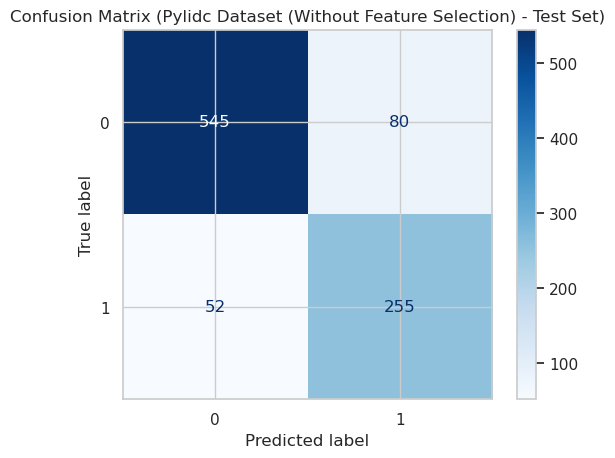

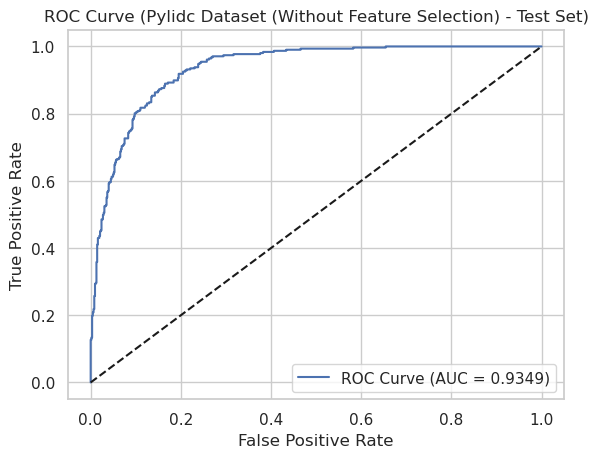

In [33]:
df_combined = pd.read_csv('pylidc_features.csv')
run_svm_pipeline(df_combined, dataset_name="Pylidc Dataset (Without Feature Selection)")

#### 5.3.4. Using the combined dataset with feature selection (Random Forest) <a name="svm_combined_feature_rf"></a>
[[go back to the top]](#contents)

We then repeated the same process for the combined and radiomic datasets, using the features selected in previous runs by Random Forest and Lasso.

Cross-validation and test results saved to 'Combined Dataset (With Feature Selection by Random Forest)_svm_results.csv'

Combined Dataset (With Feature Selection by Random Forest) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8669 ± 0.0251
F1 Score (10-fold CV): 0.8296 ± 0.0385
Precision (10-fold CV): 0.8430 ± 0.0395
Recall (10-fold CV): 0.8172 ± 0.0449
ROC-AUC (10-fold CV): 0.9324 ± 0.0251

Combined Dataset (With Feature Selection by Random Forest) (Test Set Results)
Test Accuracy: 0.8734
Test F1 Score: 0.8109
Test Precision: 0.7981
Test Recall: 0.8241
Test ROC-AUC: 0.9434


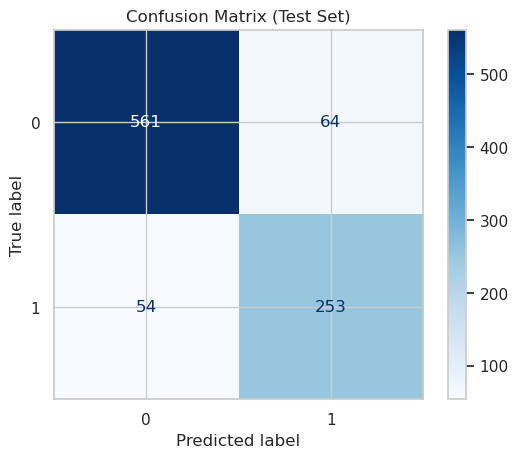

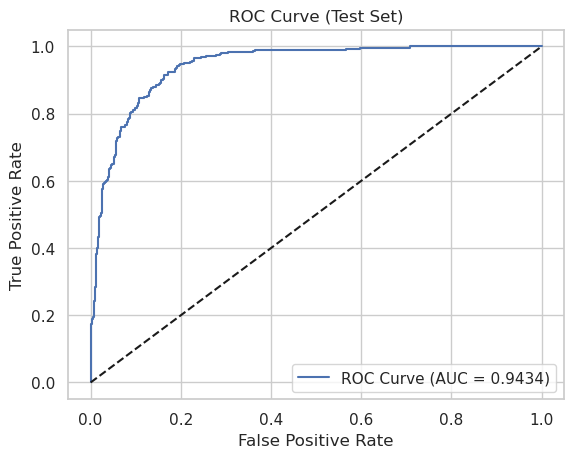

In [34]:
dataset_name = "Combined Dataset (With Feature Selection by Random Forest)"

# Load the dataset
df = pd.read_csv('all_features_cleaned.csv')

# Load the selected features from Random Forest
selected_features = pd.read_csv('rf_selected_features_Combined Dataset (With Feature Selection).csv')['Feature'].tolist()

# Classify the malignancy (benign = 0, malignant = 1)
df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

# Separate the features and target variable
X = df[selected_features]
y = df['malignancy']
groups = df['Patient_ID']

# Split the dataset using GroupShuffleSplit to ensure no patient is in both train and test sets
gss = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

# Create train and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_groups = groups.iloc[train_idx]
test_groups = groups.iloc[test_idx]

# Verify that there is no overlap in Patient_IDs
overlap = set(train_groups).intersection(set(test_groups))
if overlap:
    print(f"Overlap in groups: {overlap}")
    raise ValueError("Overlap detected in train and test groups!")

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Initialize SVM model with probability=True for ROC curve
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Define scoring metrics, including ROC-AUC
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# Use GroupKFold to ensure no patient is in both the training and validation sets
group_kfold = GroupKFold(n_splits=10)
cv_results = cross_validate(
    svm_model, X_train_scaled, y_train,
    groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False
)

# Create DataFrame from cross-validation results
cv_results_df = pd.DataFrame({
    'fold': range(1, len(cv_results['test_accuracy']) + 1),
    'accuracy': cv_results['test_accuracy'],
    'f1': cv_results['test_f1'],
    'precision': cv_results['test_precision'],
    'recall': cv_results['test_recall'],
    'roc_auc': cv_results['test_roc_auc']
})

# Compute mean and std
mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
mean_row['fold'] = 'mean'

std_row = cv_results_df.std(numeric_only=True).to_frame().T
std_row['fold'] = 'std'

# Rearrange columns to place 'fold' at the front
mean_row = mean_row[cv_results_df.columns]
std_row = std_row[cv_results_df.columns]

# Append mean and std to the DataFrame
cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

# Now, evaluate the model on the test set
svm_model.fit(X_train_scaled, y_train)

y_pred_test = svm_model.predict(X_test_scaled)
y_proba_test = svm_model.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

# Create DataFrame for test set results
test_results_df = pd.DataFrame({
    'fold': ['test_set'],
    'accuracy': [test_accuracy],
    'f1': [test_f1],
    'precision': [test_precision],
    'recall': [test_recall],
    'roc_auc': [test_roc_auc]
})

# Append test set results to cv_results_df
cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

# Save the results to CSV
results_filename = f'{dataset_name}_svm_results.csv'
cv_results_df.to_csv(results_filename, index=False)
print(f"Cross-validation and test results saved to '{results_filename}'")

# Extract mean and std values for printing
mean_accuracy = mean_row['accuracy'].values[0]
std_accuracy = std_row['accuracy'].values[0]
mean_f1 = mean_row['f1'].values[0]
std_f1 = std_row['f1'].values[0]
mean_precision = mean_row['precision'].values[0]
std_precision = std_row['precision'].values[0]
mean_recall = mean_row['recall'].values[0]
std_recall = std_row['recall'].values[0]
mean_roc_auc = mean_row['roc_auc'].values[0]
std_roc_auc = std_row['roc_auc'].values[0]

# Print cross-validation mean and std results
print(f"\n{dataset_name} (Cross-Validation Results)")
print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

# Print test set results
print(f"\n{dataset_name} (Test Set Results)")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### 5.1.5. Using the combined dataset with feature selection (Lasso) <a id="svm_combined_feature_lasso"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Combined Dataset (With Feature Selection by Lasso)_svm_results.csv'

Combined Dataset (With Feature Selection by Lasso) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8672 ± 0.0256
F1 Score (10-fold CV): 0.8318 ± 0.0432
Precision (10-fold CV): 0.8311 ± 0.0488
Recall (10-fold CV): 0.8332 ± 0.0462
ROC-AUC (10-fold CV): 0.9361 ± 0.0233

Combined Dataset (With Feature Selection by Lasso) (Test Set Results)
Test Accuracy: 0.8648
Test F1 Score: 0.8043
Test Precision: 0.7685
Test Recall: 0.8436
Test ROC-AUC: 0.9400


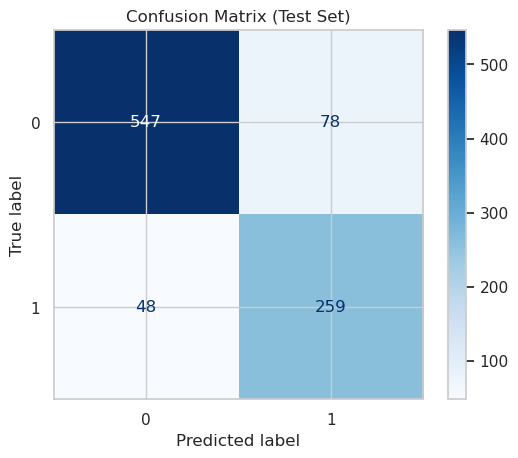

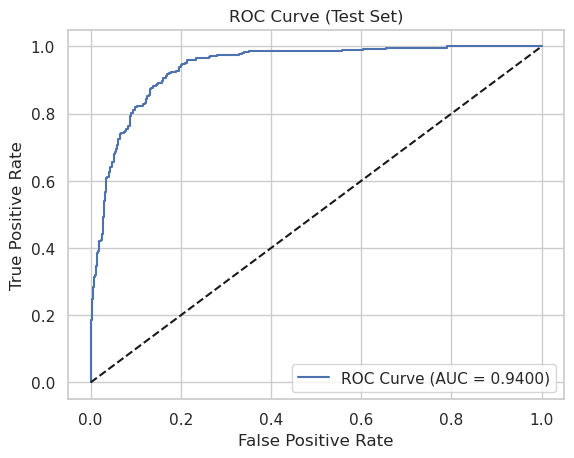

In [35]:
dataset_name = "Combined Dataset (With Feature Selection by Lasso)"

# Load the dataset
df = pd.read_csv('all_features_cleaned.csv')

# Load the selected features from Lasso
selected_features = pd.read_csv('lasso_selected_features_Combined Dataset (With Feature Selection).csv')['Feature'].tolist()

# Classify the malignancy (benign = 0, malignant = 1)
df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

# Separate the features and target variable
X = df[selected_features]
y = df['malignancy']
groups = df['Patient_ID']

# Split the dataset using GroupShuffleSplit to ensure no patient is in both train and test sets
gss = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

# Create train and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_groups = groups.iloc[train_idx]
test_groups = groups.iloc[test_idx]

# Verify that there is no overlap in Patient_IDs
overlap = set(train_groups).intersection(set(test_groups))
if overlap:
    print(f"Overlap in groups: {overlap}")
    raise ValueError("Overlap detected in train and test groups!")

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Initialize SVM model with probability=True for ROC curve
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Define scoring metrics, including ROC-AUC
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# Use GroupKFold to ensure no patient is in both the training and validation sets
group_kfold = GroupKFold(n_splits=10)
cv_results = cross_validate(
    svm_model, X_train_scaled, y_train,
    groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False
)

# Create DataFrame from cross-validation results
cv_results_df = pd.DataFrame({
    'fold': range(1, len(cv_results['test_accuracy']) + 1),
    'accuracy': cv_results['test_accuracy'],
    'f1': cv_results['test_f1'],
    'precision': cv_results['test_precision'],
    'recall': cv_results['test_recall'],
    'roc_auc': cv_results['test_roc_auc']
})

# Compute mean and std
mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
mean_row['fold'] = 'mean'

std_row = cv_results_df.std(numeric_only=True).to_frame().T
std_row['fold'] = 'std'

# Rearrange columns to place 'fold' at the front
mean_row = mean_row[cv_results_df.columns]
std_row = std_row[cv_results_df.columns]

# Append mean and std to the DataFrame
cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

# Now, evaluate the model on the test set
svm_model.fit(X_train_scaled, y_train)

y_pred_test = svm_model.predict(X_test_scaled)
y_proba_test = svm_model.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

# Create DataFrame for test set results
test_results_df = pd.DataFrame({
    'fold': ['test_set'],
    'accuracy': [test_accuracy],
    'f1': [test_f1],
    'precision': [test_precision],
    'recall': [test_recall],
    'roc_auc': [test_roc_auc]
})

# Append test set results to cv_results_df
cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

# Save the results to CSV
results_filename = f'{dataset_name}_svm_results.csv'
cv_results_df.to_csv(results_filename, index=False)
print(f"Cross-validation and test results saved to '{results_filename}'")

# Extract mean and std values for printing
mean_accuracy = mean_row['accuracy'].values[0]
std_accuracy = std_row['accuracy'].values[0]
mean_f1 = mean_row['f1'].values[0]
std_f1 = std_row['f1'].values[0]
mean_precision = mean_row['precision'].values[0]
std_precision = std_row['precision'].values[0]
mean_recall = mean_row['recall'].values[0]
std_recall = std_row['recall'].values[0]
mean_roc_auc = mean_row['roc_auc'].values[0]
std_roc_auc = std_row['roc_auc'].values[0]

# Print cross-validation mean and std results
print(f"\n{dataset_name} (Cross-Validation Results)")
print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

# Print test set results
print(f"\n{dataset_name} (Test Set Results)")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 5.1.6. Using the radiomic dataset with feature selection (Random Forest) <a name="svm_radiomic_feature_rf"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Radiomic Dataset (With Feature Selection by Random Forest)_svm_results.csv'

Radiomic Dataset (With Feature Selection by Random Forest) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8088 ± 0.0243
F1 Score (10-fold CV): 0.7578 ± 0.0384
Precision (10-fold CV): 0.7652 ± 0.0500
Recall (10-fold CV): 0.7523 ± 0.0442
ROC-AUC (10-fold CV): 0.8782 ± 0.0246

Radiomic Dataset (With Feature Selection by Random Forest) (Test Set Results)
Test Accuracy: 0.8069
Test F1 Score: 0.7134
Test Precision: 0.6978
Test Recall: 0.7296
Test ROC-AUC: 0.8975


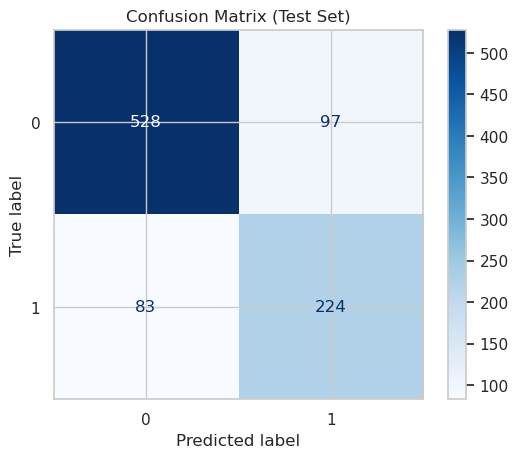

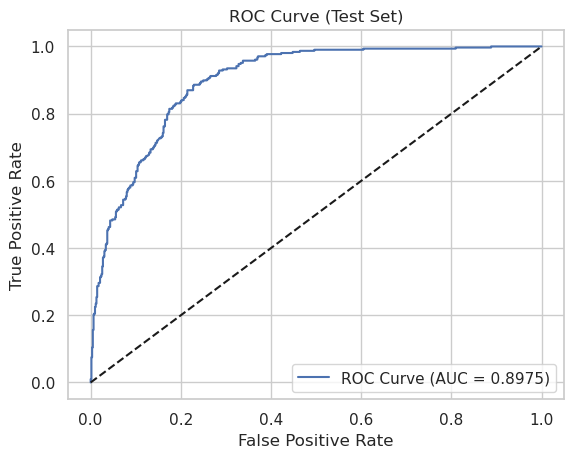

In [36]:
dataset_name = "Radiomic Dataset (With Feature Selection by Random Forest)"

# Load the dataset
df = pd.read_csv('radiomic_features.csv')

# Load the selected features from Random Forest
selected_features = pd.read_csv('rf_selected_features_Radiomic Dataset (With Feature Selection).csv')['Feature'].tolist()

# Classify the malignancy (benign = 0, malignant = 1)
df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

# Separate the features and target variable
X = df[selected_features]
y = df['malignancy']
groups = df['Patient_ID']

# Split the dataset using GroupShuffleSplit to ensure no patient is in both train and test sets
gss = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

# Create train and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_groups = groups.iloc[train_idx]
test_groups = groups.iloc[test_idx]

# Verify that there is no overlap in Patient_IDs
overlap = set(train_groups).intersection(set(test_groups))
if overlap:
    print(f"Overlap in groups: {overlap}")
    raise ValueError("Overlap detected in train and test groups!")

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Initialize SVM model with probability=True for ROC curve
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Define scoring metrics, including ROC-AUC
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# Use GroupKFold to ensure no patient is in both the training and validation sets
group_kfold = GroupKFold(n_splits=10)
cv_results = cross_validate(
    svm_model, X_train_scaled, y_train,
    groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False
)

# Create DataFrame from cross-validation results
cv_results_df = pd.DataFrame({
    'fold': range(1, len(cv_results['test_accuracy']) + 1),
    'accuracy': cv_results['test_accuracy'],
    'f1': cv_results['test_f1'],
    'precision': cv_results['test_precision'],
    'recall': cv_results['test_recall'],
    'roc_auc': cv_results['test_roc_auc']
})

# Compute mean and std
mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
mean_row['fold'] = 'mean'

std_row = cv_results_df.std(numeric_only=True).to_frame().T
std_row['fold'] = 'std'

# Rearrange columns to place 'fold' at the front
mean_row = mean_row[cv_results_df.columns]
std_row = std_row[cv_results_df.columns]

# Append mean and std to the DataFrame
cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

# Now, evaluate the model on the test set
svm_model.fit(X_train_scaled, y_train)

y_pred_test = svm_model.predict(X_test_scaled)
y_proba_test = svm_model.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

# Create DataFrame for test set results
test_results_df = pd.DataFrame({
    'fold': ['test_set'],
    'accuracy': [test_accuracy],
    'f1': [test_f1],
    'precision': [test_precision],
    'recall': [test_recall],
    'roc_auc': [test_roc_auc]
})

# Append test set results to cv_results_df
cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

# Save the results to CSV
results_filename = f'{dataset_name}_svm_results.csv'
cv_results_df.to_csv(results_filename, index=False)
print(f"Cross-validation and test results saved to '{results_filename}'")

# Extract mean and std values for printing
mean_accuracy = mean_row['accuracy'].values[0]
std_accuracy = std_row['accuracy'].values[0]
mean_f1 = mean_row['f1'].values[0]
std_f1 = std_row['f1'].values[0]
mean_precision = mean_row['precision'].values[0]
std_precision = std_row['precision'].values[0]
mean_recall = mean_row['recall'].values[0]
std_recall = std_row['recall'].values[0]
mean_roc_auc = mean_row['roc_auc'].values[0]
std_roc_auc = std_row['roc_auc'].values[0]

# Print cross-validation mean and std results
print(f"\n{dataset_name} (Cross-Validation Results)")
print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

# Print test set results
print(f"\n{dataset_name} (Test Set Results)")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 5.3.7. Using the radiomic dataset with feature selection (Lasso) <a name="svm_radiomic_feature_lasso"></a>
[[go back to the top]](#contents)

Cross-validation and test results saved to 'Radiomic Dataset (With Feature Selection by Lasso)_svm_results.csv'

Radiomic Dataset (With Feature Selection by Lasso) (Cross-Validation Results)
Accuracy (10-fold CV): 0.8151 ± 0.0214
F1 Score (10-fold CV): 0.7646 ± 0.0438
Precision (10-fold CV): 0.7715 ± 0.0466
Recall (10-fold CV): 0.7588 ± 0.0509
ROC-AUC (10-fold CV): 0.8876 ± 0.0226

Radiomic Dataset (With Feature Selection by Lasso) (Test Set Results)
Test Accuracy: 0.8187
Test F1 Score: 0.7305
Test Precision: 0.7156
Test Recall: 0.7459
Test ROC-AUC: 0.9045


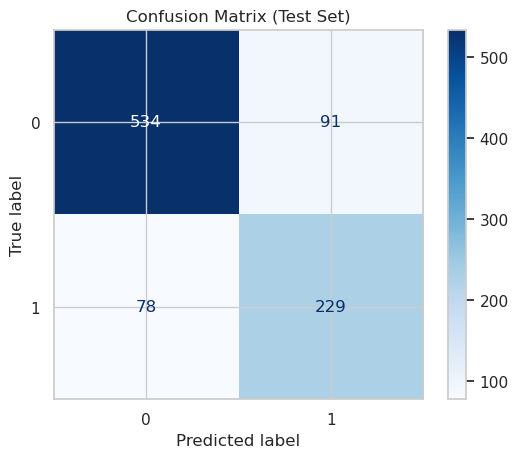

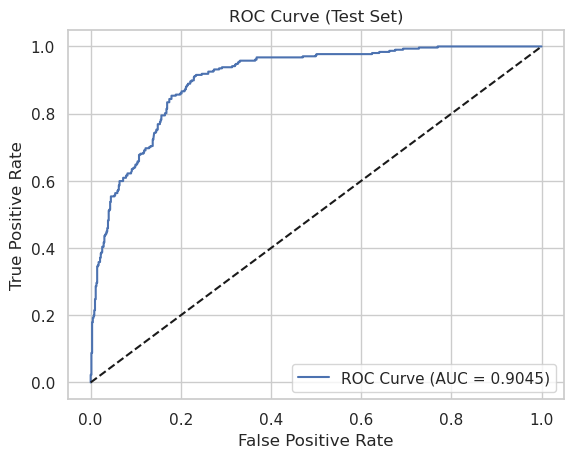

In [37]:
dataset_name = "Radiomic Dataset (With Feature Selection by Lasso)"

# Load the dataset
df = pd.read_csv('radiomic_features.csv')

# Load the selected features from Random Forest
selected_features = pd.read_csv('lasso_selected_features_Radiomic Dataset (With Feature Selection).csv')['Feature'].tolist()

# Classify the malignancy (benign = 0, malignant = 1)
df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

# Separate the features and target variable
X = df[selected_features]
y = df['malignancy']
groups = df['Patient_ID']

# Split the dataset using GroupShuffleSplit to ensure no patient is in both train and test sets
gss = GroupShuffleSplit(test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

# Create train and test sets
X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
train_groups = groups.iloc[train_idx]
test_groups = groups.iloc[test_idx]

# Verify that there is no overlap in Patient_IDs
overlap = set(train_groups).intersection(set(test_groups))
if overlap:
    print(f"Overlap in groups: {overlap}")
    raise ValueError("Overlap detected in train and test groups!")

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with feature names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)

# Initialize SVM model with probability=True for ROC curve
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Define scoring metrics, including ROC-AUC
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# Use GroupKFold to ensure no patient is in both the training and validation sets
group_kfold = GroupKFold(n_splits=10)
cv_results = cross_validate(
    svm_model, X_train_scaled, y_train,
    groups=train_groups, cv=group_kfold, scoring=scoring, return_train_score=False
)

# Create DataFrame from cross-validation results
cv_results_df = pd.DataFrame({
    'fold': range(1, len(cv_results['test_accuracy']) + 1),
    'accuracy': cv_results['test_accuracy'],
    'f1': cv_results['test_f1'],
    'precision': cv_results['test_precision'],
    'recall': cv_results['test_recall'],
    'roc_auc': cv_results['test_roc_auc']
})

# Compute mean and std
mean_row = cv_results_df.mean(numeric_only=True).to_frame().T
mean_row['fold'] = 'mean'

std_row = cv_results_df.std(numeric_only=True).to_frame().T
std_row['fold'] = 'std'

# Rearrange columns to place 'fold' at the front
mean_row = mean_row[cv_results_df.columns]
std_row = std_row[cv_results_df.columns]

# Append mean and std to the DataFrame
cv_results_df = pd.concat([cv_results_df, mean_row, std_row], ignore_index=True)

# Now, evaluate the model on the test set
svm_model.fit(X_train_scaled, y_train)

y_pred_test = svm_model.predict(X_test_scaled)
y_proba_test = svm_model.predict_proba(X_test_scaled)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_roc_auc = roc_auc_score(y_test, y_proba_test)

# Create DataFrame for test set results
test_results_df = pd.DataFrame({
    'fold': ['test_set'],
    'accuracy': [test_accuracy],
    'f1': [test_f1],
    'precision': [test_precision],
    'recall': [test_recall],
    'roc_auc': [test_roc_auc]
})

# Append test set results to cv_results_df
cv_results_df = pd.concat([cv_results_df, test_results_df], ignore_index=True)

# Save the results to CSV
results_filename = f'{dataset_name}_svm_results.csv'
cv_results_df.to_csv(results_filename, index=False)
print(f"Cross-validation and test results saved to '{results_filename}'")

# Extract mean and std values for printing
mean_accuracy = mean_row['accuracy'].values[0]
std_accuracy = std_row['accuracy'].values[0]
mean_f1 = mean_row['f1'].values[0]
std_f1 = std_row['f1'].values[0]
mean_precision = mean_row['precision'].values[0]
std_precision = std_row['precision'].values[0]
mean_recall = mean_row['recall'].values[0]
std_recall = std_row['recall'].values[0]
mean_roc_auc = mean_row['roc_auc'].values[0]
std_roc_auc = std_row['roc_auc'].values[0]

# Print cross-validation mean and std results
print(f"\n{dataset_name} (Cross-Validation Results)")
print(f"Accuracy (10-fold CV): {mean_accuracy:.4f} ± {std_accuracy:.4f}")
print(f"F1 Score (10-fold CV): {mean_f1:.4f} ± {std_f1:.4f}")
print(f"Precision (10-fold CV): {mean_precision:.4f} ± {std_precision:.4f}")
print(f"Recall (10-fold CV): {mean_recall:.4f} ± {std_recall:.4f}")
print(f"ROC-AUC (10-fold CV): {mean_roc_auc:.4f} ± {std_roc_auc:.4f}")

# Print test set results
print(f"\n{dataset_name} (Test Set Results)")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test ROC-AUC: {test_roc_auc:.4f}")

# Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot(cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Plot ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (AUC = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Set)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 6. Evaluation <a name="evaluation"></a>
[[go back to the top]](#contents)

The following table presents a comprehensive evaluation of all models tested, displaying cross-validation (CV) and test set performance across various metrics: accuracy, F1 score, precision, recall, and ROC-AUC. Each model was tested on different datasets—combined, radiomic, and PyLidc—with and without feature selection, using three classifiers: SVM, Logistic Regression (LR), and Random Forest (RF). The table allows for a side-by-side comparison of model performance, highlighting the influence of feature selection methods (Lasso and Random Forest) and different datasets on each metric. 

| Model                | Combined Without Feature Selection | Combined With Feature Selection by Lasso | Combined With Feature Selection by R.F. | Radiomic Without Feature Selection | Radiomic With Feature Selection by Lasso | Radiomic With Feature Selection by R.F. | Pylidc Without Feature Selection |
|----------------------|------------------------------------|------------------------------------------|------------------------------------------------|------------------------------------|------------------------------------------|--------------------------------------------------|----------------------------------|
| SVM                  | CV:<br>accuracy: 0.8642 ± 0.0248<br>f1: 0.8296 ± 0.0377<br>precision: 0.8256 ± 0.0450<br>recall: 0.8345 ± 0.0392<br>roc_auc: 0.9329 ± 0.0198<br><br>Test:<br>accuracy: 0.8659<br>f1: 0.8050<br>precision: 0.7724<br>recall: 0.8404<br>roc_auc: 0.9394 | CV:<br>accuracy: 0.8669 ± 0.0242<br>f1: 0.8309 ± 0.0421<br>precision: 0.8307 ± 0.0456<br>recall: 0.8320 ± 0.0470<br>roc_auc: 0.9360 ± 0.0223<br><br>Test:<br>accuracy: 0.8670<br>f1: 0.8069<br>precision: 0.7731<br>recall: 0.8436<br>roc_auc: 0.9404 | CV:<br>accuracy: 0.8669 ± 0.0238<br>f1: 0.8296 ± 0.0366<br>precision: 0.8430 ± 0.0375<br>recall: 0.8172 ± 0.0426<br>roc_auc: 0.9324 ± 0.0238<br><br>Test:<br>accuracy: 0.8734<br>f1: 0.8109<br>precision: 0.7981<br>recall: 0.8241<br>roc_auc: 0.9434 | CV:<br>accuracy: 0.8070 ± 0.0264<br>f1: 0.7542 ± 0.0480<br>precision: 0.7619 ± 0.0535<br>recall: 0.7481 ± 0.0531<br>roc_auc: 0.8812 ± 0.0199<br><br>Test:<br>accuracy: 0.8165<br>f1: 0.7237<br>precision: 0.7179<br>recall: 0.7296<br>roc_auc: 0.9029 | CV:<br>accuracy: 0.8148 ± 0.0210<br>f1: 0.7644 ± 0.0396<br>precision: 0.7721 ± 0.0438<br>recall: 0.7579 ± 0.0448<br>roc_auc: 0.8876 ± 0.0211<br><br>Test:<br>accuracy: 0.8187<br>f1: 0.7305<br>precision: 0.7156<br>recall: 0.7459<br>roc_auc: 0.9046 | CV:<br>accuracy: 0.8088 ± 0.0230<br>f1: 0.7578 ± 0.0365<br>precision: 0.7652 ± 0.0474<br>recall: 0.7523 ± 0.0419<br>roc_auc: 0.8782 ± 0.0234<br><br>Test:<br>accuracy: 0.8069<br>f1: 0.7134<br>precision: 0.6978<br>recall: 0.7296<br>roc_auc: 0.8975 | CV:<br>accuracy: 0.8467 ± 0.0299<br>f1: 0.8057 ± 0.0464<br>precision: 0.8111 ± 0.0432<br>recall: 0.8011 ± 0.0554<br>roc_auc: 0.9255 ± 0.0220<br><br>Test:<br>accuracy: 0.8584<br>f1: 0.7944<br>precision: 0.7612<br>recall: 0.8306<br>roc_auc: 0.9349 |
| LR                   | CV:<br>accuracy: 0.8624 ± 0.0242<br>f1: 0.8249 ± 0.0409<br>precision: 0.8300 ± 0.0458<br>recall: 0.8207 ± 0.0453<br>roc_auc: 0.9332 ± 0.0201<br><br>Test:<br>accuracy: 0.8648<br>f1: 0.8019<br>precision: 0.7751<br>recall: 0.8306<br>roc_auc: 0.9403 | CV:<br>accuracy: 0.8678 ± 0.0245<br>f1: 0.8320 ± 0.0404<br>precision: 0.8357 ± 0.0467<br>recall: 0.8293 ± 0.0431<br>roc_auc: 0.9369 ± 0.0204<br><br>Test:<br>accuracy: 0.8659<br>f1: 0.8044<br>precision: 0.7741<br>recall: 0.8371<br>roc_auc: 0.9411 |  | CV:<br>accuracy: 0.8118 ± 0.0240<br>f1: 0.7601 ± 0.0435<br>precision: 0.7699 ± 0.0527<br>recall: 0.7513 ± 0.0423<br>roc_auc: 0.8867 ± 0.0203<br><br>Test:<br>accuracy: 0.8176<br>f1: 0.7240<br>precision: 0.7217<br>recall: 0.7264<br>roc_auc: 0.9030 | CV:<br>accuracy: 0.8142 ± 0.0170<br>f1: 0.7615 ± 0.0362<br>precision: 0.7764 ± 0.0456<br>recall: 0.7482 ± 0.0382<br>roc_auc: 0.8905 ± 0.0208<br><br>Test:<br>accuracy: 0.8197<br>f1: 0.7325<br>precision: 0.7165<br>recall: 0.7492<br>roc_auc: 0.9008 |  | CV:<br>accuracy: 0.8416 ± 0.0290<br>f1: 0.7959 ± 0.0470<br>precision: 0.8133 ± 0.0482<br>recall: 0.7804 ± 0.0554<br>roc_auc: 0.9257 ± 0.0222<br><br>Test:<br>accuracy: 0.8594<br>f1: 0.7943<br>precision: 0.7667<br>recall: 0.8241<br>roc_auc: 0.9347 |
| RF                   | CV:<br>accuracy: 0.8543 ± 0.0227<br>f1: 0.8104 ± 0.0395<br>precision: 0.8373 ± 0.0445<br>recall: 0.7866 ± 0.0493<br>roc_auc: 0.9240 ± 0.0208<br><br>Test:<br>accuracy: 0.8798<br>f1: 0.8164<br>precision: 0.8218<br>recall: 0.8111<br>roc_auc: 0.9457 |  | CV:<br>accuracy: 0.8684 ± 0.0218<br>f1: 0.8282 ± 0.0435<br>precision: 0.8505 ± 0.0512<br>recall: 0.8077 ± 0.0445<br>roc_auc: 0.9345 ± 0.0234<br><br>Test:<br>accuracy: 0.8970<br>f1: 0.8462<br>precision: 0.8328<br>recall: 0.8599<br>roc_auc: 0.9561 | CV:<br>accuracy: 0.8169 ± 0.0190<br>f1: 0.7641 ± 0.0454<br>precision: 0.7775 ± 0.0514<br>recall: 0.7520 ± 0.0473<br>roc_auc: 0.8843 ± 0.0208<br><br>Test:<br>accuracy: 0.8294<br>f1: 0.7415<br>precision: 0.7403<br>recall: 0.7427<br>roc_auc: 0.9078 |  | CV:<br>accuracy: 0.8133 ± 0.0236<br>f1: 0.7621 ± 0.0385<br>precision: 0.7742 ± 0.0490<br>recall: 0.7521 ± 0.0447<br>roc_auc: 0.8859 ± 0.0171<br><br>Test:<br>accuracy: 0.8273<br>f1: 0.7432<br>precision: 0.7281<br>recall: 0.7590<br>roc_auc: 0.9106 |CV:<br>accuracy: 0.8708 ± 0.0251<br>f1: 0.8341 ± 0.0478<br>precision: 0.8404 ± 0.0463<br>recall: 0.8289 ± 0.0574<br>roc_auc: 0.9380 ± 0.0192<br><br>Test:<br>accuracy: 0.8916<br>f1: 0.8424<br>precision: 0.8084<br>recall: 0.8795<br>roc_auc: 0.9553

Additionally, by comparing the results on cross-validation and test sets, we can observe that there is **no indication of overfitting**. The performance metrics remain consistent between the CV and test results, suggesting that the models **generalize well** to unseen data and maintain **stable performance** across different subsets of the data.

Then, we analyzed the results across all models by testing for any significant differences in their performance based on the metrics displayed above. The code below parses all CSV files containing the results for each model. Although it includes an option to filter by specific models (e.g., SVM or Random Forest), we opted to compare all models together. This approach simplifies the visualization by reducing the number of plots while retaining meaningful insights, making it easier to directly compare different models. However, the filtering option is still available for anyone who wants to view results for a specific model or feature selection approach.

First, we generate a boxplot for each metric, displaying the distribution of scores **across the 10 folds from cross-validation**. This visual representation helps us better understand each model's performance spread, setting the stage for the statistical significance tests. We then apply the **Friedman test** to check for significant performance differences among the models. If the test reveals significant differences, we proceed with **Conover post hoc tests** to identify which specific model pairs differ. These results are displayed in a graphical format to clearly highlight the significant differences. Finally, we generate a **critical difference (CD) diagram**, which provides a ranked view of the models based on their average performance, indicating which models are significantly different from each other in a visually intuitive manner.

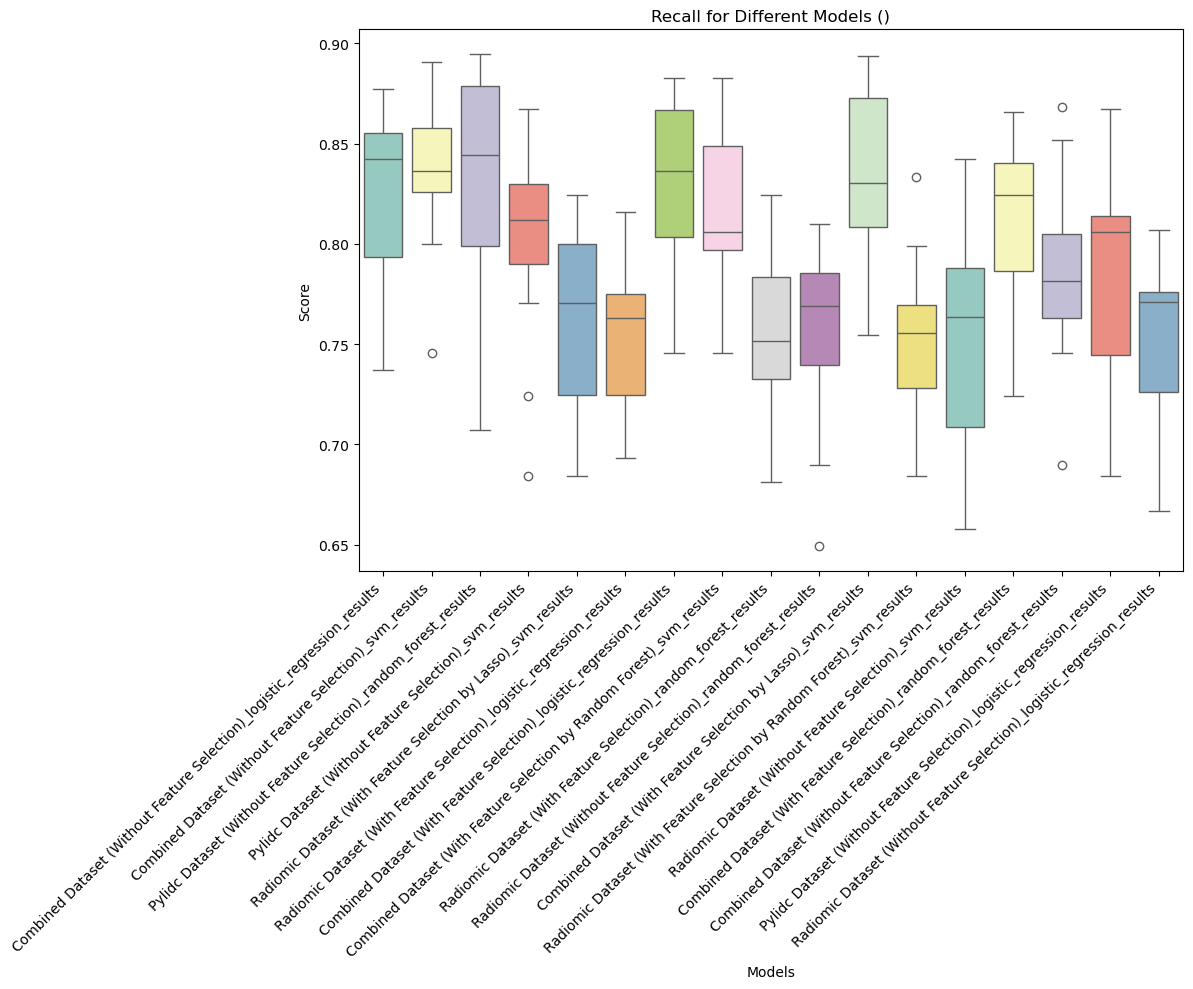

Recall - Friedman test statistic: 132.78462408140183, P-value: 1.845595009845795e-20
Significant differences found in recall. Running post hoc tests...


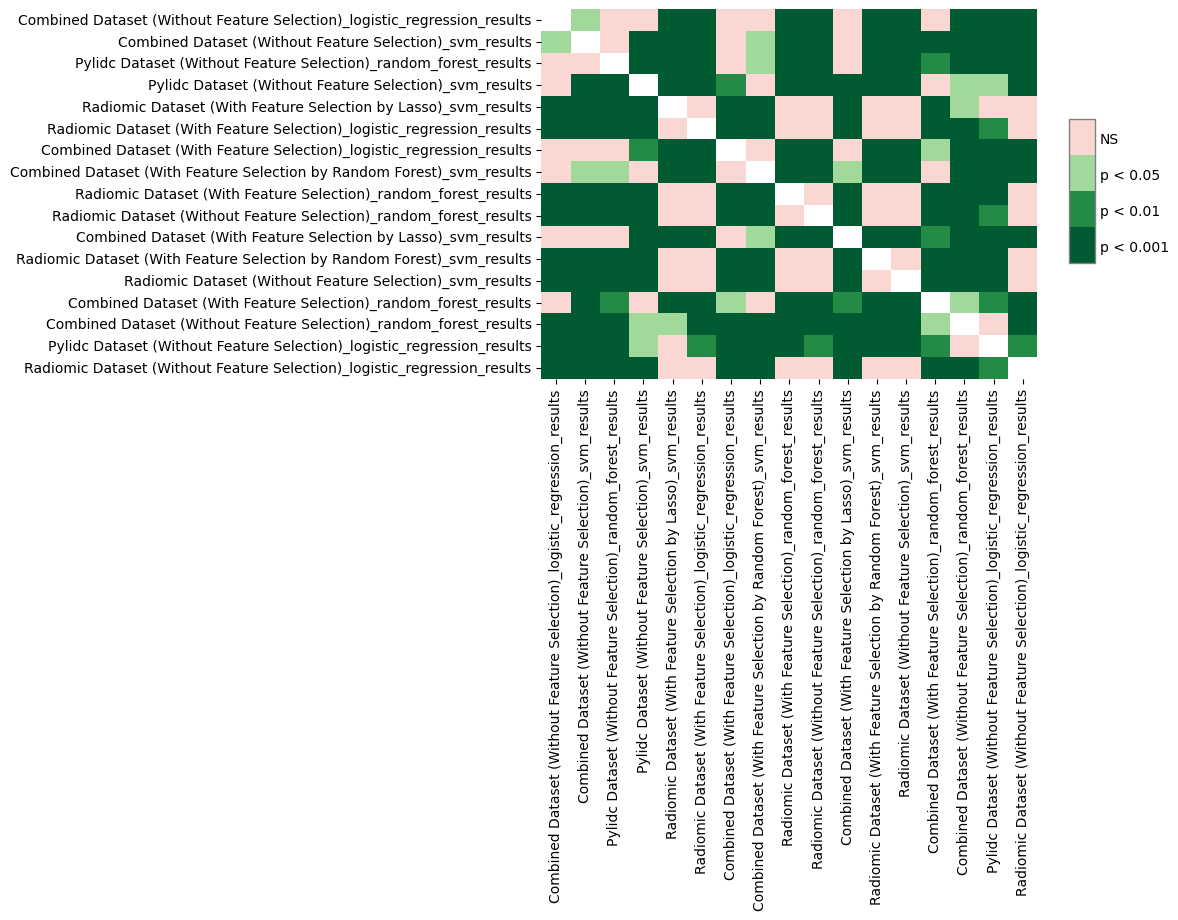

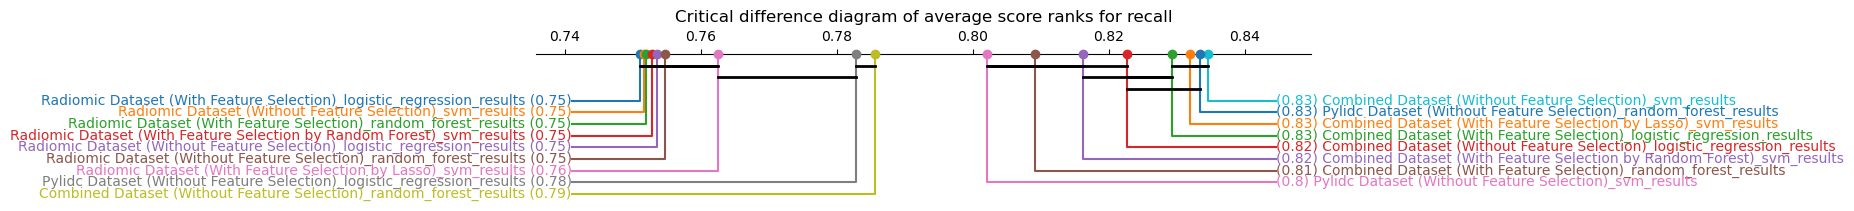

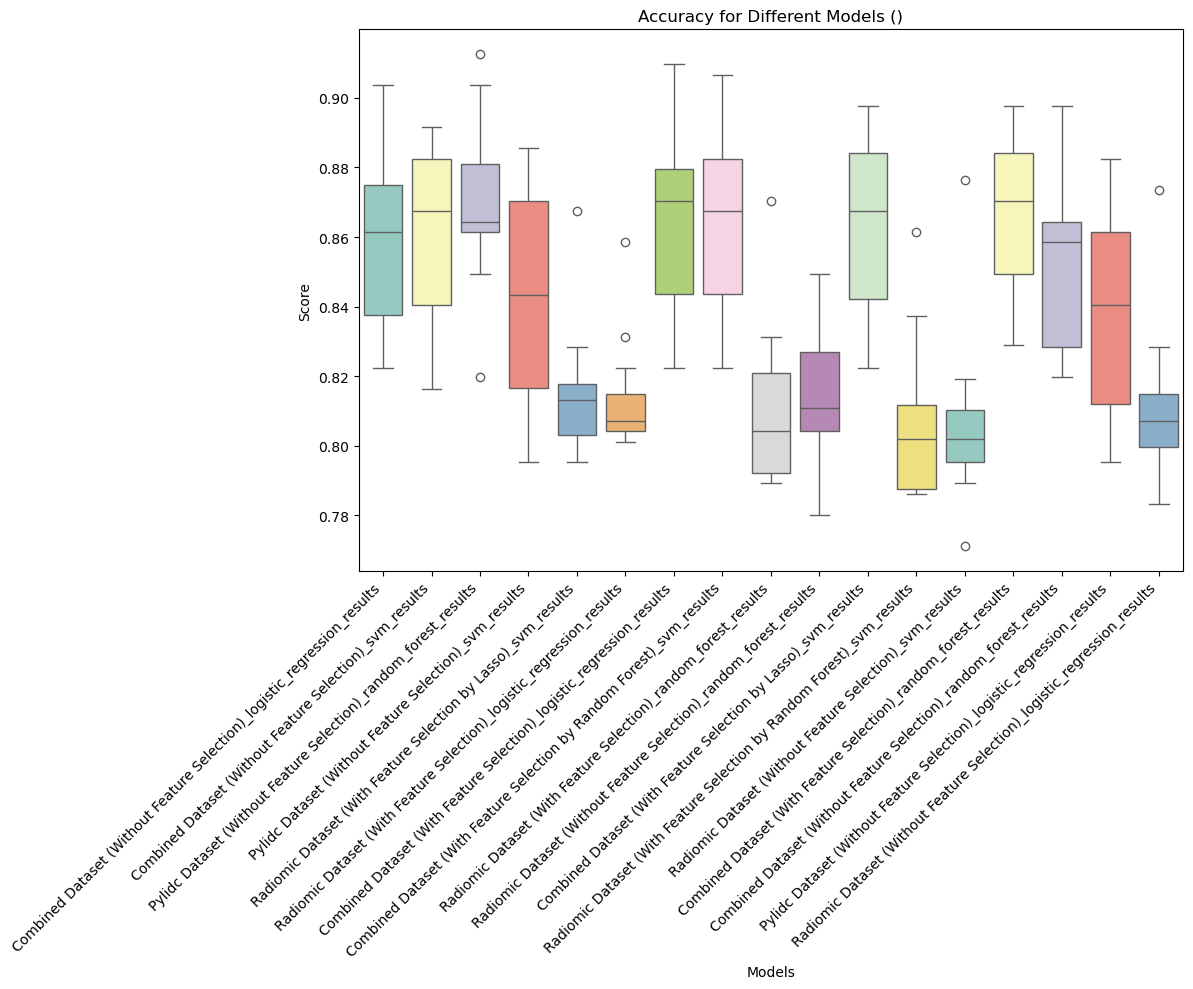

Accuracy - Friedman test statistic: 135.05087798289054, P-value: 6.677979737759848e-21
Significant differences found in accuracy. Running post hoc tests...


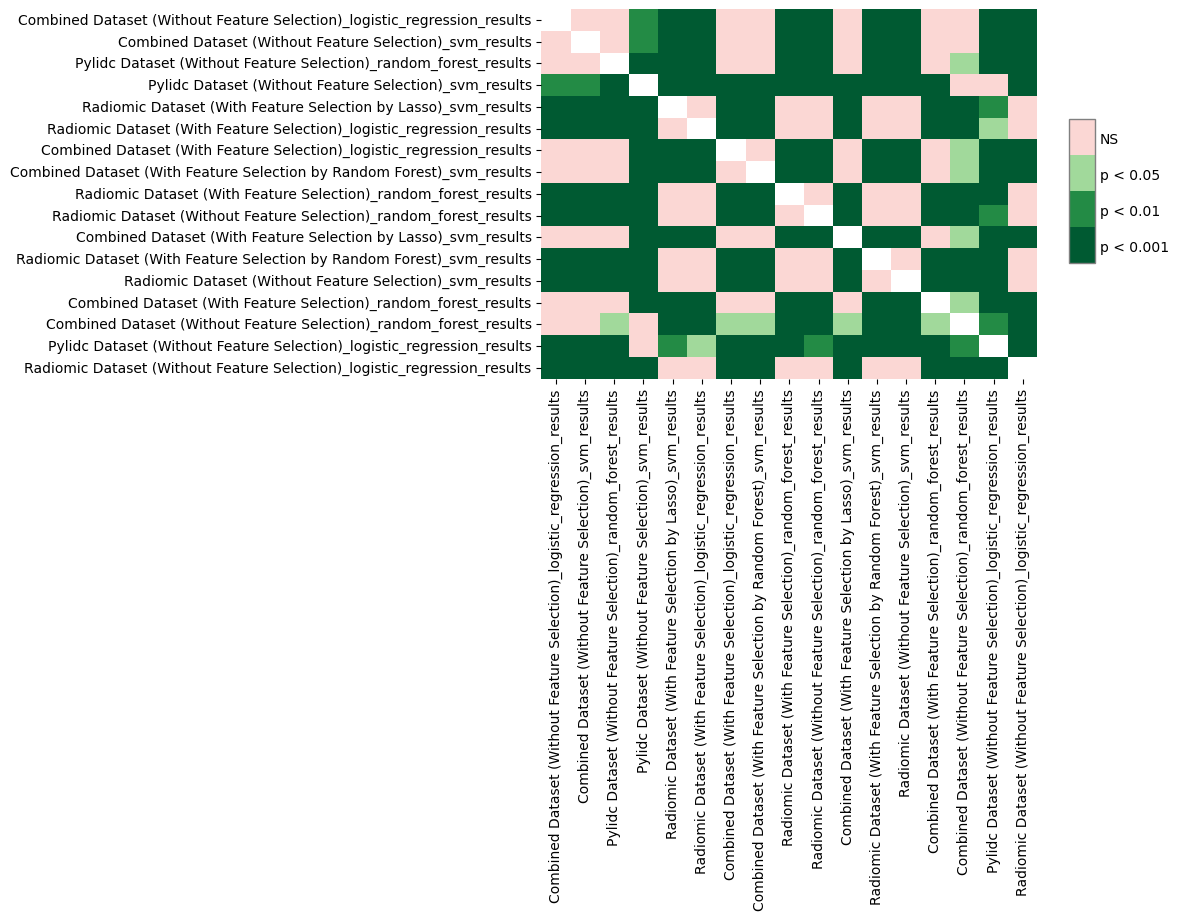

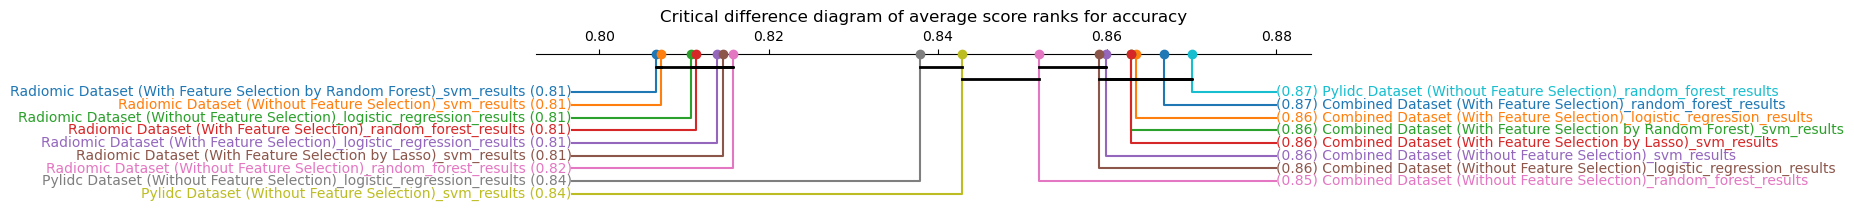

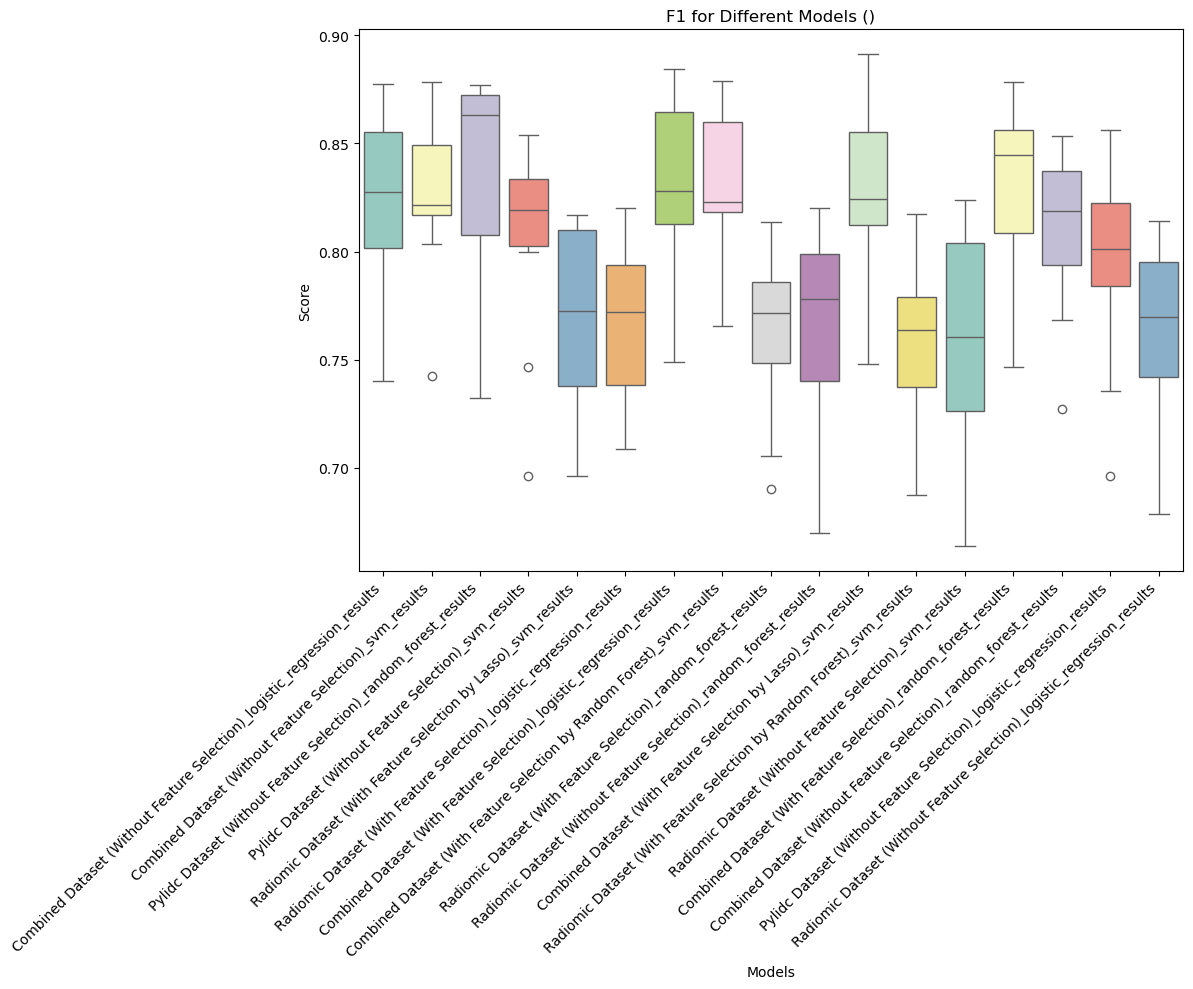

F1 - Friedman test statistic: 138.1952907041624, P-value: 1.6244758882717107e-21
Significant differences found in f1. Running post hoc tests...


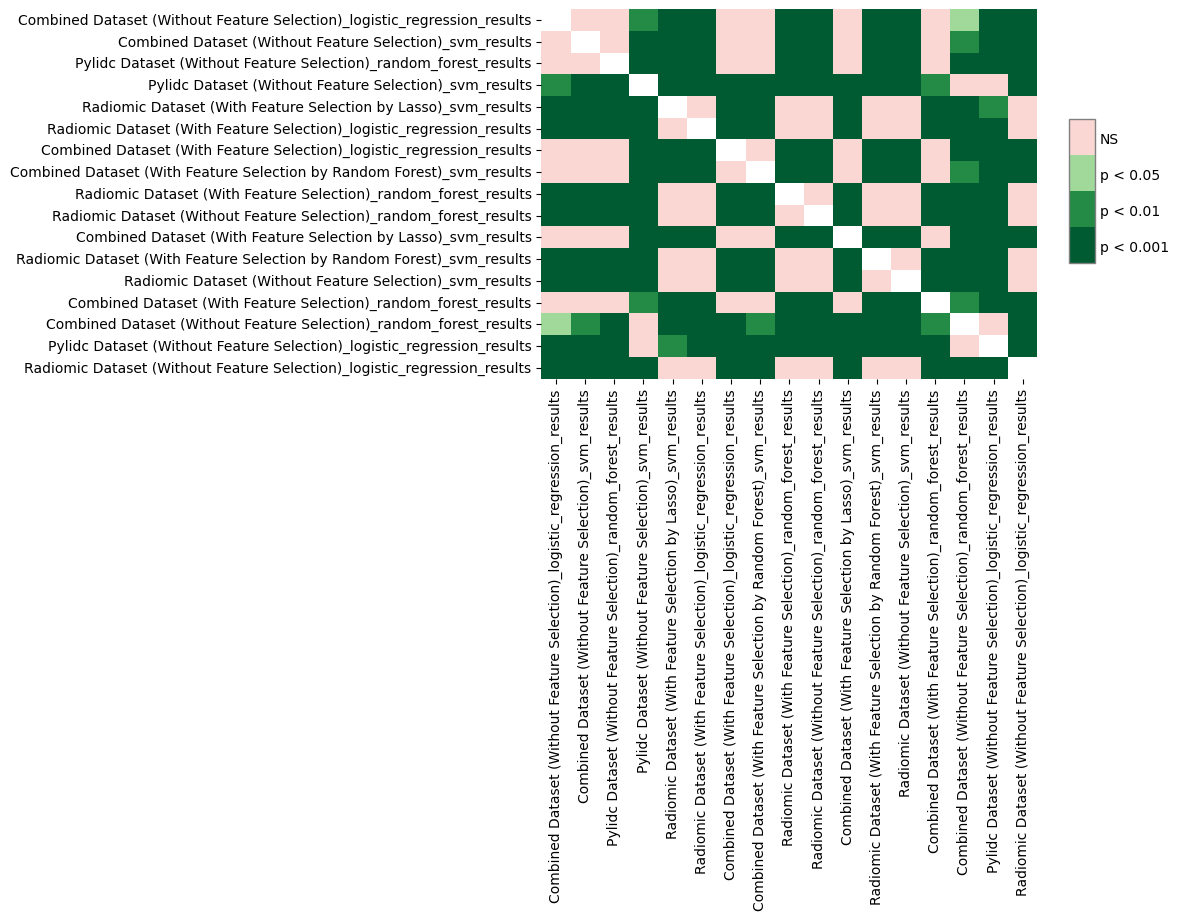

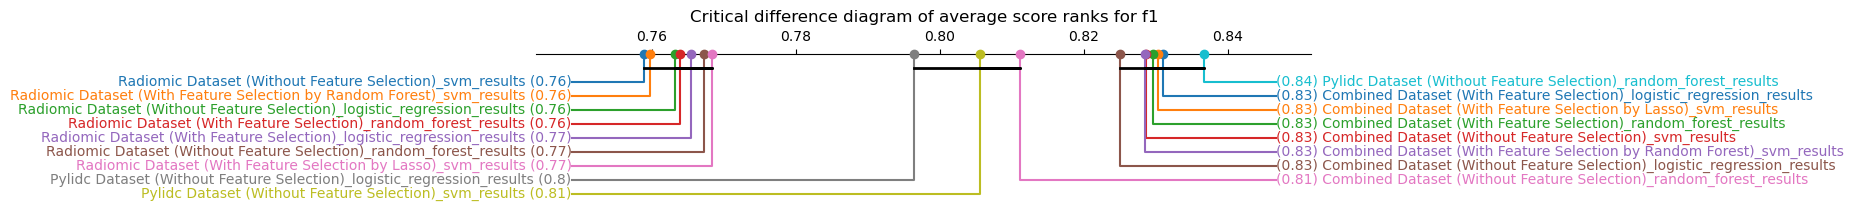

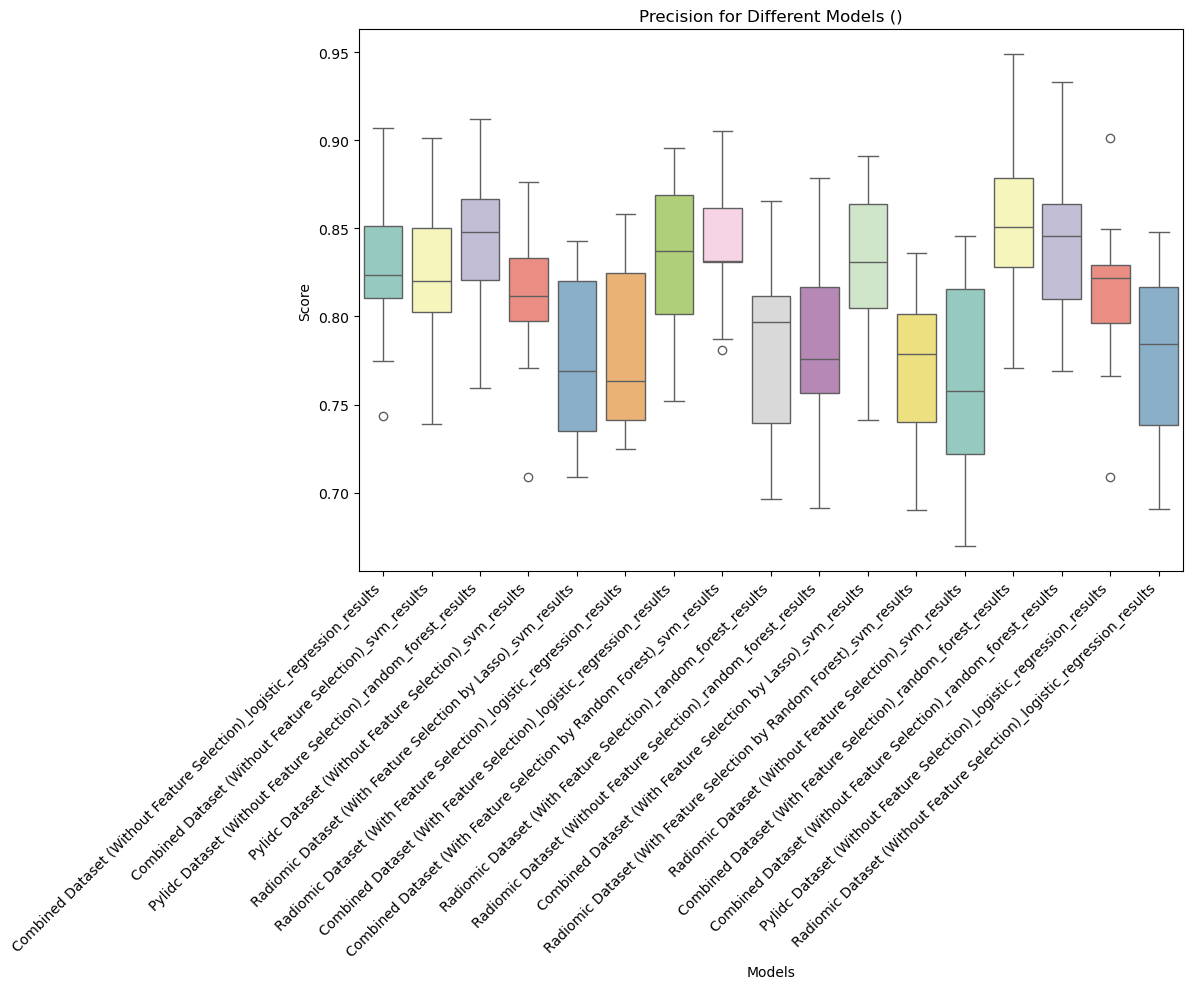

Precision - Friedman test statistic: 100.98392857142852, P-value: 2.2648095955523945e-14
Significant differences found in precision. Running post hoc tests...


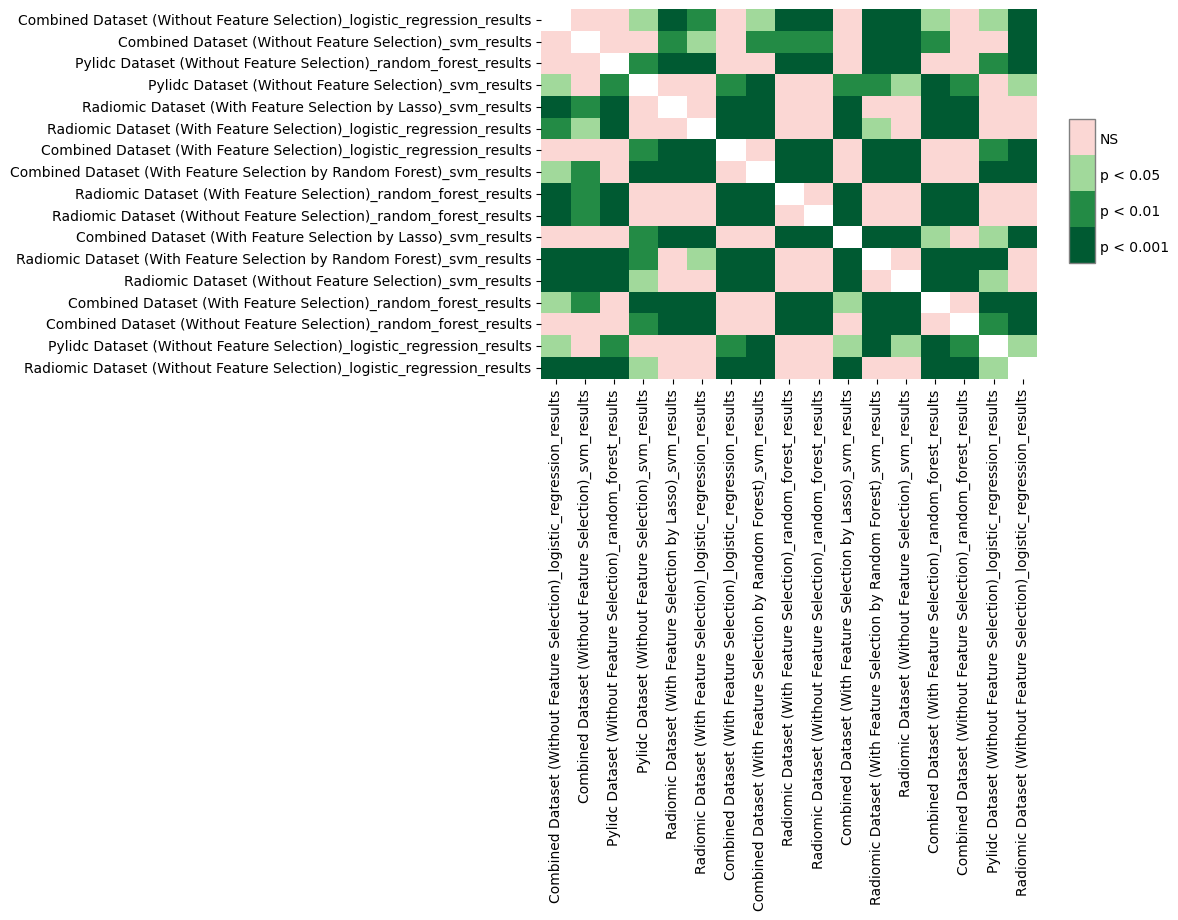

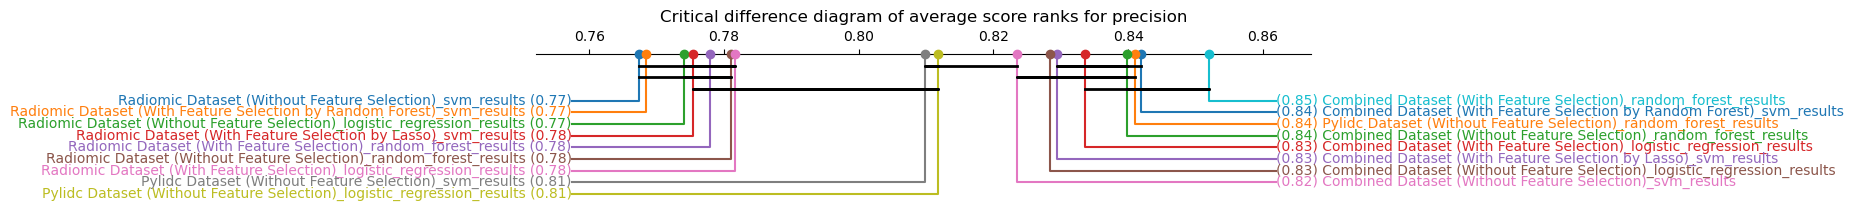

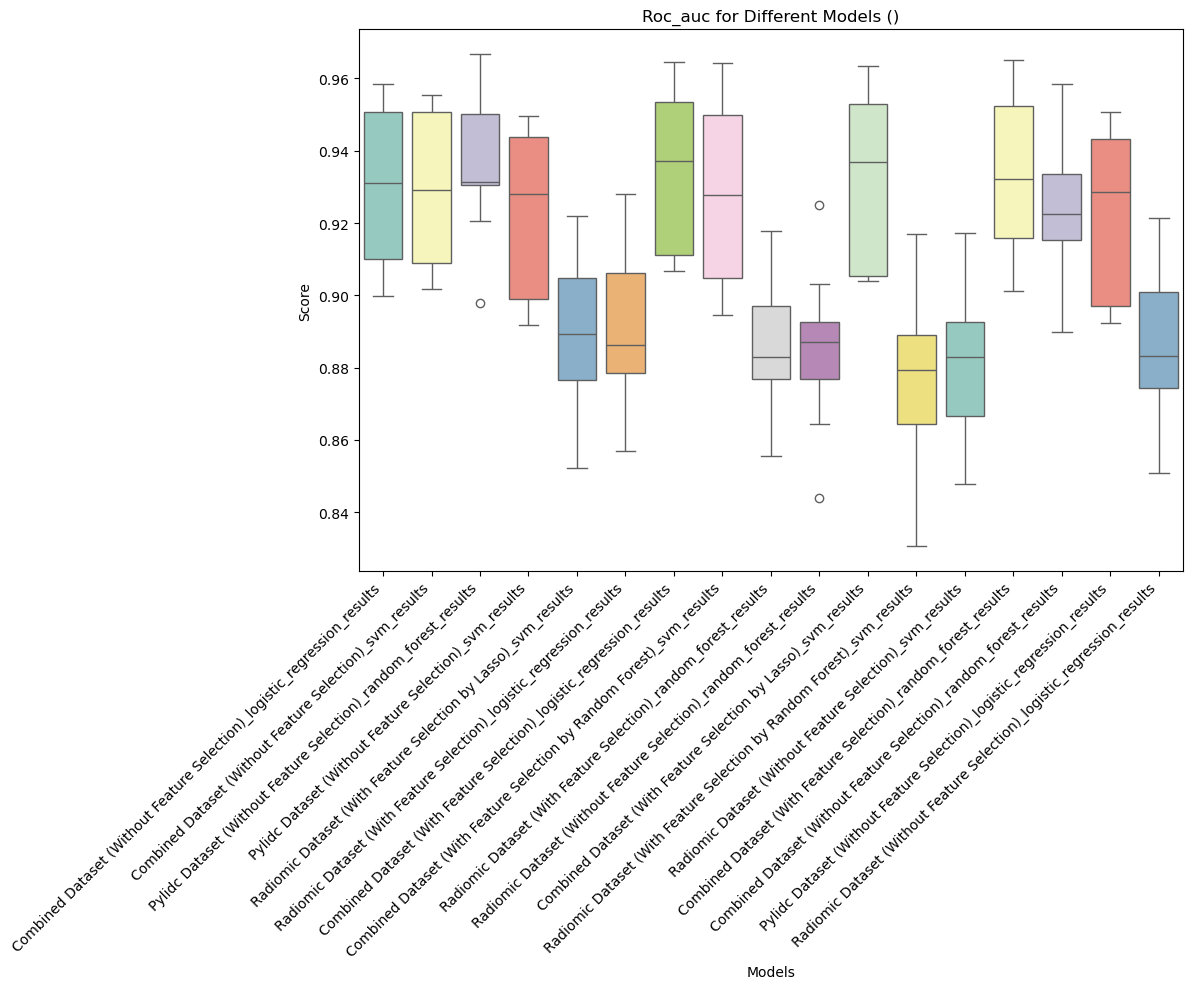

Roc_auc - Friedman test statistic: 149.85383244206764, P-value: 8.349224472549205e-24
Significant differences found in roc_auc. Running post hoc tests...


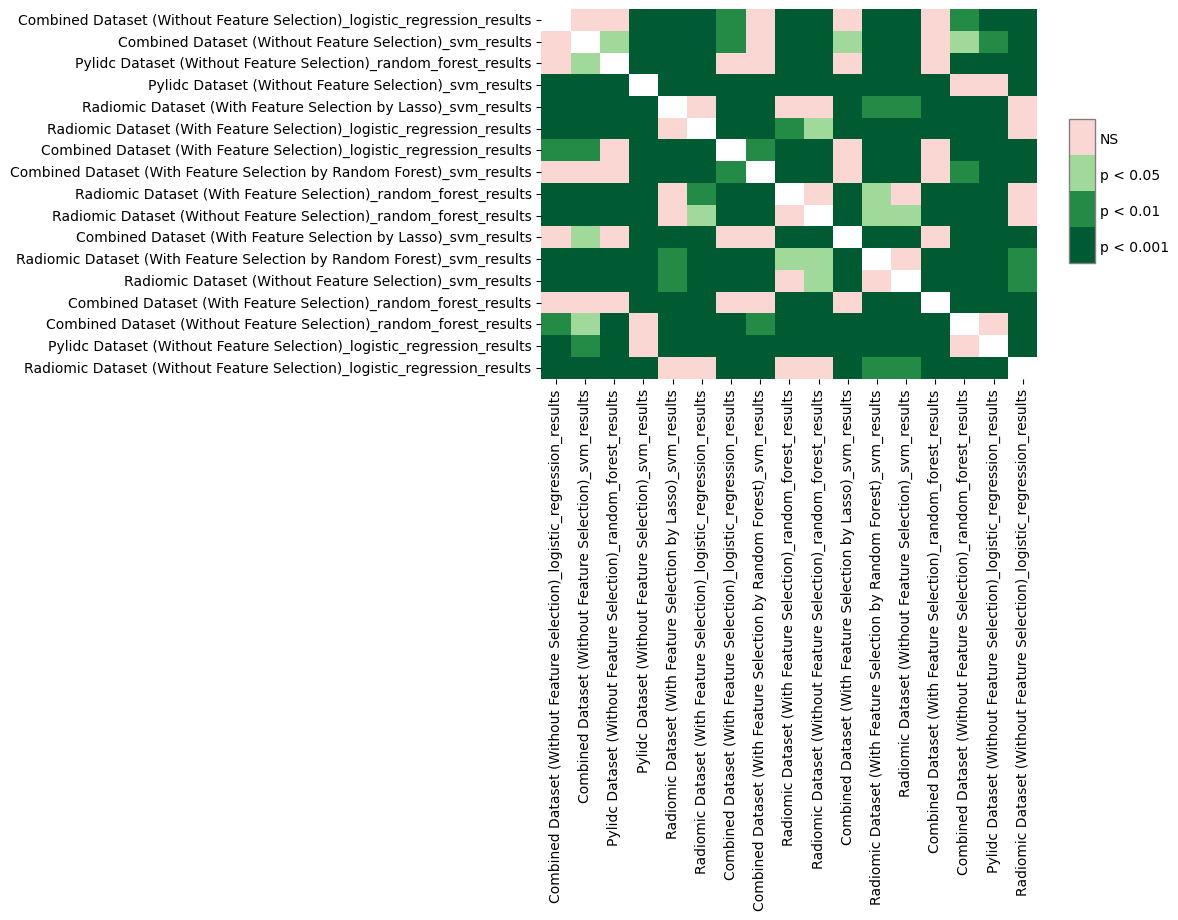

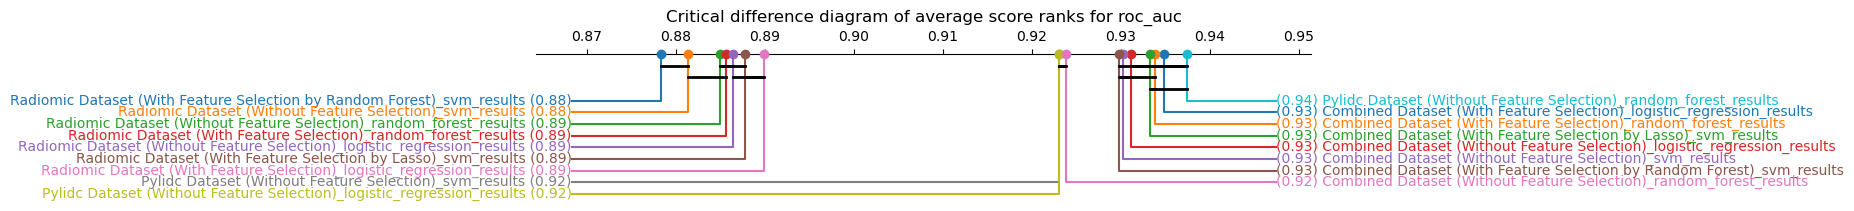

In [1]:
import pandas as pd
import glob
import scipy.stats as ss
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Specify the model pattern to filter files (e.g., 'svm' for SVM models)
model_pattern = ''  # Adjust this pattern for each model group (e.g., 'svm', 'svm_fs', etc.)

# Get all CSV files that match the model pattern
files = glob.glob(os.path.join(f'*{model_pattern}*.csv'))

# Store all data in a list to concatenate later
data_list = []

# Load each CSV file and store with an additional column for the file/model name
for file in files:
    model_name = os.path.splitext(os.path.basename(file))[0]  # Extract model name from file
    # Read all rows except the last 3 (assuming they contain 'mean', 'std', 'test_set')
    df = pd.read_csv(file)
    
    # If the CSV has at least 3 rows, drop the last 3 rows and get the mean from the 3rd last row
    if len(df) >= 3:
        df = df.iloc[:-3]
        mean_values = df.iloc[-2]  # Use the mean values from the 3rd last row
        mean_row = pd.Series(mean_values, name='mean').to_frame().T  # Convert to DataFrame
        mean_row['model'] = model_name  # Add model name for the mean row
        data_list.append(mean_row)
    
    # Append the main data excluding the last 3 rows
    df['model'] = model_name  # Add a column with the model name
    data_list.append(df)

# Concatenate all data for the specified model
data = pd.concat(data_list, ignore_index=True)

# List of metrics to analyze
metrics = ['recall', 'accuracy', 'f1', 'precision', 'roc_auc']

# Initialize a dictionary to store mean scores for each model and metric
mean_scores = {metric: [] for metric in metrics}

# Iterate over each metric to perform analysis
for metric in metrics:
    # Get mean scores for each model
    for model in data['model'].unique():
        mean_score = data[data['model'] == model][metric].mean()
        mean_scores[metric].append(mean_score)
    
    # Convert mean scores into a DataFrame for statistical tests
    results = pd.DataFrame({model: data[data['model'] == model][metric].values 
                            for model in data['model'].unique()})
    
    # Plotting
    plt.figure(figsize=(12, 10))  # Increase the width to give more space for labels
    sns.boxplot(data=[data[data['model'] == model][metric].values for model in data['model'].unique()],
                   palette="Set3")
    plt.title(f"{metric.capitalize()} for Different Models ({model_pattern})")
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.xticks(ticks=range(len(data['model'].unique())), 
               labels=data['model'].unique(), rotation=45, ha='right')  # Rotate labels for readability
    plt.tight_layout()  # Adjust layout to prevent label cutoff
    plt.show()
    
    # Perform Friedman test
    statistic, p_value = ss.friedmanchisquare(*results.T.values)
    
    # If p-value indicates significant differences, perform post hoc test
    if p_value < 0.05:
        print(f"{metric.capitalize()} - Friedman test statistic: {statistic}, P-value: {p_value}")
        print(f"Significant differences found in {metric}. Running post hoc tests...")
        
        # Conover post hoc test
        friedman_results = sp.posthoc_conover_friedman(results)
        
        # Sign plot
        sp.sign_plot(friedman_results)
        plt.show()
        
        # Critical difference diagram
        avg_rank = results.mean()  # Calculate average ranks across models
        plt.figure(figsize=(10, 2), dpi=100)
        plt.title(f'Critical difference diagram of average score ranks for {metric}')
        sp.critical_difference_diagram(avg_rank, friedman_results)
        plt.show()

We will rely on the critical significance to draw some conclusions.

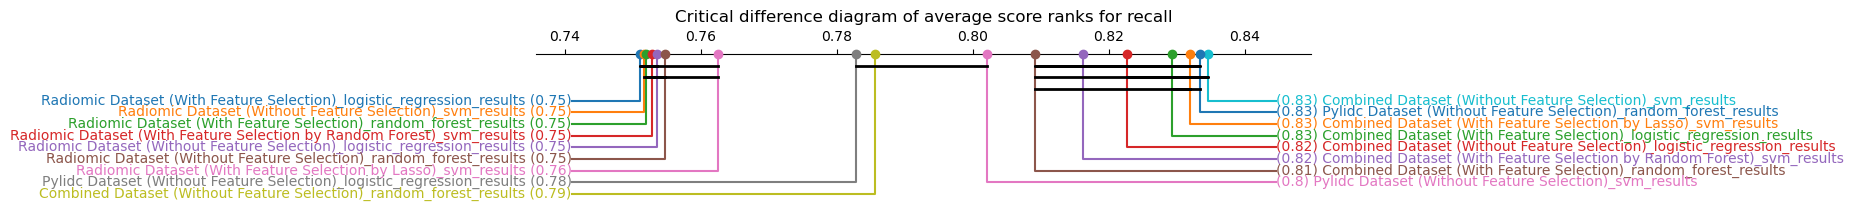

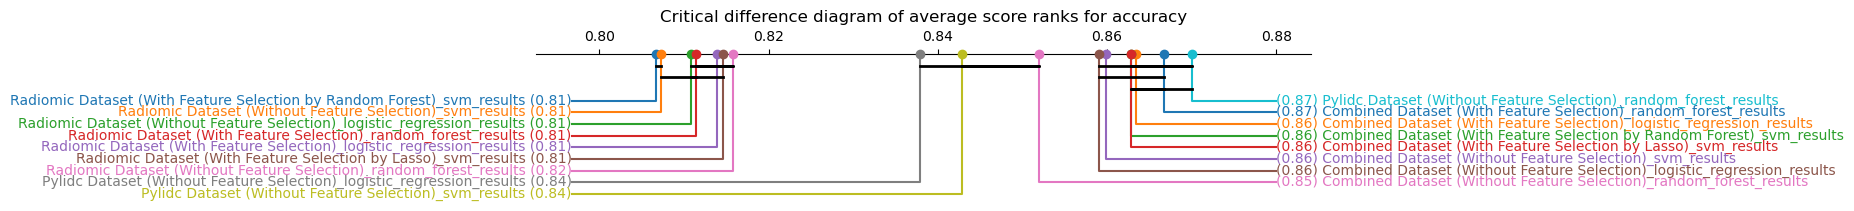

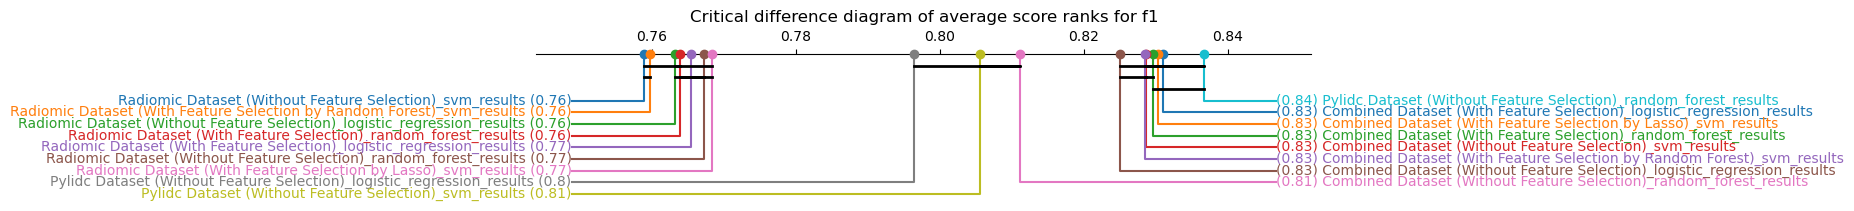

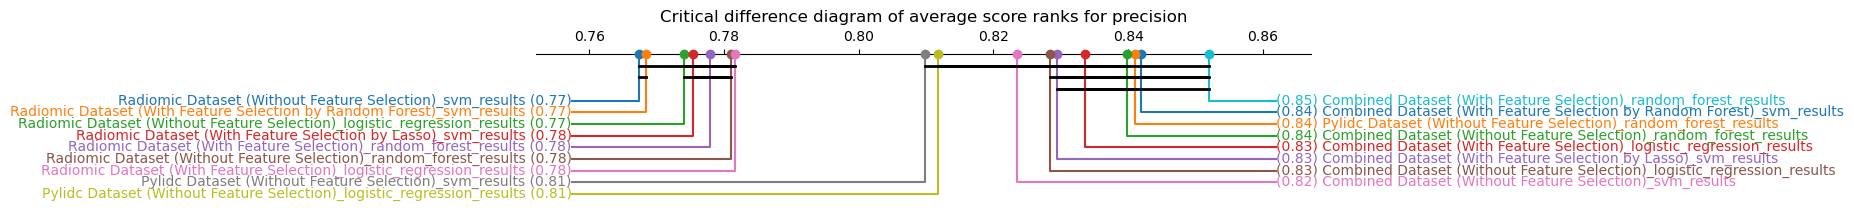

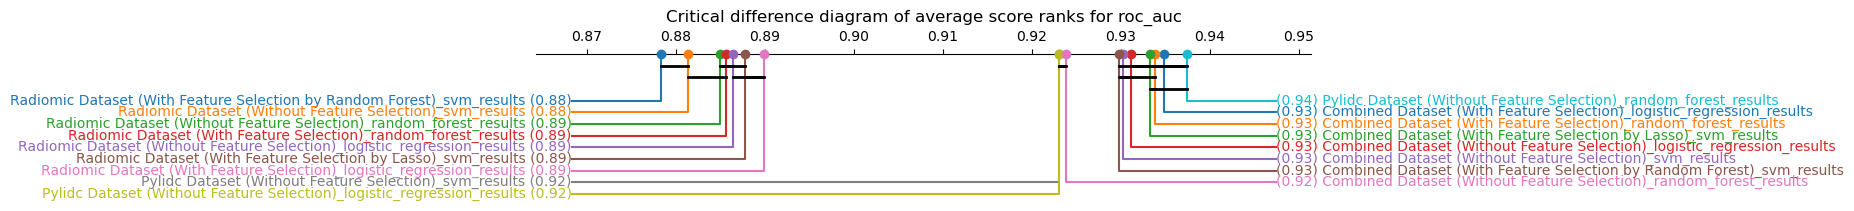

In [2]:
for metric in metrics:
    # Get mean scores for each model
    for model in data['model'].unique():
        mean_score = data[data['model'] == model][metric].mean()
        mean_scores[metric].append(mean_score)
    results = pd.DataFrame({model: data[data['model'] == model][metric].values 
                            for model in data['model'].unique()})
    avg_rank = results.mean()  # Calculate average ranks across models
    plt.figure(figsize=(10, 2), dpi=100)
    plt.title(f'Critical difference diagram of average score ranks for {metric}')
    sp.critical_difference_diagram(avg_rank, friedman_results)
    plt.show()

- As can be observed across all metrics, the **worst-performing models** are those that rely solely on the **radiomic features**. These models generally show no statistically significant differences from each other, indicating similar performance levels across metrics. While certain models with radiomic features may slightly outperform others in specific metrics, overall, they all demonstrate relatively low effectiveness (when compared to the models that use the combined or pylidc dataset).

- As observed across all metrics, the **Pylidc dataset** stands out in terms of performance, especially **when paired with the Random Forest** model. This combination consistently ranks among the best performers, indicating that pylidc features are particularly effective when used with Random Forest, likely due to its ability to capture complex patterns within the dataset. However, when the PyLidc dataset is used with SVM or logistic regression, its performance is intermediate, falling between the best and worst-performing models. This suggests that they may require non-linear models like Random Forest to reach their full predictive potential. As discussed in article **[7]**, the semantic features included in pylidc provide valuable information for building a reliable model. Additionally, in our implementation, we chose to retain features like "volume," "surface area," and "diameter," which fall outside the purely semantic category but may have contributed to improved model performance by adding relevant structural information.

- On the other hand, the most stable and reliable models overall are those that use the **combined dataset** with **Random Forest** and **SVM**. These models consistently achieve high performance across all metrics, demonstrating robustness and adaptability. Notably, applying feature selection to the combined dataset slightly improves its performance, likely by refining the model’s focus to the most predictive features and reducing noise. The combination of features from multiple sources seems to enable these models to generalize better, capturing a broader range of predictive information. Thus, for consistent and strong performance, the combined dataset with Random Forest and SVM, especially with feature selection, emerges as the optimal choice.

## 7. Conclusion <a name="conclusion"></a>
[[go back to the top]](#contents)

During the development of this project, we experienced several challenges:

- One of the first difficulties was the unexpectedly large volume of data, which required far more storage than anticipated. Additionally, managing this data involved working with various data types we had not initially accounted for.
- Another significant challenge was ensuring compatibility between different library versions, as maintaining consistent development required careful selection of versions that worked easily together.
- Another challenging aspect was extracting the features and deciding on the best course of action based on our research. With the vast amount of information we collected, there were times when we felt uncertain about the next steps. For instance, handling cases with a classification of "3" on the malignancy scale was particularly difficult, as various articles recommended different procedures for these instances.

For future developments, we would suggest implementing the following strategies (that could not be achieved due to time constraints):
- **Hyperparameter tuning**: By employing techniques like Grid Search, Random Search, or Bayesian Optimization, we can explore a wide range of hyperparameter combinations to find the optimal settings. For the Random Forest model, tuning parameters such as the number of trees (n_estimators), maximum depth of the trees (max_depth), minimum number of samples required to split an internal node (min_samples_split), and the number of features to consider when looking for the best split (max_features) can significantly improve model accuracy and prevent overfitting. For the SVM model, adjusting the regularization parameter (C), kernel type (kernel), gamma (gamma), and degree of the polynomial kernel (degree) can lead to better classification performance. Implementing cross-validation during the hyperparameter tuning process ensures that the models generalize well to unseen data, ultimately leading to more robust and reliable predictions.
  
- **Deep Convolutional Neural Network (DCNN):** As outlined in this article **[8]**, building and training a DCNN could enhance model performance and enable more complex feature extraction. This approach could be valuable for capturing subtle details that could improve our models' performances (specially regarding the combined and radiomic dataset).
  
- **Support Vector Machine with Particle Swarm Optimization (SVM-PSO):** The following article **[9]** describes the integration of SVM with PSO, a hybrid technique aimed at optimizing the model’s parameters. Implementing SVM-PSO could yield a more finely tuned model by leveraging PSO’s optimization abilities to refine SVM parameters, thus potentially increasing the robustness and performance of the classification model. We tried to implement a version in Python but due to heavy computational demands we could not assess the model's abilities concerning the different datasets. However, we also share our draft:

In [ ]:
# Define the objective function for PSO (maximize AUC, minimize 1 - AUC)
def svm_pso_objective(params, X_train, y_train, X_val, y_val):
    C, gamma = params
    model = SVC(C=C, gamma=gamma, kernel='rbf', probability=True, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities on validation set
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate AUC (maximize)
    auc = roc_auc_score(y_val, y_pred_proba)
    
    # Return 1 - AUC (to minimize)
    return 1 - auc

# Load the dataset
df = pd.read_csv('all_features_cleaned.csv')

# Classify the malignancy (0 = benign, 1 = malignant)
df['malignancy'] = df['malignancy'].replace({1: 0, 2: 0, 4: 1, 5: 1})

# Extract unique patient IDs and split into train and test
patient_ids = df['Patient_ID'].unique()
train_ids, test_ids = train_test_split(patient_ids, test_size=0.2, random_state=42)

# Create training and testing sets
train_df = df[df['Patient_ID'].isin(train_ids)].reset_index(drop=True)
test_df = df[df['Patient_ID'].isin(test_ids)].reset_index(drop=True)

# Separate Features and Target for training and testing data
X_train = train_df.drop(['malignancy', 'Patient_ID'], axis=1)
y_train = train_df['malignancy']
X_test = test_df.drop(['malignancy', 'Patient_ID'], axis=1)
y_test = test_df['malignancy']

# Load the selected features from Random Forest CSV
selected_features = pd.read_csv('rf_selected_features_combined.csv')
selected_feature_names = selected_features['Selected Features'].tolist()

# Filter the training and testing sets to only include the selected features
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Split training data into train and validation sets for PSO
X_train_pso, X_val_pso, y_train_pso, y_val_pso = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Define the bounds for hyperparameters C and gamma
lb = [0.1, 0.0001]  # Lower bounds for C and gamma
ub = [1000, 1]      # Upper bounds for C and gamma

# Apply PSO to find the best parameters for SVM
optimal_params, fopt = pso(svm_pso_objective, lb, ub, args=(X_train_pso, y_train_pso, X_val_pso, y_val_pso), swarmsize=30, maxiter=20)

# Print the best parameters found by PSO
print(f'Best C: {optimal_params[0]}')
print(f'Best gamma: {optimal_params[1]}')

# Train the final SVM model with the optimized parameters
svm_optimized = SVC(C=optimal_params[0], gamma=optimal_params[1], kernel='rbf', probability=True, random_state=42)
svm_optimized.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_test = svm_optimized.predict(X_test_scaled)
y_proba_test = svm_optimized.predict_proba(X_test_scaled)[:, 1]

# Calculate and print ROC-AUC on the test set
test_auc = roc_auc_score(y_test, y_proba_test)
print(f'Test ROC-AUC (with optimized SVM and selected features): {test_auc:.4f}')

Despite the challenges we faced, this project has been an invaluable learning experience. We have deepened our understanding of machine learning and its applications to medical research, especially in the context of lung cancer diagnosis. The work was demanding, but we feel inspired and motivated to continue on this research journey. 

## 8. References <a name="references"></a>
[[go back to the top]](#contents)

**[1]** World Health Organization. 2018. 'Latest Global Cancer Data: Cancer Burden Rises to 18.1 Million New Cases and 9.6 Million Cancer Deaths in 2018'. Press Release Nº263.

**[2]** American Cancer Society. 2024. 'Cancer Facts & Figures 2024'. Atlanta.

**[3]** Lee, Geewon, Hyunjin Park, So Hyeon Bak, and Ho Yun Lee. 2020. ‘Radiomics in Lung Cancer from Basic to Advanced: Current Status and Future Directions’. Korean Journal of Radiology 21 (2): 159. https://doi.org/10.3348/kjr.2019.0630.

**[4]** Araujo-Filho, Jose Arimateia Batista, Maria Mayoral, Natally Horvat, Fernando C. Santini, Peter Gibbs, and Michelle S. Ginsberg. 2022. ‘Radiogenomics in Personalized Management of Lung Cancer Patients: Where Are We?’ Clinical Imaging 84 (April):54–60. https://doi.org/10.1016/j.clinimag.2022.01.012.

**[5]** Armato III, S. G., McLennan, G., Bidaut, L., McNitt-Gray, M. F., Meyer, C. R., Reeves, A. P., Zhao, B., Aberle, D. R., Henschke, C. I., Hoffman, E. A., Kazerooni, E. A., MacMahon, H., Van Beek, E. J. R., Yankelevitz, D., Biancardi, A. M., Bland, P. H., Brown, M. S., Engelmann, R. M., Laderach, G. E., Max, D., Pais, R. C. , Qing, D. P. Y. , Roberts, R. Y., Smith, A. R., Starkey, A., Batra, P., Caligiuri, P., Farooqi, A., Gladish, G. W., Jude, C. M., Munden, R. F., Petkovska, I., Quint, L. E., Schwartz, L. H., Sundaram, B., Dodd, L. E., Fenimore, C., Gur, D., Petrick, N., Freymann, J., Kirby, J., Hughes, B., Casteele, A. V., Gupte, S., Sallam, M., Heath, M. D., Kuhn, M. H., Dharaiya, E., Burns, R., Fryd, D. S., Salganicoff, M., Anand, V., Shreter, U., Vastagh, S., Croft, B. Y., Clarke, L. P. (2015). Data From LIDC-IDRI [Data set]. The Cancer Imaging Archive. https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX

**[6]** Hancock, D. pylidc: A Python library for working with the LIDC-IDRI. https://pylidc.github.io (Accessed: 6/10/2024).

**[7]** Hancock, Matthew C., and Jerry F. Magnan. 2016. ‘Lung Nodule Malignancy Classification Using Only Radiologist-Quantified Image Features as Inputs to Statistical Learning Algorithms: Probing the Lung Image Database Consortium Dataset with Two Statistical Learning Methods’. Journal of Medical Imaging 3 (4): 044504. https://doi.org/10.1117/1.JMI.3.4.044504.

**[8]** Xie, Yutong, Jianpeng Zhang, Yong Xia, Michael Fulham, and Yanning Zhang. 2018. ‘Fusing Texture, Shape and Deep Model-Learned Information at Decision Level for Automated Classification of Lung Nodules on Chest CT’. Information Fusion 42 (July):102–10. https://doi.org/10.1016/j.inffus.2017.10.005.

**[9]** Lu, Liu, Liu Yapeng, and Zhao Hongyuan. 2018. ‘Benign and Malignant Solitary Pulmonary Nodules Classification Based on CNN and SVM’. In Proceedings of the International Conference on Machine Vision and Applications, 46–50. Singapore Singapore: ACM. https://doi.org/10.1145/3220511.3220513.